In [ ]:
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.callbacks import *
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

metadata = '/content/HAM10000_metadata.csv'
hmnist_8_8_RGB = '/content/hmnist_8_8_RGB.csv'
hmnist_28_28_RGB = '/content/hmnist_28_28_RGB.csv'
hmnist_8_8_L = '/content/hmnist_8_8_L.csv'
hmnist_28_28_L = '/content/hmnist_28_28_L.csv'

classes111 = {4: ('nv', ' melanocytic nevi'),
              6: ('mel', 'melanoma'),
              2: ('bkl', 'benign keratosis-like lesions'),
              1: ('bcc', ' basal cell carcinoma'),
              5: ('vasc', ' pyogenic granulomas and hemorrhage'),
              0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
              3: ('df', 'dermatofibroma')}

In [ ]:
df111 = pd.read_csv(hmnist_28_28_RGB, delimiter=',')
df111.dataframeName = 'hmnist_28_28_RGB.csv'
nRow111, nCol111 = df111.shape
print(f'There are {nRow111} rows and {nCol111} columns')


There are 10015 rows and 2353 columns


In [ ]:
label111 = df111["label"]
data111 = df111.drop(columns=["label"])
data111.head()

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2342  pixel2343  \
0        197        154        185        202  ...        134        173   
1        123         93        126        158  ...         82         60   
2        201        142        160        206  ...        149        167   
3        143        103        119        171  ...         73         44   
4        215        162        191        225  ...        201        209   

   pixel2344  pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  \
0        124        138        183        147        166        185   
1         39         55         25         14         28         25   
2        129        143        159        124        142        136   
3         26         36         25         12         17         25   
4        166        185        172        135        149        109   

   pixel2350  pixel2351  
0        154        177  
1         14         27  
2        104        117  
3         12         15  
4         78         92  

[5 rows x 2352 columns]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

In [ ]:
import pandas as pd
data1112 = pd.read_csv('/content/hmnist_28_28_RGB.csv')

In [ ]:
yk1112 = data1112['label']
xk1112 = data1112.drop(columns=['label'])
tabular_data1112 = pd.read_csv('/content/HAM10000_metadata.csv')
tabular_data1112.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [ ]:
tabular_data1112.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

In [ ]:
classes1112 = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2: ('bkl', 'benign keratosis-like lesions'), 1: ('bcc', ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'), 3: ('df', 'dermatofibroma')}

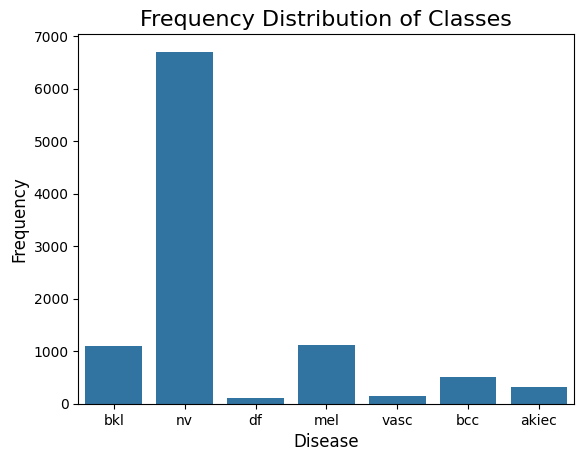

In [ ]:
sns.countplot(x='dx', data=tabular_data1112)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)
plt.show()

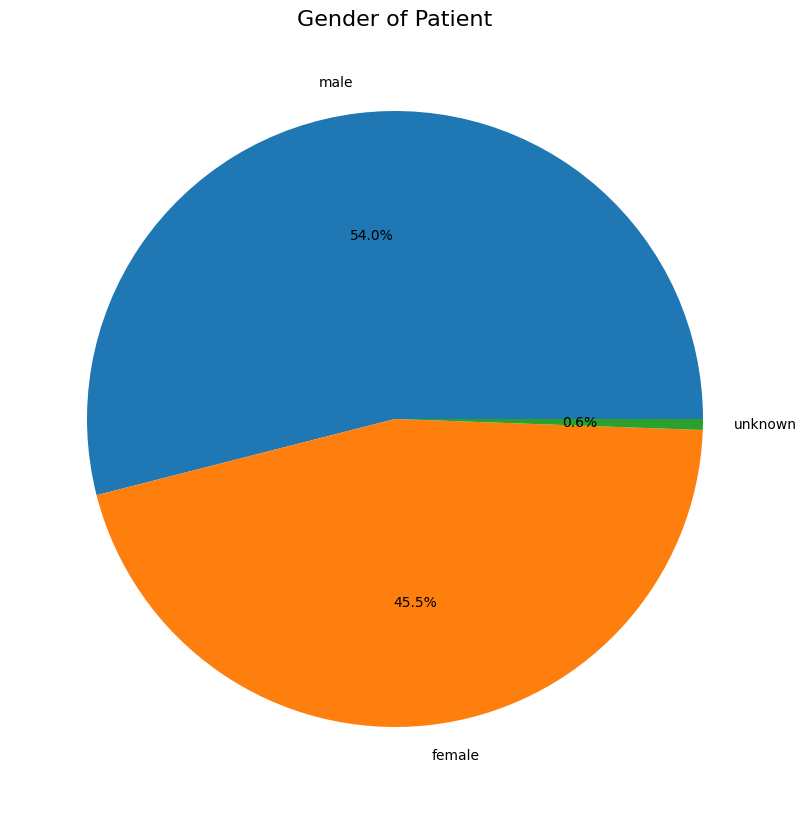

In [ ]:
bar1112, ax11111 = plt.subplots(figsize=(10, 10))
plt.pie(tabular_data1112['sex'].value_counts(), labels=tabular_data1112['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)
plt.show()

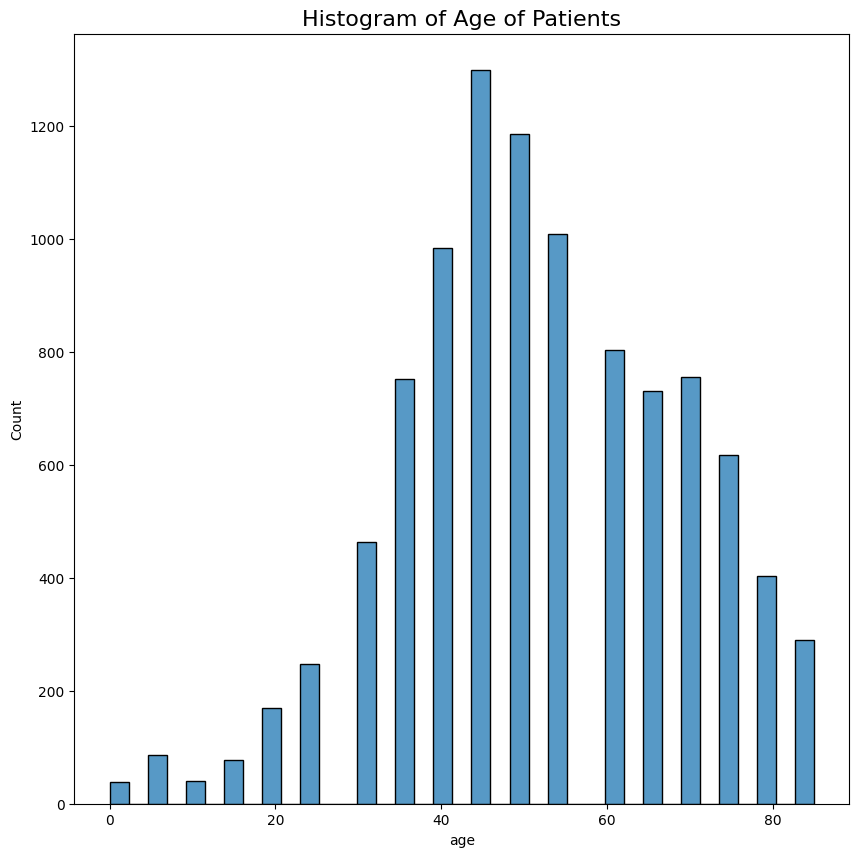

In [ ]:
bar1112, ax112 = plt.subplots(figsize=(10, 10))
sns.histplot(tabular_data1112['age'])
plt.title('Histogram of Age of Patients', size=16)
plt.show()

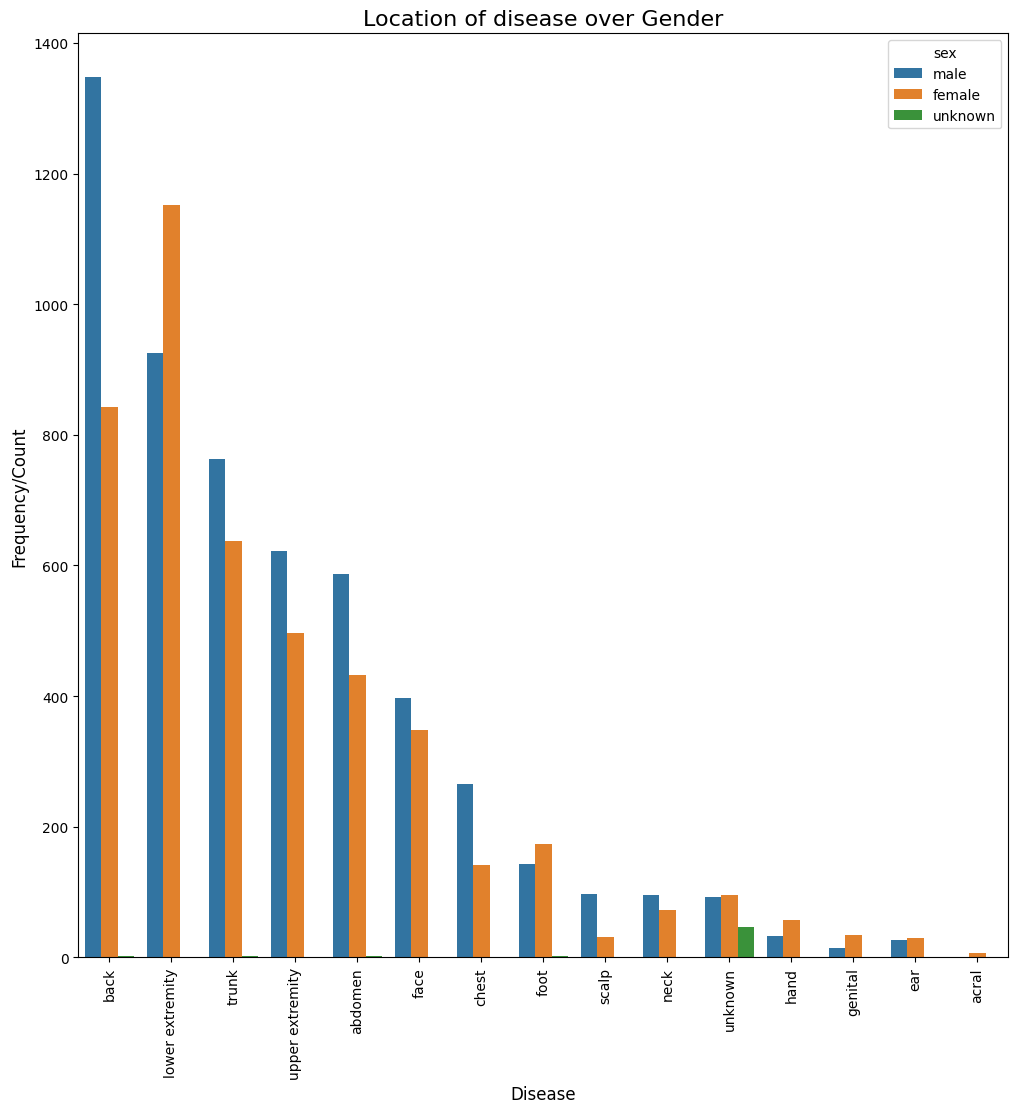

In [ ]:
value1112 = tabular_data1112[['localization', 'sex']].value_counts().to_frame()
value1112.reset_index(level=[1, 0], inplace=True)
temp1112 = value1112.rename(columns={'localization': 'location', 0: 'count'})
bar1112, ax112 = plt.subplots(figsize=(12, 12))
sns.barplot(x='location', y='count', hue='sex', data=temp1112)
plt.title('Location of disease over Gender', size=16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

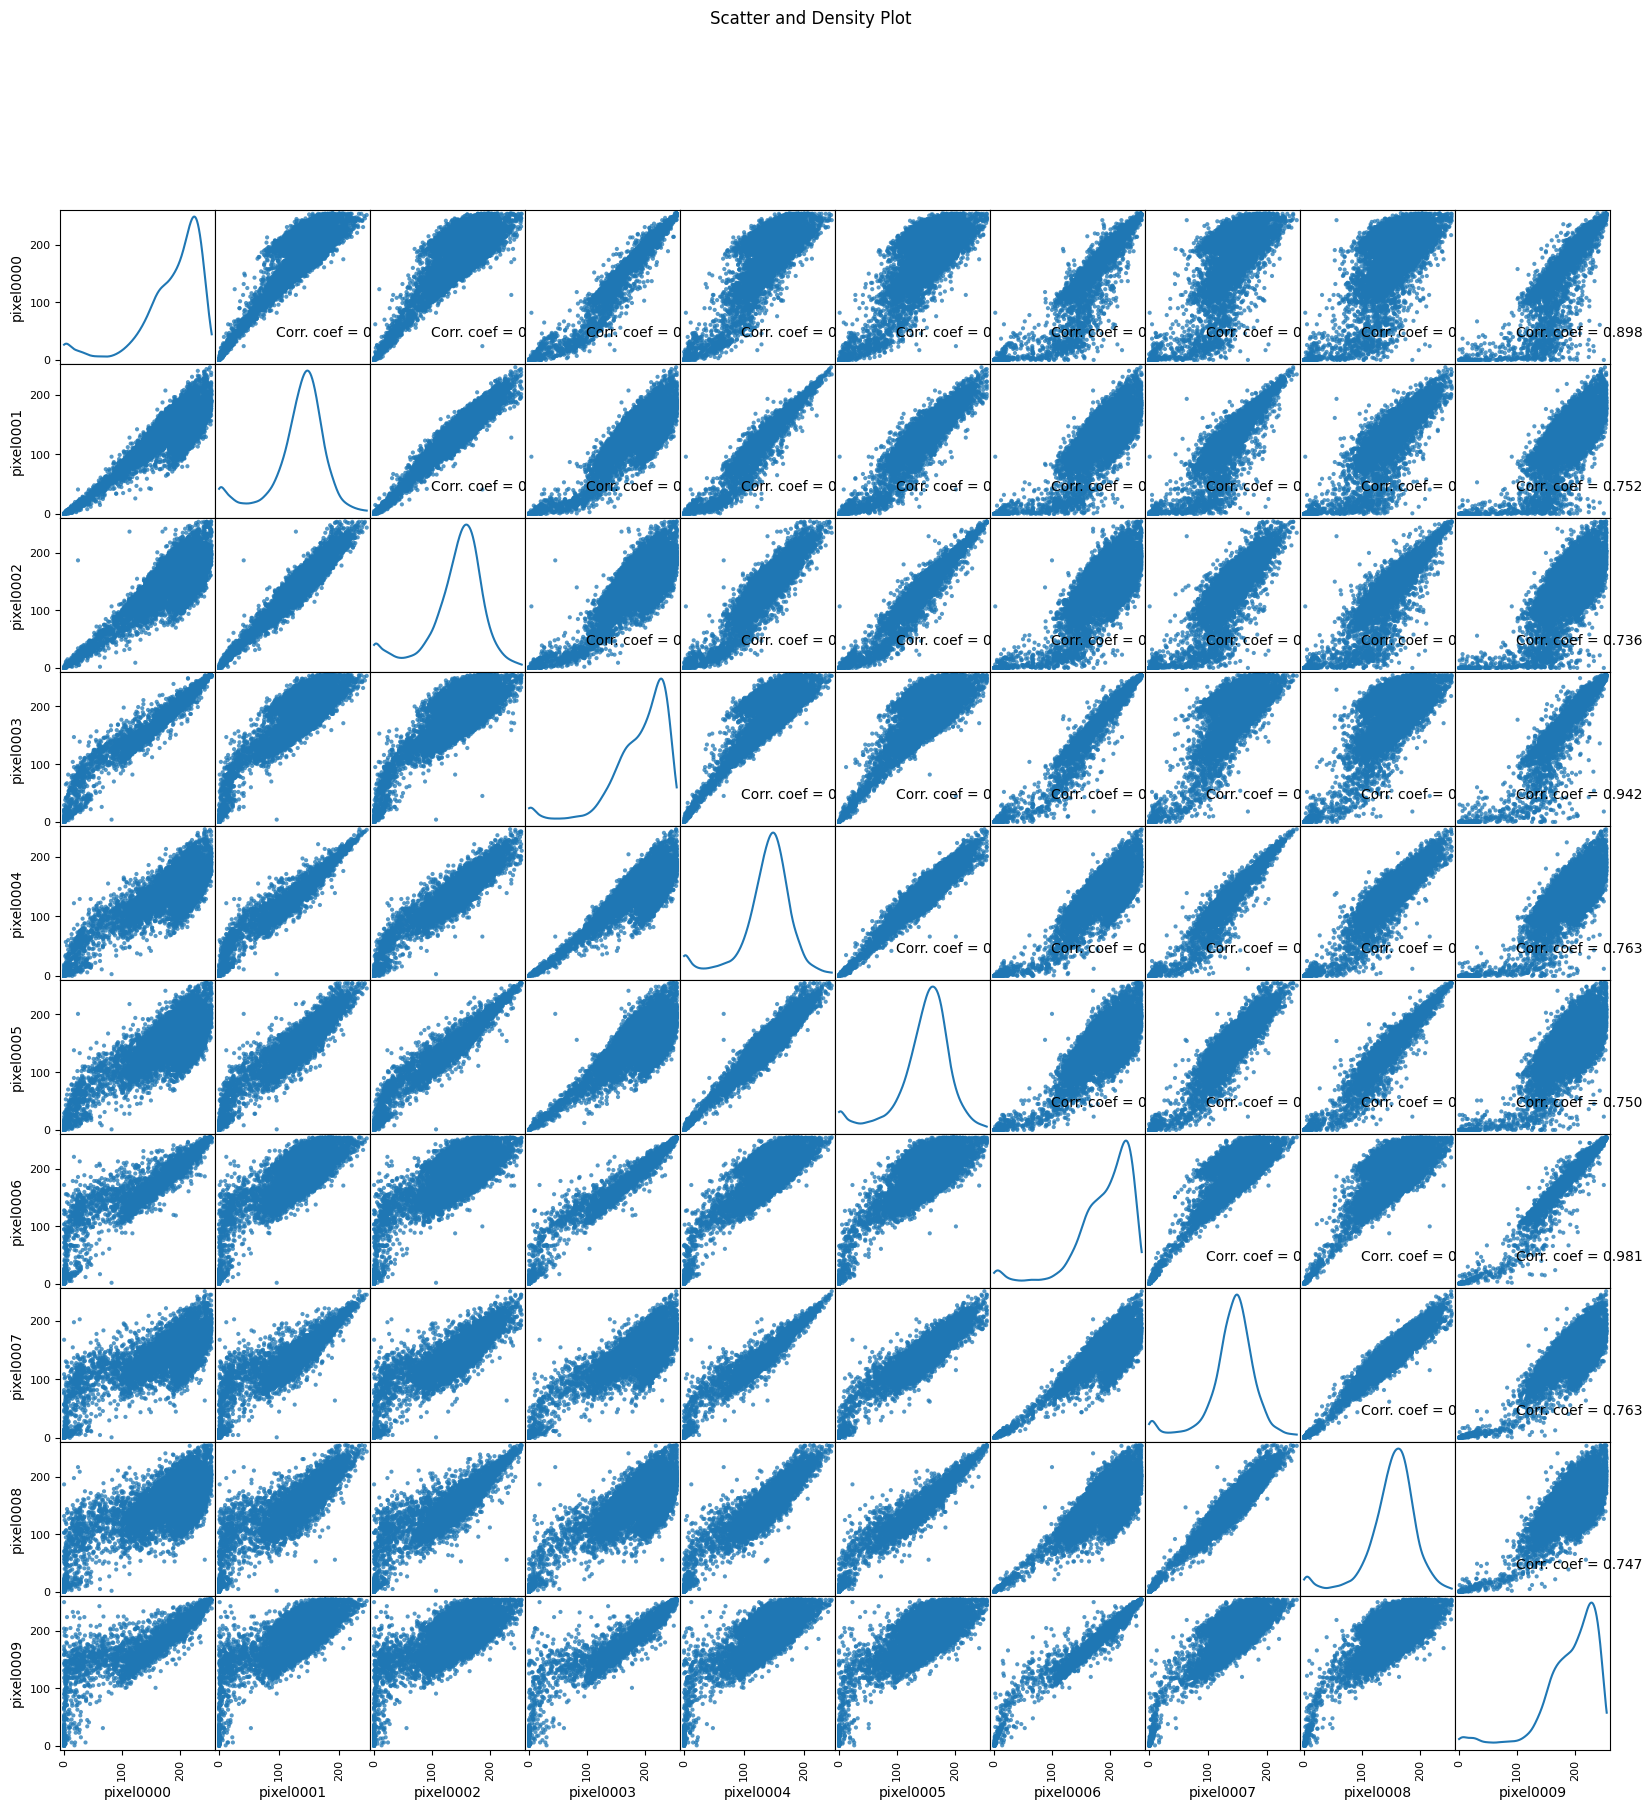

In [ ]:
plotScatterMatrix(data1112, 20, 10)

In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
# our dataset is imbalanced, so we try to balance the data using oversample the data using random points
oversample111 = RandomOverSampler()
data111, label111 = oversample111.fit_resample(data111, label111)
data111 = np.array(data111).reshape(-1, 28, 28, 3)
label111 = np.array(label111)
y11111 = [7000, 7000, 7000, 7000, 7000, 7000, 7000]
print(type(label111))
data111.shape

<class 'numpy.ndarray'>


(46935, 28, 28, 3)

In [ ]:
X_train111, X_test111, y_train111, y_test111 = train_test_split(data111, label111, test_size=0.2, random_state=42)

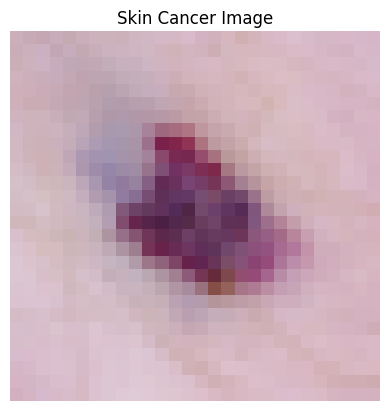

In [ ]:
def plotImg111(img):
    plt.imshow(img)
    plt.title("Skin Cancer Image")
    plt.grid(False)
    plt.axis("off")
    plt.show()
plotImg111(X_train111[0])

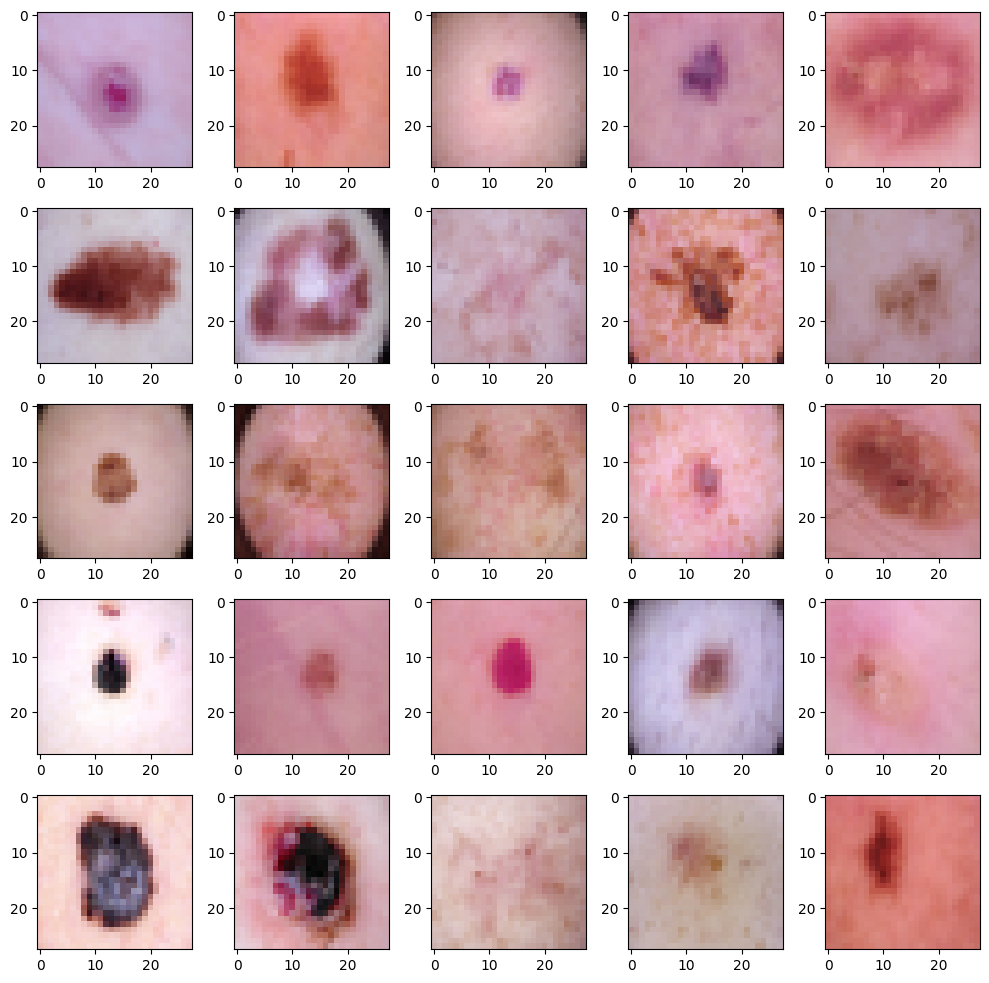

In [ ]:

fig111, axes111 = plt.subplots(5, 5)
fig111.set_size_inches(10, 10)
for i in range(5):
    for j in range(5):
        n = np.random.randint(0, 1000, 1)
        axes111[i, j].imshow(X_train111[n].reshape(28, 28, 3))
    plt.tight_layout()

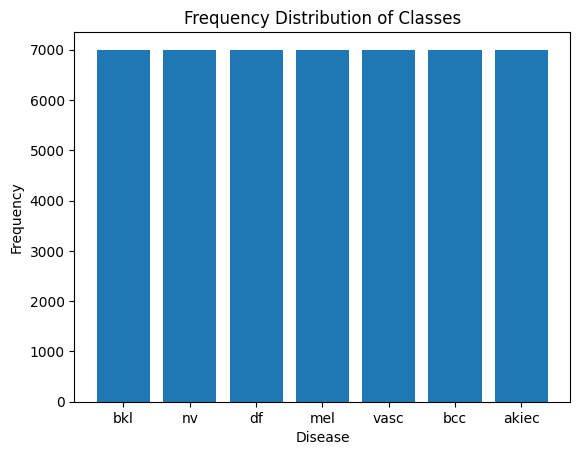

In [ ]:

import matplotlib.pyplot as plt

# Create a list of disease classes as x-axis labels
x11111 = ["bkl", "nv", "df", "mel", "vasc", "bcc", "akiec"]
plt.bar(x11111, y11111)
plt.title("Frequency Distribution of Classes")
plt.xlabel("Disease")
plt.ylabel("Frequency")

plt.show()


In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from scipy.stats import moment
from skimage.feature import graycomatrix, graycoprops

In [ ]:
test = pd.read_csv('/content/hmnist_28_28_RGB.csv')

In [ ]:
fe=[]
test.head(10)
X = test.iloc[:,0:-1]
Y = test.iloc[:,-1]

In [ ]:
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X, Y)
X.shape, Y.shape
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape[0],28,28,3)

In [ ]:
for i in range(46935):
 a=X[i,:,:,:]
 a = np.array(a, dtype=np.uint8)
 X[i,:,:,:]=cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

In [ ]:
for i in range(46935):
 a=X[i,:,:,:]
 ar=a[:,:,0]
 ag=a[:,:,1]
 ab=a[:,:,2]
 f1=skew(ar,axis=None)
 f2=kurtosis(ar,axis=None)
 f3=ar.mean()
 f4=ar.std()
 f5=moment(ar,moment=5,axis=None)
 f6=skew(ag,axis=None)
 f7=kurtosis(ag,axis=None)
 f8=ag.mean()
 f9=ag.std()
 f10=moment(ar,moment=5,axis=None)
 f11=skew(ab,axis=None)
 f12=kurtosis(ab,axis=None)
 f13=ab.mean()
 f14=ab.std()
 f15=moment(ar,moment=5,axis=None)
 a=X[i,:,:,:]
 a = np.array(a, dtype=np.uint8)
 a=cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
 f16=skew(a,axis=None)
 f17=kurtosis(a,axis=None)
 f18=a.mean()
 f19=a.std()
 f20=moment(a,moment=5,axis=None)
 glcm = graycomatrix(a,distances=[1], angles=[0, 45, 90], levels=256,
                    symmetric=True, normed=True)
 f21=graycoprops(glcm, 'dissimilarity')[0][0]
 f22=graycoprops(glcm, 'correlation')[0][0]
 f23=graycoprops(glcm, 'contrast')[0][0]
 f24=graycoprops(glcm, 'energy')[0][0]
 f25=graycoprops(glcm,'homogeneity')[0][0]
 glcm = graycomatrix(ab,distances=[1], angles=[0, 45, 90], levels=256,
                        symmetric=True, normed=True)
 f26=graycoprops(glcm, 'dissimilarity')[0][0]
 f27=graycoprops(glcm, 'correlation')[0][0]
 f28=graycoprops(glcm, 'contrast')[0][0]
 f29=graycoprops(glcm, 'energy')[0][0]
 f30=graycoprops(glcm,'homogeneity')[0][0]
 glcm = graycomatrix(ag,distances=[1], angles=[0, 45, 90], levels=256,
                        symmetric=True, normed=True)
 f31=graycoprops(glcm, 'dissimilarity')[0][0]
 f32=graycoprops(glcm, 'correlation')[0][0]
 f33=graycoprops(glcm, 'contrast')[0][0]
 f34=graycoprops(glcm, 'energy')[0][0]
 f35=graycoprops(glcm,'homogeneity')[0][0]
 f=[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f21,f22,f23,f24,f25]
 fe.append(f)
fe=np.asarray(fe)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature extraction
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=15)
fit = rfe.fit(fe, Y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fe = scaler.fit_transform(fe)

trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.2,random_state=17)
trainX,validX,trainY,validY = train_test_split(trainX,trainY,test_size=0.2,random_state=17)
ftrainX,ftestX,ftrainY,ftestY = train_test_split(fe,Y,test_size=0.2,random_state=17)
ftrainX,fvalidX,ftrainY,fvalidY = train_test_split(ftrainX,ftrainY,test_size=0.2,random_state=21)
trainX = trainX.astype('float64') / 255.0
testX =  testX.astype('float64') / 255.0
trainY = to_categorical(trainY)
testY = to_categorical(testY)

validX = validX.astype('float64') / 255.0
validY = to_categorical(validY)

In [ ]:
from keras.layers import Flatten, Dense, Activation, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import load_model, Sequential
from keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GaussianNoise
from keras.layers import Dropout

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    plot_model_history(history)


In [ ]:
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate
from keras.models import Model
import numpy as np

In [ ]:
del model
img_input = Input(shape=(28, 28, 3))  ## branch 1 with image input
x = Conv2D(64, (3, 3),activation='relu')(img_input)
x=MaxPooling2D(2,2)(x)
x = Dropout(0.1)(x)
x = Conv2D(128, (3, 3),activation='relu')(x)
x=MaxPooling2D(2,2)(x)
x = Dropout(0.3)(x)
x = Conv2D(128, (3, 3),activation='relu')(x)
x = Dropout(0.2)(x)
x=BatchNormalization()(x)
x = Conv2D(256, (3, 3),activation='relu')(x)
x = Dropout(0.4)(x)
x=BatchNormalization()(x)
x = Flatten()(x)
out_a = Dense(7)(x)

num_input = Input(shape=(20,))        ## branch 2 with numerical input
x1 = Dense(40, activation='relu')(num_input)
x1 = Dropout(0.3)(x1)
x1= Dense(80, activation='relu')(x1)
x1 = Dropout(0.4)(x1)
x1= Dense(100, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1= Dense(200, activation='relu')(x1)
x1 = Dropout(0.5)(x1)
x=BatchNormalization()(x)
out_b = Dense(7)(x1)

concatenated = concatenate([out_a,out_b])
out = Dense(7, activation='softmax')(concatenated)

model = Model([img_input,num_input,], out)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 64)           1792      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 dropout (Dropout)           (None, 13, 13, 64)           0         ['max_pooling2d[0][0]']   

In [ ]:
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate
from keras.models import Model
import numpy as np

In [ ]:
################## ADAM OPTIMIZER   #######################3

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.00125, epsilon = 1e-8, beta_1 = .9, beta_2 = .999)
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.0001)

### Just for sanity check
trainX1=np.concatenate((trainX,trainX,trainX), axis=0)
ftrainX1=np.concatenate((ftrainX,ftrainX,ftrainX), axis=0)
trainY1=np.concatenate((trainY,trainY,trainY), axis=0)
X1 = [trainX1,ftrainX1]
y1 = trainY1
X2 = [validX,fvalidX]
y2 = validY
testX=np.concatenate((trainX,validX,testX), axis=0)
ftestX=np.concatenate((ftrainX,fvalidX,ftestX), axis=0)
testY=np.concatenate((trainY,validY,testY), axis=0)
X3 = [testX,ftestX]
y3 = testY

history=model.fit(X1, y1,batch_size=128, epochs=100, verbose=1, validation_data = (X2,y2), callbacks=[learning_rate_reduction])
pred=np.round(model.predict(X3),0)

Epoch 1/100
705/705 [==============================] - ETA: 0s - loss: 1.1251 - accuracy: 0.5723WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 153s 181ms/step - loss: 1.1251 - accuracy: 0.5723 - val_loss: 0.9952 - val_accuracy: 0.6129 - lr: 0.0010
Epoch 2/100
704/705 [============================>.] - ETA: 0s - loss: 0.5954 - accuracy: 0.7778WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 116s 165ms/step - loss: 0.5954 - accuracy: 0.7778 - val_loss: 1.0732 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 3/100
704/705 [============================>.] - ETA: 0s - loss: 0.4184 - accuracy: 0.8451WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 113s 161ms/step - loss: 0.4184 - accuracy: 0.8451 - val_loss: 0.2997 - val_accuracy: 0.8875 - lr: 0.0010
Epoch 4/100
704/705 [============================>.] - ETA: 0s - loss: 0.3309 - accuracy: 0.8767WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 113s 161ms/step - loss: 0.3310 - accuracy: 0.8766 - val_loss: 0.2805 - val_accuracy: 0.8989 - lr: 0.0010
Epoch 5/100
704/705 [============================>.] - ETA: 0s - loss: 0.2677 - accuracy: 0.9006WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 114s 162ms/step - loss: 0.2677 - accuracy: 0.9006 - val_loss: 0.3984 - val_accuracy: 0.8595 - lr: 0.0010
Epoch 6/100
704/705 [============================>.] - ETA: 0s - loss: 0.2664 - accuracy: 0.9013WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 113s 161ms/step - loss: 0.2665 - accuracy: 0.9013 - val_loss: 0.3443 - val_accuracy: 0.8864 - lr: 0.0010
Epoch 7/100
704/705 [============================>.] - ETA: 0s - loss: 0.2433 - accuracy: 0.9085WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 113s 160ms/step - loss: 0.2433 - accuracy: 0.9085 - val_loss: 3.5905 - val_accuracy: 0.5554 - lr: 0.0010
Epoch 8/100
704/705 [============================>.] - ETA: 0s - loss: 0.4279 - accuracy: 0.8508WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 113s 160ms/step - loss: 0.4280 - accuracy: 0.8508 - val_loss: 2.8114 - val_accuracy: 0.4802 - lr: 0.0010
Epoch 9/100
704/705 [============================>.] - ETA: 0s - loss: 0.3263 - accuracy: 0.8854WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 112s 160ms/step - loss: 0.3263 - accuracy: 0.8854 - val_loss: 0.4599 - val_accuracy: 0.8374 - lr: 0.0010
Epoch 10/100
704/705 [============================>.] - ETA: 0s - loss: 0.2298 - accuracy: 0.9168WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 113s 160ms/step - loss: 0.2298 - accuracy: 0.9167 - val_loss: 0.1430 - val_accuracy: 0.9481 - lr: 0.0010
Epoch 11/100
704/705 [============================>.] - ETA: 0s - loss: 0.1795 - accuracy: 0.9344WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 113s 160ms/step - loss: 0.1796 - accuracy: 0.9344 - val_loss: 0.1222 - val_accuracy: 0.9591 - lr: 0.0010
Epoch 12/100
704/705 [============================>.] - ETA: 0s - loss: 0.1665 - accuracy: 0.9390WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 113s 160ms/step - loss: 0.1665 - accuracy: 0.9390 - val_loss: 0.1910 - val_accuracy: 0.9325 - lr: 0.0010
Epoch 13/100
704/705 [============================>.] - ETA: 0s - loss: 0.1668 - accuracy: 0.9389WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 113s 160ms/step - loss: 0.1668 - accuracy: 0.9389 - val_loss: 0.1140 - val_accuracy: 0.9623 - lr: 0.0010
Epoch 14/100
704/705 [============================>.] - ETA: 0s - loss: 0.1495 - accuracy: 0.9457WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 113s 160ms/step - loss: 0.1495 - accuracy: 0.9457 - val_loss: 0.1889 - val_accuracy: 0.9393 - lr: 0.0010
Epoch 15/100
704/705 [============================>.] - ETA: 0s - loss: 0.1766 - accuracy: 0.9368WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 112s 159ms/step - loss: 0.1767 - accuracy: 0.9368 - val_loss: 0.1062 - val_accuracy: 0.9652 - lr: 0.0010
Epoch 16/100
704/705 [============================>.] - ETA: 0s - loss: 0.1287 - accuracy: 0.9526WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 135s 192ms/step - loss: 0.1287 - accuracy: 0.9526 - val_loss: 0.2270 - val_accuracy: 0.9292 - lr: 0.0010
Epoch 17/100
704/705 [============================>.] - ETA: 0s - loss: 0.1432 - accuracy: 0.9490WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 128s 182ms/step - loss: 0.1432 - accuracy: 0.9490 - val_loss: 0.1389 - val_accuracy: 0.9545 - lr: 0.0010
Epoch 18/100
704/705 [============================>.] - ETA: 0s - loss: 0.1258 - accuracy: 0.9543WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 126s 179ms/step - loss: 0.1258 - accuracy: 0.9543 - val_loss: 0.1048 - val_accuracy: 0.9675 - lr: 0.0010
Epoch 19/100
704/705 [============================>.] - ETA: 0s - loss: 0.1202 - accuracy: 0.9563WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 125s 177ms/step - loss: 0.1202 - accuracy: 0.9563 - val_loss: 0.1006 - val_accuracy: 0.9695 - lr: 0.0010
Epoch 20/100
704/705 [============================>.] - ETA: 0s - loss: 0.1173 - accuracy: 0.9576WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 126s 178ms/step - loss: 0.1173 - accuracy: 0.9576 - val_loss: 0.0876 - val_accuracy: 0.9707 - lr: 0.0010
Epoch 21/100
704/705 [============================>.] - ETA: 0s - loss: 0.1088 - accuracy: 0.9608WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 125s 178ms/step - loss: 0.1090 - accuracy: 0.9607 - val_loss: 0.2437 - val_accuracy: 0.9304 - lr: 0.0010
Epoch 22/100
704/705 [============================>.] - ETA: 0s - loss: 0.1716 - accuracy: 0.9421WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 126s 178ms/step - loss: 0.1717 - accuracy: 0.9421 - val_loss: 0.0859 - val_accuracy: 0.9720 - lr: 0.0010
Epoch 23/100
704/705 [============================>.] - ETA: 0s - loss: 0.1035 - accuracy: 0.9626WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 125s 177ms/step - loss: 0.1036 - accuracy: 0.9626 - val_loss: 0.5421 - val_accuracy: 0.8398 - lr: 0.0010
Epoch 24/100
704/705 [============================>.] - ETA: 0s - loss: 0.2086 - accuracy: 0.9277WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 124s 176ms/step - loss: 0.2086 - accuracy: 0.9277 - val_loss: 0.1274 - val_accuracy: 0.9543 - lr: 0.0010
Epoch 25/100
704/705 [============================>.] - ETA: 0s - loss: 0.1398 - accuracy: 0.9500WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 126s 178ms/step - loss: 0.1399 - accuracy: 0.9500 - val_loss: 0.1435 - val_accuracy: 0.9562 - lr: 0.0010
Epoch 26/100
704/705 [============================>.] - ETA: 0s - loss: 0.1850 - accuracy: 0.9349WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 125s 177ms/step - loss: 0.1851 - accuracy: 0.9348 - val_loss: 0.3896 - val_accuracy: 0.8690 - lr: 0.0010
Epoch 27/100
704/705 [============================>.] - ETA: 0s - loss: 0.6657 - accuracy: 0.7595WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 126s 178ms/step - loss: 0.6657 - accuracy: 0.7595 - val_loss: 0.1281 - val_accuracy: 0.9586 - lr: 0.0010
Epoch 28/100
704/705 [============================>.] - ETA: 0s - loss: 0.1490 - accuracy: 0.9463WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 126s 179ms/step - loss: 0.1491 - accuracy: 0.9463 - val_loss: 1.5044 - val_accuracy: 0.7007 - lr: 0.0010
Epoch 29/100
704/705 [============================>.] - ETA: 0s - loss: 1.0749 - accuracy: 0.6044WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 126s 178ms/step - loss: 1.0749 - accuracy: 0.6044 - val_loss: 0.3593 - val_accuracy: 0.8846 - lr: 0.0010
Epoch 30/100
704/705 [============================>.] - ETA: 0s - loss: 0.4441 - accuracy: 0.8398WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 125s 177ms/step - loss: 0.4441 - accuracy: 0.8398 - val_loss: 0.3997 - val_accuracy: 0.8491 - lr: 0.0010
Epoch 31/100
704/705 [============================>.] - ETA: 0s - loss: 0.2712 - accuracy: 0.9030WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 127s 180ms/step - loss: 0.2713 - accuracy: 0.9030 - val_loss: 0.1101 - val_accuracy: 0.9603 - lr: 0.0010
Epoch 32/100
704/705 [============================>.] - ETA: 0s - loss: 0.1536 - accuracy: 0.9440WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 126s 179ms/step - loss: 0.1536 - accuracy: 0.9440 - val_loss: 0.1779 - val_accuracy: 0.9427 - lr: 0.0010
Epoch 33/100
704/705 [============================>.] - ETA: 0s - loss: 0.3256 - accuracy: 0.8888WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 126s 178ms/step - loss: 0.3256 - accuracy: 0.8889 - val_loss: 0.1423 - val_accuracy: 0.9514 - lr: 0.0010
Epoch 34/100
704/705 [============================>.] - ETA: 0s - loss: 0.1418 - accuracy: 0.9490WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 126s 179ms/step - loss: 0.1419 - accuracy: 0.9490 - val_loss: 0.7311 - val_accuracy: 0.8198 - lr: 0.0010
Epoch 35/100
704/705 [============================>.] - ETA: 0s - loss: 0.3753 - accuracy: 0.8705WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 126s 179ms/step - loss: 0.3754 - accuracy: 0.8705 - val_loss: 0.1452 - val_accuracy: 0.9491 - lr: 0.0010
Epoch 36/100
704/705 [============================>.] - ETA: 0s - loss: 0.1465 - accuracy: 0.9480WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 128s 182ms/step - loss: 0.1466 - accuracy: 0.9480 - val_loss: 0.1133 - val_accuracy: 0.9648 - lr: 0.0010
Epoch 37/100
704/705 [============================>.] - ETA: 0s - loss: 0.1216 - accuracy: 0.9570WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 126s 179ms/step - loss: 0.1216 - accuracy: 0.9570 - val_loss: 0.0931 - val_accuracy: 0.9684 - lr: 0.0010
Epoch 38/100
704/705 [============================>.] - ETA: 0s - loss: 0.0995 - accuracy: 0.9640WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 125s 177ms/step - loss: 0.0995 - accuracy: 0.9640 - val_loss: 0.0779 - val_accuracy: 0.9746 - lr: 0.0010
Epoch 39/100
704/705 [============================>.] - ETA: 0s - loss: 0.0930 - accuracy: 0.9663WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 126s 178ms/step - loss: 0.0931 - accuracy: 0.9663 - val_loss: 0.2599 - val_accuracy: 0.9153 - lr: 0.0010
Epoch 40/100
704/705 [============================>.] - ETA: 0s - loss: 0.1788 - accuracy: 0.9389WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 126s 178ms/step - loss: 0.1789 - accuracy: 0.9389 - val_loss: 0.3541 - val_accuracy: 0.8908 - lr: 0.0010
Epoch 41/100
704/705 [============================>.] - ETA: 0s - loss: 0.1982 - accuracy: 0.9338WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 126s 179ms/step - loss: 0.1983 - accuracy: 0.9338 - val_loss: 0.0798 - val_accuracy: 0.9746 - lr: 0.0010
Epoch 42/100
704/705 [============================>.] - ETA: 0s - loss: 0.0911 - accuracy: 0.9677WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 134s 190ms/step - loss: 0.0911 - accuracy: 0.9677 - val_loss: 0.1235 - val_accuracy: 0.9605 - lr: 0.0010
Epoch 43/100
704/705 [============================>.] - ETA: 0s - loss: 0.1292 - accuracy: 0.9555WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 134s 190ms/step - loss: 0.1292 - accuracy: 0.9555 - val_loss: 0.1675 - val_accuracy: 0.9431 - lr: 0.0010
Epoch 44/100
704/705 [============================>.] - ETA: 0s - loss: 0.4713 - accuracy: 0.8375WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 115s 163ms/step - loss: 0.4713 - accuracy: 0.8375 - val_loss: 0.1067 - val_accuracy: 0.9644 - lr: 0.0010
Epoch 45/100
704/705 [============================>.] - ETA: 0s - loss: 0.1280 - accuracy: 0.9543WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 116s 165ms/step - loss: 0.1281 - accuracy: 0.9543 - val_loss: 0.1156 - val_accuracy: 0.9634 - lr: 0.0010
Epoch 46/100
704/705 [============================>.] - ETA: 0s - loss: 0.1866 - accuracy: 0.9377WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 108s 154ms/step - loss: 0.1866 - accuracy: 0.9377 - val_loss: 0.0827 - val_accuracy: 0.9747 - lr: 0.0010
Epoch 47/100
704/705 [============================>.] - ETA: 0s - loss: 0.0904 - accuracy: 0.9680WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 105s 150ms/step - loss: 0.0905 - accuracy: 0.9680 - val_loss: 0.1149 - val_accuracy: 0.9650 - lr: 0.0010
Epoch 48/100
704/705 [============================>.] - ETA: 0s - loss: 0.1413 - accuracy: 0.9523WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 103s 147ms/step - loss: 0.1413 - accuracy: 0.9523 - val_loss: 0.1395 - val_accuracy: 0.9559 - lr: 0.0010
Epoch 49/100
704/705 [============================>.] - ETA: 0s - loss: 0.1512 - accuracy: 0.9488WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 102s 145ms/step - loss: 0.1513 - accuracy: 0.9487 - val_loss: 0.1488 - val_accuracy: 0.9533 - lr: 0.0010
Epoch 50/100
704/705 [============================>.] - ETA: 0s - loss: 0.1560 - accuracy: 0.9472WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 102s 144ms/step - loss: 0.1560 - accuracy: 0.9471 - val_loss: 0.1359 - val_accuracy: 0.9605 - lr: 0.0010
Epoch 51/100
704/705 [============================>.] - ETA: 0s - loss: 0.1492 - accuracy: 0.9493WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 101s 143ms/step - loss: 0.1492 - accuracy: 0.9493 - val_loss: 0.1439 - val_accuracy: 0.9599 - lr: 0.0010
Epoch 52/100
704/705 [============================>.] - ETA: 0s - loss: 0.1857 - accuracy: 0.9384WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 102s 144ms/step - loss: 0.1857 - accuracy: 0.9384 - val_loss: 0.1126 - val_accuracy: 0.9680 - lr: 0.0010
Epoch 53/100
704/705 [============================>.] - ETA: 0s - loss: 0.1046 - accuracy: 0.9636WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 102s 145ms/step - loss: 0.1046 - accuracy: 0.9636 - val_loss: 0.1085 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 54/100
704/705 [============================>.] - ETA: 0s - loss: 0.1514 - accuracy: 0.9482WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 102s 144ms/step - loss: 0.1514 - accuracy: 0.9482 - val_loss: 0.0858 - val_accuracy: 0.9723 - lr: 0.0010
Epoch 55/100
704/705 [============================>.] - ETA: 0s - loss: 0.0797 - accuracy: 0.9719WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 102s 144ms/step - loss: 0.0798 - accuracy: 0.9719 - val_loss: 0.0787 - val_accuracy: 0.9760 - lr: 0.0010
Epoch 56/100
704/705 [============================>.] - ETA: 0s - loss: 0.0706 - accuracy: 0.9749WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 101s 144ms/step - loss: 0.0706 - accuracy: 0.9749 - val_loss: 0.1064 - val_accuracy: 0.9667 - lr: 0.0010
Epoch 57/100
704/705 [============================>.] - ETA: 0s - loss: 0.0687 - accuracy: 0.9758WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 101s 143ms/step - loss: 0.0688 - accuracy: 0.9758 - val_loss: 0.0893 - val_accuracy: 0.9743 - lr: 0.0010
Epoch 58/100
705/705 [==============================] - ETA: 0s - loss: 0.0644 - accuracy: 0.9767WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 101s 143ms/step - loss: 0.0644 - accuracy: 0.9767 - val_loss: 0.0998 - val_accuracy: 0.9728 - lr: 0.0010
Epoch 59/100
704/705 [============================>.] - ETA: 0s - loss: 0.0647 - accuracy: 0.9766WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 100s 142ms/step - loss: 0.0647 - accuracy: 0.9766 - val_loss: 0.0852 - val_accuracy: 0.9778 - lr: 0.0010
Epoch 60/100
704/705 [============================>.] - ETA: 0s - loss: 0.0645 - accuracy: 0.9773WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 101s 143ms/step - loss: 0.0646 - accuracy: 0.9773 - val_loss: 0.0918 - val_accuracy: 0.9712 - lr: 0.0010
Epoch 61/100
704/705 [============================>.] - ETA: 0s - loss: 0.0778 - accuracy: 0.9728WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 102s 144ms/step - loss: 0.0779 - accuracy: 0.9728 - val_loss: 0.1071 - val_accuracy: 0.9692 - lr: 0.0010
Epoch 62/100
704/705 [============================>.] - ETA: 0s - loss: 0.0724 - accuracy: 0.9749WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 100s 141ms/step - loss: 0.0724 - accuracy: 0.9749 - val_loss: 0.1056 - val_accuracy: 0.9711 - lr: 0.0010
Epoch 63/100
704/705 [============================>.] - ETA: 0s - loss: 0.0546 - accuracy: 0.9804WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 100s 142ms/step - loss: 0.0547 - accuracy: 0.9804 - val_loss: 0.1027 - val_accuracy: 0.9707 - lr: 0.0010
Epoch 64/100
704/705 [============================>.] - ETA: 0s - loss: 0.0565 - accuracy: 0.9799WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 105s 149ms/step - loss: 0.0566 - accuracy: 0.9799 - val_loss: 0.1292 - val_accuracy: 0.9575 - lr: 0.0010
Epoch 65/100
704/705 [============================>.] - ETA: 0s - loss: 0.1236 - accuracy: 0.9592WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 102s 145ms/step - loss: 0.1236 - accuracy: 0.9592 - val_loss: 0.0846 - val_accuracy: 0.9739 - lr: 0.0010
Epoch 66/100
704/705 [============================>.] - ETA: 0s - loss: 0.0691 - accuracy: 0.9757WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 100s 141ms/step - loss: 0.0691 - accuracy: 0.9757 - val_loss: 0.0801 - val_accuracy: 0.9751 - lr: 0.0010
Epoch 67/100
704/705 [============================>.] - ETA: 0s - loss: 0.0549 - accuracy: 0.9809WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 100s 142ms/step - loss: 0.0550 - accuracy: 0.9809 - val_loss: 0.0856 - val_accuracy: 0.9763 - lr: 0.0010
Epoch 68/100
704/705 [============================>.] - ETA: 0s - loss: 0.0570 - accuracy: 0.9797WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 106s 150ms/step - loss: 0.0573 - accuracy: 0.9797 - val_loss: 0.1511 - val_accuracy: 0.9589 - lr: 0.0010
Epoch 69/100
704/705 [============================>.] - ETA: 0s - loss: 0.0744 - accuracy: 0.9740WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 105s 148ms/step - loss: 0.0745 - accuracy: 0.9740 - val_loss: 0.0844 - val_accuracy: 0.9787 - lr: 0.0010
Epoch 70/100
704/705 [============================>.] - ETA: 0s - loss: 0.0526 - accuracy: 0.9816WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 109s 154ms/step - loss: 0.0526 - accuracy: 0.9816 - val_loss: 0.2102 - val_accuracy: 0.9358 - lr: 0.0010
Epoch 71/100
704/705 [============================>.] - ETA: 0s - loss: 0.1307 - accuracy: 0.9580WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 112s 158ms/step - loss: 0.1308 - accuracy: 0.9580 - val_loss: 0.0955 - val_accuracy: 0.9736 - lr: 0.0010
Epoch 72/100
704/705 [============================>.] - ETA: 0s - loss: 0.0482 - accuracy: 0.9836WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 107s 152ms/step - loss: 0.0483 - accuracy: 0.9836 - val_loss: 0.0905 - val_accuracy: 0.9756 - lr: 0.0010
Epoch 73/100
704/705 [============================>.] - ETA: 0s - loss: 0.0463 - accuracy: 0.9838WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 109s 154ms/step - loss: 0.0463 - accuracy: 0.9838 - val_loss: 0.1011 - val_accuracy: 0.9755 - lr: 0.0010
Epoch 74/100
704/705 [============================>.] - ETA: 0s - loss: 0.0441 - accuracy: 0.9843WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 108s 154ms/step - loss: 0.0442 - accuracy: 0.9843 - val_loss: 0.0863 - val_accuracy: 0.9760 - lr: 0.0010
Epoch 75/100
704/705 [============================>.] - ETA: 0s - loss: 0.0481 - accuracy: 0.9832WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 104s 148ms/step - loss: 0.0482 - accuracy: 0.9832 - val_loss: 0.1019 - val_accuracy: 0.9734 - lr: 0.0010
Epoch 76/100
704/705 [============================>.] - ETA: 0s - loss: 0.0490 - accuracy: 0.9829WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 102s 145ms/step - loss: 0.0491 - accuracy: 0.9828 - val_loss: 0.0926 - val_accuracy: 0.9767 - lr: 0.0010
Epoch 77/100
704/705 [============================>.] - ETA: 0s - loss: 0.0473 - accuracy: 0.9835WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 102s 145ms/step - loss: 0.0473 - accuracy: 0.9835 - val_loss: 0.1136 - val_accuracy: 0.9686 - lr: 0.0010
Epoch 78/100
704/705 [============================>.] - ETA: 0s - loss: 0.1033 - accuracy: 0.9668WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 102s 144ms/step - loss: 0.1033 - accuracy: 0.9668 - val_loss: 0.0905 - val_accuracy: 0.9762 - lr: 0.0010
Epoch 79/100
704/705 [============================>.] - ETA: 0s - loss: 0.0466 - accuracy: 0.9839WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 114s 162ms/step - loss: 0.0466 - accuracy: 0.9839 - val_loss: 0.5446 - val_accuracy: 0.8465 - lr: 0.0010
Epoch 80/100
704/705 [============================>.] - ETA: 0s - loss: 0.4290 - accuracy: 0.8633WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 106s 150ms/step - loss: 0.4291 - accuracy: 0.8633 - val_loss: 0.1503 - val_accuracy: 0.9547 - lr: 0.0010
Epoch 81/100
704/705 [============================>.] - ETA: 0s - loss: 0.3164 - accuracy: 0.8913WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 105s 148ms/step - loss: 0.3165 - accuracy: 0.8913 - val_loss: 0.1039 - val_accuracy: 0.9664 - lr: 0.0010
Epoch 82/100
704/705 [============================>.] - ETA: 0s - loss: 0.1160 - accuracy: 0.9600WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 112s 159ms/step - loss: 0.1160 - accuracy: 0.9600 - val_loss: 0.0850 - val_accuracy: 0.9734 - lr: 0.0010
Epoch 83/100
704/705 [============================>.] - ETA: 0s - loss: 0.0750 - accuracy: 0.9740WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 105s 149ms/step - loss: 0.0751 - accuracy: 0.9740 - val_loss: 0.0806 - val_accuracy: 0.9764 - lr: 0.0010
Epoch 84/100
704/705 [============================>.] - ETA: 0s - loss: 0.0651 - accuracy: 0.9773WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 114s 162ms/step - loss: 0.0651 - accuracy: 0.9773 - val_loss: 0.0906 - val_accuracy: 0.9740 - lr: 0.0010
Epoch 85/100
704/705 [============================>.] - ETA: 0s - loss: 0.0526 - accuracy: 0.9819WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 120s 171ms/step - loss: 0.0526 - accuracy: 0.9819 - val_loss: 0.1420 - val_accuracy: 0.9628 - lr: 0.0010
Epoch 86/100
704/705 [============================>.] - ETA: 0s - loss: 0.2945 - accuracy: 0.9043WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 120s 171ms/step - loss: 0.2945 - accuracy: 0.9043 - val_loss: 0.0923 - val_accuracy: 0.9707 - lr: 0.0010
Epoch 87/100
704/705 [============================>.] - ETA: 0s - loss: 0.0885 - accuracy: 0.9691WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 121s 171ms/step - loss: 0.0886 - accuracy: 0.9691 - val_loss: 0.2406 - val_accuracy: 0.9233 - lr: 0.0010
Epoch 88/100
704/705 [============================>.] - ETA: 0s - loss: 0.5200 - accuracy: 0.8260WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 121s 171ms/step - loss: 0.5199 - accuracy: 0.8260 - val_loss: 0.1112 - val_accuracy: 0.9674 - lr: 0.0010
Epoch 89/100
704/705 [============================>.] - ETA: 0s - loss: 0.1410 - accuracy: 0.9508WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 119s 169ms/step - loss: 0.1410 - accuracy: 0.9508 - val_loss: 0.1032 - val_accuracy: 0.9700 - lr: 0.0010
Epoch 90/100
704/705 [============================>.] - ETA: 0s - loss: 0.1082 - accuracy: 0.9624WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 120s 170ms/step - loss: 0.1083 - accuracy: 0.9624 - val_loss: 0.0866 - val_accuracy: 0.9728 - lr: 0.0010
Epoch 91/100
704/705 [============================>.] - ETA: 0s - loss: 0.0674 - accuracy: 0.9762WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 120s 170ms/step - loss: 0.0674 - accuracy: 0.9762 - val_loss: 0.0883 - val_accuracy: 0.9732 - lr: 0.0010
Epoch 92/100
704/705 [============================>.] - ETA: 0s - loss: 0.0582 - accuracy: 0.9793WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 120s 170ms/step - loss: 0.0582 - accuracy: 0.9793 - val_loss: 0.0872 - val_accuracy: 0.9747 - lr: 0.0010
Epoch 93/100
704/705 [============================>.] - ETA: 0s - loss: 0.0503 - accuracy: 0.9821WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 120s 170ms/step - loss: 0.0503 - accuracy: 0.9821 - val_loss: 0.0746 - val_accuracy: 0.9788 - lr: 0.0010
Epoch 94/100
704/705 [============================>.] - ETA: 0s - loss: 0.0611 - accuracy: 0.9781WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 120s 170ms/step - loss: 0.0611 - accuracy: 0.9781 - val_loss: 0.1067 - val_accuracy: 0.9719 - lr: 0.0010
Epoch 95/100
704/705 [============================>.] - ETA: 0s - loss: 0.0447 - accuracy: 0.9843WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 120s 170ms/step - loss: 0.0448 - accuracy: 0.9843 - val_loss: 0.0986 - val_accuracy: 0.9715 - lr: 0.0010
Epoch 96/100
704/705 [============================>.] - ETA: 0s - loss: 0.1055 - accuracy: 0.9657WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 120s 170ms/step - loss: 0.1055 - accuracy: 0.9657 - val_loss: 0.1224 - val_accuracy: 0.9635 - lr: 0.0010
Epoch 97/100
704/705 [============================>.] - ETA: 0s - loss: 0.1671 - accuracy: 0.9459WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 120s 170ms/step - loss: 0.1672 - accuracy: 0.9459 - val_loss: 0.0876 - val_accuracy: 0.9726 - lr: 0.0010
Epoch 98/100
704/705 [============================>.] - ETA: 0s - loss: 0.0560 - accuracy: 0.9808WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 120s 170ms/step - loss: 0.0560 - accuracy: 0.9808 - val_loss: 0.0820 - val_accuracy: 0.9763 - lr: 0.0010
Epoch 99/100
704/705 [============================>.] - ETA: 0s - loss: 0.0439 - accuracy: 0.9849WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


705/705 [==============================] - 116s 165ms/step - loss: 0.0439 - accuracy: 0.9848 - val_loss: 0.1122 - val_accuracy: 0.9680 - lr: 0.0010
Epoch 100/100
704/705 [============================>.] - ETA: 0s - loss: 0.0605 - accuracy: 0.9789WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


1467/1467 [==============================] - 15s 9ms/step


In [ ]:
import pandas as pd

# Assuming 'history' contains the training history
# history = model.fit(...)

# Create a DataFrame from the training history
history_df = pd.DataFrame(history.history)

# Display the DataFrame
print(history_df)

# Extract validation accuracy, validation loss, and loss from the DataFrame
validation_accuracy = history_df['val_accuracy'].max()
validation_loss = history_df['val_loss'].min()
final_loss = history_df['loss'].iloc[-1]

# Display the results
print(f"\nValidation Accuracy: {validation_accuracy:.4f}")
print(f"Validation Loss: {validation_loss:.4f}")
print(f"Final Loss: {final_loss:.4f}")


        loss  accuracy  val_loss  val_accuracy     lr
0   1.125101  0.572297  0.995208      0.612916  0.001
1   0.595424  0.777804  1.073247      0.657923  0.001
2   0.418448  0.845074  0.299697      0.887483  0.001
3   0.330978  0.876645  0.280486      0.898935  0.001
4   0.267705  0.900648  0.398432      0.859521  0.001
..       ...       ...       ...           ...    ...
95  0.105485  0.965688  0.122358      0.963515  0.001
96  0.167226  0.945902  0.087594      0.972570  0.001
97  0.056035  0.980813  0.081973      0.976298  0.001
98  0.043920  0.984841  0.112216      0.968043  0.001
99  0.060546  0.978916  0.094692      0.975632  0.001

[100 rows x 5 columns]

Validation Accuracy: 0.9788
Validation Loss: 0.0746
Final Loss: 0.0605


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming `model` is already defined and trained using the provided code

# Assuming X3 and y3 are your test set
# X3 = [testX, ftestX]
# y3 = testY

# Predict on the test set
pred = np.round(model.predict(X3), 0)

# Get the confusion matrix
conf_mat = confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1))

print("Confusion Matrix:")
print(conf_mat)


1467/1467 [==============================] - 16s 11ms/step
Confusion Matrix:
[[6705    0    0    0    0    0    0]
 [   0 6705    0    0    0    0    0]
 [   3    3 6685    2    7    0    5]
 [   0    0    0 6705    0    0    0]
 [  32   35  101    4 6311    6  216]
 [   0    0    0    0    0 6705    0]
 [   2    0    7    4    6    0 6686]]


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming `model` is already defined and trained using the provided code

# Assuming X3 and y3 are your test set
# X3 = [testX, ftestX]
# y3 = testY

# Predict on the test set
pred = np.round(model.predict(X3), 0)

# Get the confusion matrix
conf_mat = confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1))

# Extract TP, TN, FP, FN
TP = conf_mat[1, 1]  # True Positive
TN = conf_mat[0, 0]  # True Negative
FP = conf_mat[0, 1]  # False Positive
FN = conf_mat[1, 0]  # False Negative

# Display the results
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)


1467/1467 [==============================] - 13s 9ms/step
True Positive (TP): 6705
True Negative (TN): 6705
False Positive (FP): 0
False Negative (FN): 0


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

[[6705    0    0    0    0    0    0]
 [   0 6705    0    0    0    0    0]
 [   3    3 6685    2    7    0    5]
 [   0    0    0 6705    0    0    0]
 [  32   35  101    4 6311    6  216]
 [   0    0    0    0    0 6705    0]
 [   2    0    7    4    6    0 6686]]


c:\Users\beeram yogesh kumar\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6705
           1       0.99      1.00      1.00      6705
           2       0.98      1.00      0.99      6705
           3       1.00      1.00      1.00      6705
           4       1.00      0.94      0.97      6705
           5       1.00      1.00      1.00      6705
           6       0.97      1.00      0.98      6705

   micro avg       0.99      0.99      0.99     46935
   macro avg       0.99      0.99      0.99     46935
weighted avg       0.99      0.99      0.99     46935
 samples avg       0.99      0.99      0.99     46935



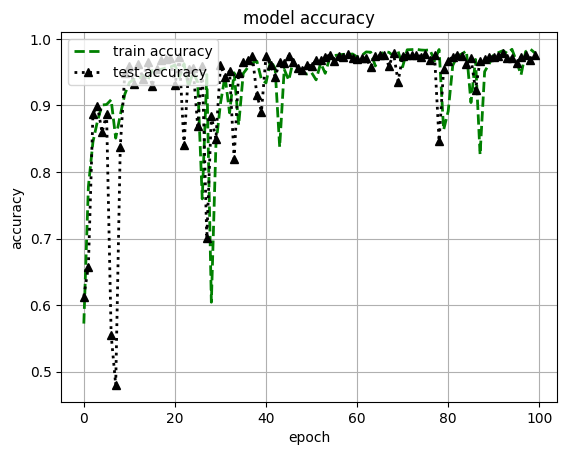

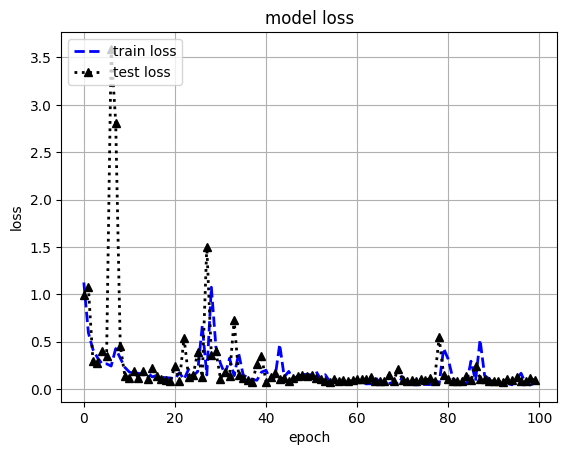

Test loss: 0.03521053493022919
Test accuracy: 0.9909875392913818


In [ ]:
print(confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1)))
print(classification_report(y3,pred))
plt.plot(history.history['accuracy'],'g--', linewidth=2, markersize=6)
plt.plot(history.history['val_accuracy'],'^k:', linewidth=2, markersize=6)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],'b--', linewidth=2, markersize=6)
plt.plot(history.history['val_loss'],'^k:', linewidth=2, markersize=6)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper left')
plt.grid()
plt.show()

score = model.evaluate(X3, y3,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
!pip install scipy
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
from scipy.interpolate import interp1d


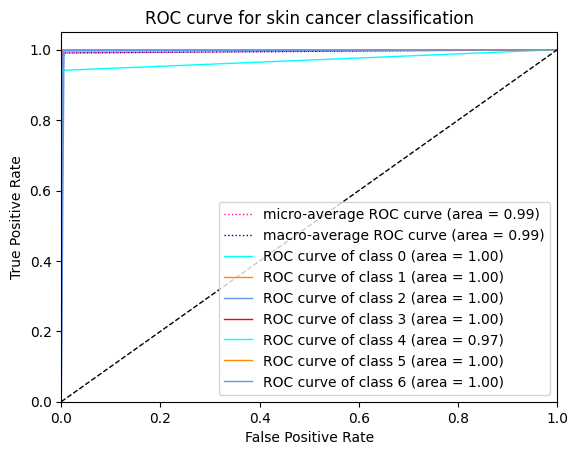

In [ ]:
x_test = X3
n_classes=7
lw=1
y_score =pred

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y3[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y3.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
  mean_tpr += interp1d(fpr[i], tpr[i])(all_fpr)

# ... (rest of the code)

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=1)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=1)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for skin cancer classification')
plt.legend(loc="lower right")
plt.show()

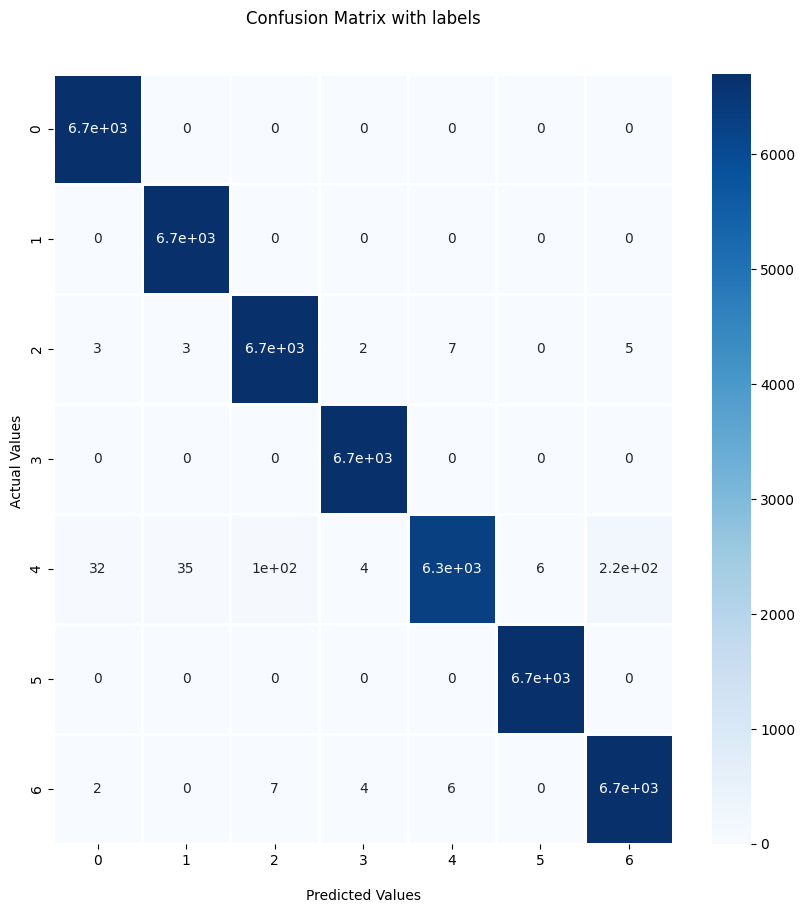

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))


ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

In [ ]:
import numpy as np

def calculate_metrics(conf_matrix):
    metrics = []

    for i in range(conf_matrix.shape[0]):
        true_positive = conf_matrix[i, i]
        false_positive = np.sum(conf_matrix[:, i]) - true_positive
        false_negative = np.sum(conf_matrix[i, :]) - true_positive
        true_negative = np.sum(conf_matrix) - true_positive - false_positive - false_negative

        metrics.append({
            'class': i,
            'true_positive': true_positive,
            'true_negative': true_negative,
            'false_positive': false_positive,
            'false_negative': false_negative
        })

    return metrics

# Example usage:
# Replace `your_conf_matrix` with your actual confusion matrix of size 7x7
your_conf_matrix = confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1))

metrics = calculate_metrics(your_conf_matrix)

# Print the metrics for each class
for metric in metrics:
    print(f"Class {metric['class']}:")
    print(f"True Positive: {metric['true_positive']}")
    print(f"True Negative: {metric['true_negative']}")
    print(f"False Positive: {metric['false_positive']}")
    print(f"False Negative: {metric['false_negative']}\n")


Class 0:
True Positive: 6705
True Negative: 40193
False Positive: 37
False Negative: 0

Class 1:
True Positive: 6705
True Negative: 40192
False Positive: 38
False Negative: 0

Class 2:
True Positive: 6685
True Negative: 40122
False Positive: 108
False Negative: 20

Class 3:
True Positive: 6705
True Negative: 40220
False Positive: 10
False Negative: 0

Class 4:
True Positive: 6311
True Negative: 40217
False Positive: 13
False Negative: 394

Class 5:
True Positive: 6705
True Negative: 40224
False Positive: 6
False Negative: 0

Class 6:
True Positive: 6686
True Negative: 40009
False Positive: 221
False Negative: 19



In [ ]:
#################### NADAM OPTIMIZER ##############################

In [ ]:
from keras.optimizers import Nadam
from keras.callbacks import ReduceLROnPlateau

# Change optimizer to Nadam
optimizer = Nadam(lr=0.00125, epsilon=1e-8, beta_1=0.9, beta_2=0.999)

# Compile the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_acc',
    patience=2,
    verbose=1,
    factor=0.5,
    min_lr=0.0001
)

### Just for sanity check
trainX1 = np.concatenate((trainX, trainX, trainX), axis=0)
ftrainX1 = np.concatenate((ftrainX, ftrainX, ftrainX), axis=0)
trainY1 = np.concatenate((trainY, trainY, trainY), axis=0)
X1 = [trainX1, ftrainX1]
y1 = trainY1
X2 = [validX, fvalidX]
y2 = validY
testX = np.concatenate((trainX, validX, testX), axis=0)
ftestX = np.concatenate((ftrainX, fvalidX, ftestX), axis=0)
testY = np.concatenate((trainY, validY, testY), axis=0)
X3 = [testX, ftestX]
y3 = testY

history = model.fit(X1, y1, batch_size=128, epochs=100, verbose=1, validation_data=(X2, y2), callbacks=[learning_rate_reduction])
pred = np.round(model.predict(X3), 0)


Epoch 1/100
704/705 [============================>.] - ETA: 0s - loss: 1.1002 - accuracy: 0.5832

705/705 [==============================] - 267s 371ms/step - loss: 1.1002 - accuracy: 0.5832 - val_loss: 1.6279 - val_accuracy: 0.4569 - lr: 0.0010
Epoch 2/100
704/705 [============================>.] - ETA: 0s - loss: 0.5337 - accuracy: 0.8009

705/705 [==============================] - 241s 342ms/step - loss: 0.5337 - accuracy: 0.8009 - val_loss: 1.2120 - val_accuracy: 0.6531 - lr: 0.0010
Epoch 3/100
704/705 [============================>.] - ETA: 0s - loss: 0.3603 - accuracy: 0.8661

705/705 [==============================] - 249s 353ms/step - loss: 0.3603 - accuracy: 0.8661 - val_loss: 1.2909 - val_accuracy: 0.6281 - lr: 0.0010
Epoch 4/100
704/705 [============================>.] - ETA: 0s - loss: 0.2894 - accuracy: 0.8930

705/705 [==============================] - 243s 345ms/step - loss: 0.2894 - accuracy: 0.8930 - val_loss: 1.9009 - val_accuracy: 0.5276 - lr: 0.0010
Epoch 5/100
704/705 [============================>.] - ETA: 0s - loss: 0.3299 - accuracy: 0.8816

705/705 [==============================] - 242s 343ms/step - loss: 0.3299 - accuracy: 0.8816 - val_loss: 3.1894 - val_accuracy: 0.3704 - lr: 0.0010
Epoch 6/100
704/705 [============================>.] - ETA: 0s - loss: 0.4349 - accuracy: 0.8438

705/705 [==============================] - 245s 347ms/step - loss: 0.4349 - accuracy: 0.8437 - val_loss: 0.2528 - val_accuracy: 0.9067 - lr: 0.0010
Epoch 7/100
704/705 [============================>.] - ETA: 0s - loss: 0.2134 - accuracy: 0.9217

705/705 [==============================] - 245s 347ms/step - loss: 0.2134 - accuracy: 0.9217 - val_loss: 0.1914 - val_accuracy: 0.9313 - lr: 0.0010
Epoch 8/100
704/705 [============================>.] - ETA: 0s - loss: 0.1853 - accuracy: 0.9314

705/705 [==============================] - 243s 345ms/step - loss: 0.1853 - accuracy: 0.9314 - val_loss: 0.1248 - val_accuracy: 0.9599 - lr: 0.0010
Epoch 9/100
704/705 [============================>.] - ETA: 0s - loss: 0.1630 - accuracy: 0.9400

705/705 [==============================] - 238s 338ms/step - loss: 0.1630 - accuracy: 0.9400 - val_loss: 0.5979 - val_accuracy: 0.8047 - lr: 0.0010
Epoch 10/100
704/705 [============================>.] - ETA: 0s - loss: 0.2024 - accuracy: 0.9273

705/705 [==============================] - 243s 344ms/step - loss: 0.2024 - accuracy: 0.9273 - val_loss: 0.1452 - val_accuracy: 0.9498 - lr: 0.0010
Epoch 11/100
704/705 [============================>.] - ETA: 0s - loss: 0.1490 - accuracy: 0.9447

705/705 [==============================] - 241s 342ms/step - loss: 0.1491 - accuracy: 0.9447 - val_loss: 2.9219 - val_accuracy: 0.4704 - lr: 0.0010
Epoch 12/100
704/705 [============================>.] - ETA: 0s - loss: 0.7467 - accuracy: 0.7268

705/705 [==============================] - 242s 343ms/step - loss: 0.7467 - accuracy: 0.7268 - val_loss: 0.6943 - val_accuracy: 0.7680 - lr: 0.0010
Epoch 13/100
704/705 [============================>.] - ETA: 0s - loss: 0.1971 - accuracy: 0.9291

705/705 [==============================] - 246s 349ms/step - loss: 0.1972 - accuracy: 0.9291 - val_loss: 4.0407 - val_accuracy: 0.2561 - lr: 0.0010
Epoch 14/100
704/705 [============================>.] - ETA: 0s - loss: 0.5164 - accuracy: 0.8193

705/705 [==============================] - 244s 346ms/step - loss: 0.5165 - accuracy: 0.8193 - val_loss: 0.1292 - val_accuracy: 0.9566 - lr: 0.0010
Epoch 15/100
704/705 [============================>.] - ETA: 0s - loss: 0.1633 - accuracy: 0.9421

705/705 [==============================] - 244s 346ms/step - loss: 0.1633 - accuracy: 0.9421 - val_loss: 0.1040 - val_accuracy: 0.9659 - lr: 0.0010
Epoch 16/100
704/705 [============================>.] - ETA: 0s - loss: 0.1413 - accuracy: 0.9484

705/705 [==============================] - 248s 352ms/step - loss: 0.1413 - accuracy: 0.9483 - val_loss: 0.1754 - val_accuracy: 0.9434 - lr: 0.0010
Epoch 17/100
704/705 [============================>.] - ETA: 0s - loss: 0.1342 - accuracy: 0.9502

705/705 [==============================] - 246s 349ms/step - loss: 0.1342 - accuracy: 0.9502 - val_loss: 0.7047 - val_accuracy: 0.7979 - lr: 0.0010
Epoch 18/100
704/705 [============================>.] - ETA: 0s - loss: 0.2106 - accuracy: 0.9282

705/705 [==============================] - 244s 346ms/step - loss: 0.2107 - accuracy: 0.9282 - val_loss: 0.2484 - val_accuracy: 0.9138 - lr: 0.0010
Epoch 19/100
704/705 [============================>.] - ETA: 0s - loss: 0.1257 - accuracy: 0.9547

705/705 [==============================] - 245s 347ms/step - loss: 0.1257 - accuracy: 0.9547 - val_loss: 0.1164 - val_accuracy: 0.9627 - lr: 0.0010
Epoch 20/100
704/705 [============================>.] - ETA: 0s - loss: 0.1180 - accuracy: 0.9566

705/705 [==============================] - 245s 347ms/step - loss: 0.1181 - accuracy: 0.9565 - val_loss: 1.5412 - val_accuracy: 0.6181 - lr: 0.0010
Epoch 21/100
704/705 [============================>.] - ETA: 0s - loss: 0.5068 - accuracy: 0.8247

705/705 [==============================] - 247s 351ms/step - loss: 0.5068 - accuracy: 0.8246 - val_loss: 0.1003 - val_accuracy: 0.9679 - lr: 0.0010
Epoch 22/100
704/705 [============================>.] - ETA: 0s - loss: 0.1251 - accuracy: 0.9558

705/705 [==============================] - 248s 352ms/step - loss: 0.1251 - accuracy: 0.9558 - val_loss: 0.1050 - val_accuracy: 0.9672 - lr: 0.0010
Epoch 23/100
704/705 [============================>.] - ETA: 0s - loss: 0.1036 - accuracy: 0.9628

705/705 [==============================] - 249s 354ms/step - loss: 0.1036 - accuracy: 0.9628 - val_loss: 0.8373 - val_accuracy: 0.7758 - lr: 0.0010
Epoch 24/100
704/705 [============================>.] - ETA: 0s - loss: 0.1407 - accuracy: 0.9502

705/705 [==============================] - 246s 349ms/step - loss: 0.1407 - accuracy: 0.9502 - val_loss: 0.6715 - val_accuracy: 0.8049 - lr: 0.0010
Epoch 25/100
704/705 [============================>.] - ETA: 0s - loss: 0.2130 - accuracy: 0.9291

705/705 [==============================] - 253s 359ms/step - loss: 0.2131 - accuracy: 0.9291 - val_loss: 1.5015 - val_accuracy: 0.6314 - lr: 0.0010
Epoch 26/100
704/705 [============================>.] - ETA: 0s - loss: 0.1709 - accuracy: 0.9409

705/705 [==============================] - 248s 352ms/step - loss: 0.1710 - accuracy: 0.9408 - val_loss: 0.6313 - val_accuracy: 0.8165 - lr: 0.0010
Epoch 27/100
704/705 [============================>.] - ETA: 0s - loss: 0.2314 - accuracy: 0.9216

705/705 [==============================] - 247s 351ms/step - loss: 0.2315 - accuracy: 0.9216 - val_loss: 2.7027 - val_accuracy: 0.3936 - lr: 0.0010
Epoch 28/100
704/705 [============================>.] - ETA: 0s - loss: 0.2366 - accuracy: 0.9199

705/705 [==============================] - 249s 353ms/step - loss: 0.2367 - accuracy: 0.9199 - val_loss: 1.1101 - val_accuracy: 0.6996 - lr: 0.0010
Epoch 29/100
704/705 [============================>.] - ETA: 0s - loss: 0.1512 - accuracy: 0.9463

705/705 [==============================] - 247s 351ms/step - loss: 0.1512 - accuracy: 0.9463 - val_loss: 0.0909 - val_accuracy: 0.9703 - lr: 0.0010
Epoch 30/100
704/705 [============================>.] - ETA: 0s - loss: 0.0903 - accuracy: 0.9677

705/705 [==============================] - 244s 346ms/step - loss: 0.0903 - accuracy: 0.9677 - val_loss: 0.3114 - val_accuracy: 0.8859 - lr: 0.0010
Epoch 31/100
704/705 [============================>.] - ETA: 0s - loss: 0.1285 - accuracy: 0.9538

705/705 [==============================] - 247s 350ms/step - loss: 0.1285 - accuracy: 0.9538 - val_loss: 0.0977 - val_accuracy: 0.9708 - lr: 0.0010
Epoch 32/100
704/705 [============================>.] - ETA: 0s - loss: 0.0914 - accuracy: 0.9675

705/705 [==============================] - 245s 347ms/step - loss: 0.0915 - accuracy: 0.9675 - val_loss: 0.2562 - val_accuracy: 0.9166 - lr: 0.0010
Epoch 33/100
704/705 [============================>.] - ETA: 0s - loss: 0.1016 - accuracy: 0.9644

705/705 [==============================] - 245s 348ms/step - loss: 0.1016 - accuracy: 0.9644 - val_loss: 0.3038 - val_accuracy: 0.9165 - lr: 0.0010
Epoch 34/100
704/705 [============================>.] - ETA: 0s - loss: 0.0824 - accuracy: 0.9704

705/705 [==============================] - 250s 354ms/step - loss: 0.0824 - accuracy: 0.9704 - val_loss: 3.0862 - val_accuracy: 0.4917 - lr: 0.0010
Epoch 35/100
704/705 [============================>.] - ETA: 0s - loss: 0.5348 - accuracy: 0.8170

705/705 [==============================] - 253s 358ms/step - loss: 0.5348 - accuracy: 0.8171 - val_loss: 0.0899 - val_accuracy: 0.9731 - lr: 0.0010
Epoch 36/100
704/705 [============================>.] - ETA: 0s - loss: 0.0866 - accuracy: 0.9699

705/705 [==============================] - 248s 352ms/step - loss: 0.0868 - accuracy: 0.9699 - val_loss: 0.3061 - val_accuracy: 0.9081 - lr: 0.0010
Epoch 37/100
704/705 [============================>.] - ETA: 0s - loss: 0.1123 - accuracy: 0.9608

705/705 [==============================] - 247s 350ms/step - loss: 0.1124 - accuracy: 0.9608 - val_loss: 0.8472 - val_accuracy: 0.7762 - lr: 0.0010
Epoch 38/100
704/705 [============================>.] - ETA: 0s - loss: 0.1174 - accuracy: 0.9597

705/705 [==============================] - 250s 354ms/step - loss: 0.1174 - accuracy: 0.9596 - val_loss: 0.0967 - val_accuracy: 0.9712 - lr: 0.0010
Epoch 39/100
704/705 [============================>.] - ETA: 0s - loss: 0.0763 - accuracy: 0.9730

705/705 [==============================] - 251s 355ms/step - loss: 0.0763 - accuracy: 0.9730 - val_loss: 0.7624 - val_accuracy: 0.7949 - lr: 0.0010
Epoch 40/100
704/705 [============================>.] - ETA: 0s - loss: 0.1694 - accuracy: 0.9451

705/705 [==============================] - 250s 355ms/step - loss: 0.1694 - accuracy: 0.9451 - val_loss: 0.0849 - val_accuracy: 0.9747 - lr: 0.0010
Epoch 41/100
704/705 [============================>.] - ETA: 0s - loss: 0.0629 - accuracy: 0.9784

705/705 [==============================] - 248s 351ms/step - loss: 0.0629 - accuracy: 0.9784 - val_loss: 0.0939 - val_accuracy: 0.9730 - lr: 0.0010
Epoch 42/100
704/705 [============================>.] - ETA: 0s - loss: 0.0610 - accuracy: 0.9783

705/705 [==============================] - 249s 353ms/step - loss: 0.0610 - accuracy: 0.9783 - val_loss: 1.9295 - val_accuracy: 0.6507 - lr: 0.0010
Epoch 43/100
704/705 [============================>.] - ETA: 0s - loss: 0.0907 - accuracy: 0.9691

705/705 [==============================] - 248s 352ms/step - loss: 0.0907 - accuracy: 0.9691 - val_loss: 0.1090 - val_accuracy: 0.9695 - lr: 0.0010
Epoch 44/100
704/705 [============================>.] - ETA: 0s - loss: 0.0607 - accuracy: 0.9786

705/705 [==============================] - 249s 353ms/step - loss: 0.0607 - accuracy: 0.9786 - val_loss: 0.6502 - val_accuracy: 0.8099 - lr: 0.0010
Epoch 45/100
704/705 [============================>.] - ETA: 0s - loss: 0.0934 - accuracy: 0.9692

705/705 [==============================] - 249s 352ms/step - loss: 0.0935 - accuracy: 0.9692 - val_loss: 0.9458 - val_accuracy: 0.7324 - lr: 0.0010
Epoch 46/100
704/705 [============================>.] - ETA: 0s - loss: 0.2084 - accuracy: 0.9312

705/705 [==============================] - 250s 355ms/step - loss: 0.2085 - accuracy: 0.9312 - val_loss: 0.0790 - val_accuracy: 0.9760 - lr: 0.0010
Epoch 47/100
704/705 [============================>.] - ETA: 0s - loss: 0.0599 - accuracy: 0.9793

705/705 [==============================] - 251s 356ms/step - loss: 0.0599 - accuracy: 0.9793 - val_loss: 0.2082 - val_accuracy: 0.9341 - lr: 0.0010
Epoch 48/100
704/705 [============================>.] - ETA: 0s - loss: 0.0592 - accuracy: 0.9792

705/705 [==============================] - 256s 363ms/step - loss: 0.0592 - accuracy: 0.9792 - val_loss: 0.0776 - val_accuracy: 0.9792 - lr: 0.0010
Epoch 49/100
704/705 [============================>.] - ETA: 0s - loss: 0.0534 - accuracy: 0.9814

705/705 [==============================] - 253s 359ms/step - loss: 0.0534 - accuracy: 0.9814 - val_loss: 0.0747 - val_accuracy: 0.9788 - lr: 0.0010
Epoch 50/100
704/705 [============================>.] - ETA: 0s - loss: 0.0489 - accuracy: 0.9830

705/705 [==============================] - 244s 346ms/step - loss: 0.0489 - accuracy: 0.9830 - val_loss: 0.2845 - val_accuracy: 0.9186 - lr: 0.0010
Epoch 51/100
704/705 [============================>.] - ETA: 0s - loss: 0.0684 - accuracy: 0.9766

705/705 [==============================] - 244s 345ms/step - loss: 0.0684 - accuracy: 0.9766 - val_loss: 1.5034 - val_accuracy: 0.6795 - lr: 0.0010
Epoch 52/100
704/705 [============================>.] - ETA: 0s - loss: 0.3581 - accuracy: 0.8863

705/705 [==============================] - 249s 353ms/step - loss: 0.3581 - accuracy: 0.8863 - val_loss: 1.1391 - val_accuracy: 0.7172 - lr: 0.0010
Epoch 53/100
704/705 [============================>.] - ETA: 0s - loss: 0.3256 - accuracy: 0.8893

705/705 [==============================] - 249s 353ms/step - loss: 0.3256 - accuracy: 0.8893 - val_loss: 0.5240 - val_accuracy: 0.8463 - lr: 0.0010
Epoch 54/100
704/705 [============================>.] - ETA: 0s - loss: 0.1202 - accuracy: 0.9585

705/705 [==============================] - 248s 352ms/step - loss: 0.1202 - accuracy: 0.9585 - val_loss: 0.2198 - val_accuracy: 0.9304 - lr: 0.0010
Epoch 55/100
704/705 [============================>.] - ETA: 0s - loss: 0.1824 - accuracy: 0.9373

705/705 [==============================] - 248s 352ms/step - loss: 0.1824 - accuracy: 0.9373 - val_loss: 0.2467 - val_accuracy: 0.9193 - lr: 0.0010
Epoch 56/100
704/705 [============================>.] - ETA: 0s - loss: 0.1279 - accuracy: 0.9565

705/705 [==============================] - 248s 351ms/step - loss: 0.1280 - accuracy: 0.9565 - val_loss: 0.0874 - val_accuracy: 0.9736 - lr: 0.0010
Epoch 57/100
704/705 [============================>.] - ETA: 0s - loss: 0.0603 - accuracy: 0.9791

705/705 [==============================] - 250s 354ms/step - loss: 0.0603 - accuracy: 0.9791 - val_loss: 0.0877 - val_accuracy: 0.9738 - lr: 0.0010
Epoch 58/100
704/705 [============================>.] - ETA: 0s - loss: 0.0530 - accuracy: 0.9816

705/705 [==============================] - 249s 353ms/step - loss: 0.0530 - accuracy: 0.9816 - val_loss: 0.4291 - val_accuracy: 0.8794 - lr: 0.0010
Epoch 59/100
704/705 [============================>.] - ETA: 0s - loss: 0.1478 - accuracy: 0.9515

705/705 [==============================] - 250s 354ms/step - loss: 0.1478 - accuracy: 0.9515 - val_loss: 0.1147 - val_accuracy: 0.9679 - lr: 0.0010
Epoch 60/100
704/705 [============================>.] - ETA: 0s - loss: 0.0773 - accuracy: 0.9731

705/705 [==============================] - 247s 350ms/step - loss: 0.0773 - accuracy: 0.9731 - val_loss: 0.0796 - val_accuracy: 0.9758 - lr: 0.0010
Epoch 61/100
704/705 [============================>.] - ETA: 0s - loss: 0.0495 - accuracy: 0.9826

705/705 [==============================] - 250s 355ms/step - loss: 0.0495 - accuracy: 0.9826 - val_loss: 1.9388 - val_accuracy: 0.6329 - lr: 0.0010
Epoch 62/100
704/705 [============================>.] - ETA: 0s - loss: 0.1155 - accuracy: 0.9619

705/705 [==============================] - 251s 356ms/step - loss: 0.1157 - accuracy: 0.9619 - val_loss: 0.2532 - val_accuracy: 0.9202 - lr: 0.0010
Epoch 63/100
704/705 [============================>.] - ETA: 0s - loss: 0.0859 - accuracy: 0.9708

705/705 [==============================] - 249s 353ms/step - loss: 0.0859 - accuracy: 0.9708 - val_loss: 0.8038 - val_accuracy: 0.8145 - lr: 0.0010
Epoch 64/100
704/705 [============================>.] - ETA: 0s - loss: 0.0954 - accuracy: 0.9692

705/705 [==============================] - 245s 347ms/step - loss: 0.0954 - accuracy: 0.9692 - val_loss: 0.7144 - val_accuracy: 0.8165 - lr: 0.0010
Epoch 65/100
704/705 [============================>.] - ETA: 0s - loss: 0.4139 - accuracy: 0.8642

705/705 [==============================] - 250s 354ms/step - loss: 0.4139 - accuracy: 0.8642 - val_loss: 0.0898 - val_accuracy: 0.9716 - lr: 0.0010
Epoch 66/100
704/705 [============================>.] - ETA: 0s - loss: 0.0871 - accuracy: 0.9700

705/705 [==============================] - 251s 356ms/step - loss: 0.0872 - accuracy: 0.9700 - val_loss: 0.9297 - val_accuracy: 0.7474 - lr: 0.0010
Epoch 67/100
704/705 [============================>.] - ETA: 0s - loss: 0.1188 - accuracy: 0.9598

705/705 [==============================] - 250s 354ms/step - loss: 0.1188 - accuracy: 0.9598 - val_loss: 0.0846 - val_accuracy: 0.9763 - lr: 0.0010
Epoch 68/100
704/705 [============================>.] - ETA: 0s - loss: 0.0730 - accuracy: 0.9748

705/705 [==============================] - 252s 357ms/step - loss: 0.0730 - accuracy: 0.9748 - val_loss: 2.9549 - val_accuracy: 0.5216 - lr: 0.0010
Epoch 69/100
704/705 [============================>.] - ETA: 0s - loss: 0.4525 - accuracy: 0.8490

705/705 [==============================] - 249s 354ms/step - loss: 0.4525 - accuracy: 0.8490 - val_loss: 1.1594 - val_accuracy: 0.6715 - lr: 0.0010
Epoch 70/100
704/705 [============================>.] - ETA: 0s - loss: 0.2079 - accuracy: 0.9285

705/705 [==============================] - 249s 353ms/step - loss: 0.2081 - accuracy: 0.9284 - val_loss: 0.0900 - val_accuracy: 0.9720 - lr: 0.0010
Epoch 71/100
704/705 [============================>.] - ETA: 0s - loss: 0.0962 - accuracy: 0.9664

705/705 [==============================] - 252s 357ms/step - loss: 0.0963 - accuracy: 0.9664 - val_loss: 0.0980 - val_accuracy: 0.9691 - lr: 0.0010
Epoch 72/100
704/705 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.9736

705/705 [==============================] - 249s 353ms/step - loss: 0.0774 - accuracy: 0.9736 - val_loss: 0.0835 - val_accuracy: 0.9759 - lr: 0.0010
Epoch 73/100
704/705 [============================>.] - ETA: 0s - loss: 0.0554 - accuracy: 0.9810

705/705 [==============================] - 251s 356ms/step - loss: 0.0555 - accuracy: 0.9809 - val_loss: 0.2145 - val_accuracy: 0.9346 - lr: 0.0010
Epoch 74/100
704/705 [============================>.] - ETA: 0s - loss: 0.2330 - accuracy: 0.9250

705/705 [==============================] - 248s 352ms/step - loss: 0.2330 - accuracy: 0.9250 - val_loss: 0.0834 - val_accuracy: 0.9735 - lr: 0.0010
Epoch 75/100
704/705 [============================>.] - ETA: 0s - loss: 0.0645 - accuracy: 0.9779

705/705 [==============================] - 249s 354ms/step - loss: 0.0645 - accuracy: 0.9779 - val_loss: 0.0704 - val_accuracy: 0.9786 - lr: 0.0010
Epoch 76/100
704/705 [============================>.] - ETA: 0s - loss: 0.0474 - accuracy: 0.9840

705/705 [==============================] - 249s 353ms/step - loss: 0.0475 - accuracy: 0.9840 - val_loss: 0.8691 - val_accuracy: 0.8075 - lr: 0.0010
Epoch 77/100
704/705 [============================>.] - ETA: 0s - loss: 0.3317 - accuracy: 0.8910

705/705 [==============================] - 247s 351ms/step - loss: 0.3317 - accuracy: 0.8910 - val_loss: 0.1106 - val_accuracy: 0.9671 - lr: 0.0010
Epoch 78/100
704/705 [============================>.] - ETA: 0s - loss: 0.0933 - accuracy: 0.9682

705/705 [==============================] - 249s 353ms/step - loss: 0.0934 - accuracy: 0.9682 - val_loss: 0.0809 - val_accuracy: 0.9759 - lr: 0.0010
Epoch 79/100
704/705 [============================>.] - ETA: 0s - loss: 0.0537 - accuracy: 0.9818

705/705 [==============================] - 246s 349ms/step - loss: 0.0537 - accuracy: 0.9818 - val_loss: 0.1390 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 80/100
704/705 [============================>.] - ETA: 0s - loss: 0.0560 - accuracy: 0.9808

705/705 [==============================] - 246s 349ms/step - loss: 0.0560 - accuracy: 0.9808 - val_loss: 1.5205 - val_accuracy: 0.7273 - lr: 0.0010
Epoch 81/100
704/705 [============================>.] - ETA: 0s - loss: 0.3407 - accuracy: 0.8906

705/705 [==============================] - 248s 351ms/step - loss: 0.3407 - accuracy: 0.8906 - val_loss: 0.1892 - val_accuracy: 0.9362 - lr: 0.0010
Epoch 82/100
704/705 [============================>.] - ETA: 0s - loss: 0.0862 - accuracy: 0.9704

705/705 [==============================] - 248s 352ms/step - loss: 0.0863 - accuracy: 0.9704 - val_loss: 0.0759 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 83/100
704/705 [============================>.] - ETA: 0s - loss: 0.0504 - accuracy: 0.9822

705/705 [==============================] - 248s 352ms/step - loss: 0.0506 - accuracy: 0.9821 - val_loss: 0.1028 - val_accuracy: 0.9696 - lr: 0.0010
Epoch 84/100
704/705 [============================>.] - ETA: 0s - loss: 0.0463 - accuracy: 0.9842

705/705 [==============================] - 247s 351ms/step - loss: 0.0464 - accuracy: 0.9842 - val_loss: 0.7554 - val_accuracy: 0.8117 - lr: 0.0010
Epoch 85/100
704/705 [============================>.] - ETA: 0s - loss: 0.1270 - accuracy: 0.9593

705/705 [==============================] - 250s 355ms/step - loss: 0.1270 - accuracy: 0.9593 - val_loss: 0.0802 - val_accuracy: 0.9764 - lr: 0.0010
Epoch 86/100
704/705 [============================>.] - ETA: 0s - loss: 0.0454 - accuracy: 0.9844

705/705 [==============================] - 250s 355ms/step - loss: 0.0454 - accuracy: 0.9844 - val_loss: 0.1432 - val_accuracy: 0.9611 - lr: 0.0010
Epoch 87/100
704/705 [============================>.] - ETA: 0s - loss: 0.0945 - accuracy: 0.9688

705/705 [==============================] - 248s 352ms/step - loss: 0.0945 - accuracy: 0.9688 - val_loss: 0.0788 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 88/100
704/705 [============================>.] - ETA: 0s - loss: 0.0429 - accuracy: 0.9850

705/705 [==============================] - 255s 361ms/step - loss: 0.0429 - accuracy: 0.9850 - val_loss: 0.2004 - val_accuracy: 0.9374 - lr: 0.0010
Epoch 89/100
704/705 [============================>.] - ETA: 0s - loss: 0.0539 - accuracy: 0.9814

705/705 [==============================] - 253s 359ms/step - loss: 0.0540 - accuracy: 0.9814 - val_loss: 0.0908 - val_accuracy: 0.9755 - lr: 0.0010
Epoch 90/100
704/705 [============================>.] - ETA: 0s - loss: 0.0387 - accuracy: 0.9865

705/705 [==============================] - 248s 352ms/step - loss: 0.0387 - accuracy: 0.9865 - val_loss: 0.0938 - val_accuracy: 0.9756 - lr: 0.0010
Epoch 91/100
704/705 [============================>.] - ETA: 0s - loss: 0.0372 - accuracy: 0.9868

705/705 [==============================] - 251s 356ms/step - loss: 0.0373 - accuracy: 0.9868 - val_loss: 0.5445 - val_accuracy: 0.8541 - lr: 0.0010
Epoch 92/100
704/705 [============================>.] - ETA: 0s - loss: 0.1656 - accuracy: 0.9470

705/705 [==============================] - 249s 353ms/step - loss: 0.1657 - accuracy: 0.9469 - val_loss: 0.0802 - val_accuracy: 0.9756 - lr: 0.0010
Epoch 93/100
704/705 [============================>.] - ETA: 0s - loss: 0.0542 - accuracy: 0.9812

705/705 [==============================] - 254s 361ms/step - loss: 0.0544 - accuracy: 0.9811 - val_loss: 0.0824 - val_accuracy: 0.9764 - lr: 0.0010
Epoch 94/100
704/705 [============================>.] - ETA: 0s - loss: 0.0423 - accuracy: 0.9859

705/705 [==============================] - 257s 364ms/step - loss: 0.0423 - accuracy: 0.9858 - val_loss: 0.0871 - val_accuracy: 0.9762 - lr: 0.0010
Epoch 95/100
704/705 [============================>.] - ETA: 0s - loss: 0.0387 - accuracy: 0.9866

705/705 [==============================] - 251s 356ms/step - loss: 0.0387 - accuracy: 0.9866 - val_loss: 0.0761 - val_accuracy: 0.9802 - lr: 0.0010
Epoch 96/100
704/705 [============================>.] - ETA: 0s - loss: 0.0366 - accuracy: 0.9872

705/705 [==============================] - 247s 351ms/step - loss: 0.0366 - accuracy: 0.9872 - val_loss: 0.0856 - val_accuracy: 0.9772 - lr: 0.0010
Epoch 97/100
704/705 [============================>.] - ETA: 0s - loss: 0.0366 - accuracy: 0.9873

705/705 [==============================] - 248s 352ms/step - loss: 0.0366 - accuracy: 0.9873 - val_loss: 0.2736 - val_accuracy: 0.9154 - lr: 0.0010
Epoch 98/100
704/705 [============================>.] - ETA: 0s - loss: 0.2022 - accuracy: 0.9358

705/705 [==============================] - 249s 353ms/step - loss: 0.2022 - accuracy: 0.9358 - val_loss: 0.0706 - val_accuracy: 0.9774 - lr: 0.0010
Epoch 99/100
704/705 [============================>.] - ETA: 0s - loss: 0.0530 - accuracy: 0.9817

705/705 [==============================] - 248s 352ms/step - loss: 0.0531 - accuracy: 0.9817 - val_loss: 0.0863 - val_accuracy: 0.9746 - lr: 0.0010
Epoch 100/100
704/705 [============================>.] - ETA: 0s - loss: 0.0420 - accuracy: 0.9857

1467/1467 [==============================] - 33s 22ms/step


In [ ]:
import pandas as pd

# Assuming 'history' contains the training history
# history = model.fit(...)

# Create a DataFrame from the training history
history_df = pd.DataFrame(history.history)

# Display the DataFrame
print(history_df)

# Extract validation accuracy, validation loss, and loss from the DataFrame
validation_accuracy = history_df['val_accuracy'].max()
validation_loss = history_df['val_loss'].min()
final_loss = history_df['loss'].iloc[-1]

# Display the results
print(f"\nValidation Accuracy: {validation_accuracy:.4f}")
print(f"Validation Loss: {validation_loss:.4f}")
print(f"Final Loss: {final_loss:.4f}")


        loss  accuracy  val_loss  val_accuracy     lr
0   1.100246  0.583172  1.627910      0.456858  0.001
1   0.533686  0.800874  1.211987      0.653129  0.001
2   0.360304  0.866103  1.290925      0.628096  0.001
3   0.289416  0.892958  1.900910      0.527563  0.001
4   0.329918  0.881606  3.189365      0.370439  0.001
..       ...       ...       ...           ...    ...
95  0.036617  0.987183  0.085606      0.977230  0.001
96  0.036646  0.987294  0.273585      0.915446  0.001
97  0.202155  0.935804  0.070599      0.977364  0.001
98  0.053074  0.981657  0.086304      0.974567  0.001
99  0.041955  0.985718  0.090377      0.975632  0.001

[100 rows x 5 columns]

Validation Accuracy: 0.9802
Validation Loss: 0.0704
Final Loss: 0.0420


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming `model` is already defined and trained using the provided code

# Assuming X3 and y3 are your test set
# X3 = [testX, ftestX]
# y3 = testY

# Predict on the test set
pred = np.round(model.predict(X3), 0)

# Get the confusion matrix
conf_mat = confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1))

print("Confusion Matrix:")
print(conf_mat)


1467/1467 [==============================] - 29s 20ms/step
Confusion Matrix:
[[6705    0    0    0    0    0    0]
 [   0 6705    0    0    0    0    0]
 [   6    3 6688    0    8    0    0]
 [   0    0    0 6705    0    0    0]
 [  43   28  158    2 6283    0  191]
 [   0    0    0    0    0 6705    0]
 [   4    0    7    4   10    0 6680]]


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming `model` is already defined and trained using the provided code

# Assuming X3 and y3 are your test set
# X3 = [testX, ftestX]
# y3 = testY

# Predict on the test set
pred = np.round(model.predict(X3), 0)

# Get the confusion matrix
conf_mat = confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1))

# Extract TP, TN, FP, FN
TP = conf_mat[1, 1]  # True Positive
TN = conf_mat[0, 0]  # True Negative
FP = conf_mat[0, 1]  # False Positive
FN = conf_mat[1, 0]  # False Negative

# Display the results
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)


1467/1467 [==============================] - 30s 20ms/step
True Positive (TP): 6705
True Negative (TN): 6705
False Positive (FP): 0
False Negative (FN): 0


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

[[6705    0    0    0    0    0    0]
 [   0 6705    0    0    0    0    0]
 [   6    3 6688    0    8    0    0]
 [   0    0    0 6705    0    0    0]
 [  43   28  158    2 6283    0  191]
 [   0    0    0    0    0 6705    0]
 [   4    0    7    4   10    0 6680]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6705
           1       1.00      1.00      1.00      6705
           2       0.98      1.00      0.99      6705
           3       1.00      1.00      1.00      6705
           4       1.00      0.94      0.97      6705
           5       1.00      1.00      1.00      6705
           6       0.97      1.00      0.98      6705

   micro avg       0.99      0.99      0.99     46935
   macro avg       0.99      0.99      0.99     46935
weighted avg       0.99      0.99      0.99     46935
 samples avg       0.99      0.99      0.99     46935



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


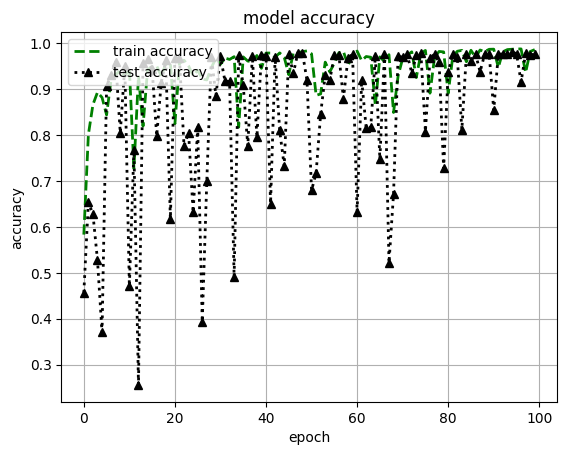

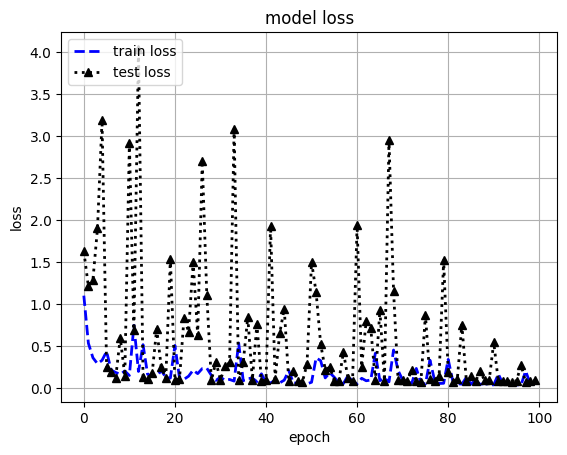

Test loss: 0.03653620928525925
Test accuracy: 0.9904335737228394


In [ ]:
print(confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1)))
print(classification_report(y3,pred))
plt.plot(history.history['accuracy'],'g--', linewidth=2, markersize=6)
plt.plot(history.history['val_accuracy'],'^k:', linewidth=2, markersize=6)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],'b--', linewidth=2, markersize=6)
plt.plot(history.history['val_loss'],'^k:', linewidth=2, markersize=6)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper left')
plt.grid()
plt.show()

score = model.evaluate(X3, y3,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
!pip install scipy
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
from scipy.interpolate import interp1d


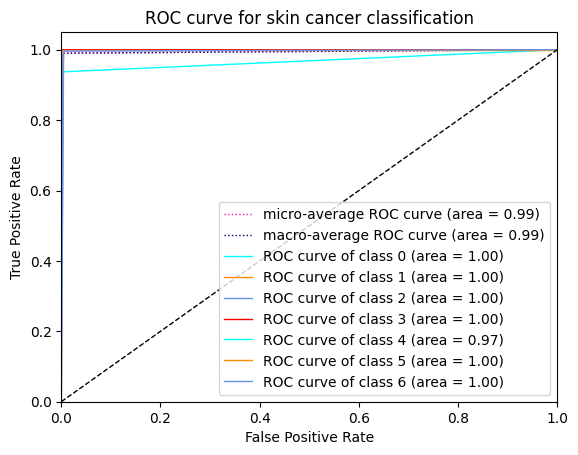

In [ ]:
x_test = X3
n_classes=7
lw=1
y_score =pred

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y3[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y3.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
  mean_tpr += interp1d(fpr[i], tpr[i])(all_fpr)

# ... (rest of the code)

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=1)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=1)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for skin cancer classification')
plt.legend(loc="lower right")
plt.show()

In [ ]:
###################### RMSprop optimizer   ###################3

In [ ]:
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

# Change optimizer to RMSprop
optimizer = RMSprop(lr=0.00125, epsilon=1e-8, rho=0.9)

# Compile the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_acc',
    patience=2,
    verbose=1,
    factor=0.5,
    min_lr=0.0001
)

### Just for sanity check
trainX1 = np.concatenate((trainX, trainX, trainX), axis=0)
ftrainX1 = np.concatenate((ftrainX, ftrainX, ftrainX), axis=0)
trainY1 = np.concatenate((trainY, trainY, trainY), axis=0)
X1 = [trainX1, ftrainX1]
y1 = trainY1
X2 = [validX, fvalidX]
y2 = validY
testX = np.concatenate((trainX, validX, testX), axis=0)
ftestX = np.concatenate((ftrainX, fvalidX, ftestX), axis=0)
testY = np.concatenate((trainY, validY, testY), axis=0)
X3 = [testX, ftestX]
y3 = testY

history = model.fit(X1, y1, batch_size=128, epochs=100, verbose=1, validation_data=(X2, y2), callbacks=[learning_rate_reduction])
pred = np.round(model.predict(X3), 0)


Epoch 1/100
704/705 [============================>.] - ETA: 0s - loss: 1.0850 - accuracy: 0.5860

705/705 [==============================] - 273s 384ms/step - loss: 1.0850 - accuracy: 0.5860 - val_loss: 4.9678 - val_accuracy: 0.2888 - lr: 0.0010
Epoch 2/100
704/705 [============================>.] - ETA: 0s - loss: 0.5443 - accuracy: 0.7986

705/705 [==============================] - 240s 340ms/step - loss: 0.5443 - accuracy: 0.7986 - val_loss: 1.7959 - val_accuracy: 0.5473 - lr: 0.0010
Epoch 3/100
704/705 [============================>.] - ETA: 0s - loss: 0.3753 - accuracy: 0.8611

705/705 [==============================] - 238s 338ms/step - loss: 0.3754 - accuracy: 0.8611 - val_loss: 1.0399 - val_accuracy: 0.6523 - lr: 0.0010
Epoch 4/100
704/705 [============================>.] - ETA: 0s - loss: 0.2941 - accuracy: 0.8931

705/705 [==============================] - 247s 350ms/step - loss: 0.2942 - accuracy: 0.8931 - val_loss: 1.3656 - val_accuracy: 0.5726 - lr: 0.0010
Epoch 5/100
704/705 [============================>.] - ETA: 0s - loss: 0.2437 - accuracy: 0.9129

705/705 [==============================] - 236s 335ms/step - loss: 0.2437 - accuracy: 0.9129 - val_loss: 0.5198 - val_accuracy: 0.8096 - lr: 0.0010
Epoch 6/100
704/705 [============================>.] - ETA: 0s - loss: 0.2129 - accuracy: 0.9226

705/705 [==============================] - 233s 330ms/step - loss: 0.2130 - accuracy: 0.9226 - val_loss: 0.4682 - val_accuracy: 0.8313 - lr: 0.0010
Epoch 7/100
704/705 [============================>.] - ETA: 0s - loss: 0.1948 - accuracy: 0.9301

705/705 [==============================] - 232s 330ms/step - loss: 0.1948 - accuracy: 0.9301 - val_loss: 0.5443 - val_accuracy: 0.8146 - lr: 0.0010
Epoch 8/100
704/705 [============================>.] - ETA: 0s - loss: 0.1801 - accuracy: 0.9363

705/705 [==============================] - 232s 330ms/step - loss: 0.1803 - accuracy: 0.9363 - val_loss: 0.7696 - val_accuracy: 0.7395 - lr: 0.0010
Epoch 9/100
704/705 [============================>.] - ETA: 0s - loss: 0.1647 - accuracy: 0.9417

705/705 [==============================] - 231s 328ms/step - loss: 0.1647 - accuracy: 0.9417 - val_loss: 0.1380 - val_accuracy: 0.9627 - lr: 0.0010
Epoch 10/100
704/705 [============================>.] - ETA: 0s - loss: 0.1526 - accuracy: 0.9471

705/705 [==============================] - 232s 328ms/step - loss: 0.1529 - accuracy: 0.9470 - val_loss: 0.2156 - val_accuracy: 0.9298 - lr: 0.0010
Epoch 11/100
704/705 [============================>.] - ETA: 0s - loss: 0.1405 - accuracy: 0.9509

705/705 [==============================] - 230s 327ms/step - loss: 0.1405 - accuracy: 0.9509 - val_loss: 0.3268 - val_accuracy: 0.8935 - lr: 0.0010
Epoch 12/100
704/705 [============================>.] - ETA: 0s - loss: 0.1359 - accuracy: 0.9531

705/705 [==============================] - 228s 323ms/step - loss: 0.1359 - accuracy: 0.9531 - val_loss: 0.1153 - val_accuracy: 0.9651 - lr: 0.0010
Epoch 13/100
704/705 [============================>.] - ETA: 0s - loss: 0.1281 - accuracy: 0.9559

705/705 [==============================] - 234s 332ms/step - loss: 0.1282 - accuracy: 0.9559 - val_loss: 2.2133 - val_accuracy: 0.6759 - lr: 0.0010
Epoch 14/100
704/705 [============================>.] - ETA: 0s - loss: 0.1261 - accuracy: 0.9572

705/705 [==============================] - 238s 337ms/step - loss: 0.1261 - accuracy: 0.9572 - val_loss: 0.4280 - val_accuracy: 0.8625 - lr: 0.0010
Epoch 15/100
704/705 [============================>.] - ETA: 0s - loss: 0.1227 - accuracy: 0.9575

705/705 [==============================] - 235s 333ms/step - loss: 0.1227 - accuracy: 0.9575 - val_loss: 0.3436 - val_accuracy: 0.8999 - lr: 0.0010
Epoch 16/100
704/705 [============================>.] - ETA: 0s - loss: 0.1155 - accuracy: 0.9604

705/705 [==============================] - 232s 329ms/step - loss: 0.1156 - accuracy: 0.9603 - val_loss: 0.6164 - val_accuracy: 0.8294 - lr: 0.0010
Epoch 17/100
704/705 [============================>.] - ETA: 0s - loss: 0.1098 - accuracy: 0.9631

705/705 [==============================] - 231s 327ms/step - loss: 0.1099 - accuracy: 0.9630 - val_loss: 0.4634 - val_accuracy: 0.8403 - lr: 0.0010
Epoch 18/100
704/705 [============================>.] - ETA: 0s - loss: 0.1092 - accuracy: 0.9634

705/705 [==============================] - 233s 330ms/step - loss: 0.1092 - accuracy: 0.9634 - val_loss: 0.2334 - val_accuracy: 0.9329 - lr: 0.0010
Epoch 19/100
704/705 [============================>.] - ETA: 0s - loss: 0.1035 - accuracy: 0.9651

705/705 [==============================] - 233s 330ms/step - loss: 0.1035 - accuracy: 0.9651 - val_loss: 0.3324 - val_accuracy: 0.8883 - lr: 0.0010
Epoch 20/100
704/705 [============================>.] - ETA: 0s - loss: 0.0992 - accuracy: 0.9659

705/705 [==============================] - 230s 326ms/step - loss: 0.0992 - accuracy: 0.9659 - val_loss: 0.1708 - val_accuracy: 0.9503 - lr: 0.0010
Epoch 21/100
704/705 [============================>.] - ETA: 0s - loss: 0.0967 - accuracy: 0.9673

705/705 [==============================] - 229s 325ms/step - loss: 0.0967 - accuracy: 0.9673 - val_loss: 0.2570 - val_accuracy: 0.9252 - lr: 0.0010
Epoch 22/100
704/705 [============================>.] - ETA: 0s - loss: 0.0958 - accuracy: 0.9679

705/705 [==============================] - 234s 332ms/step - loss: 0.0961 - accuracy: 0.9679 - val_loss: 0.2856 - val_accuracy: 0.9120 - lr: 0.0010
Epoch 23/100
704/705 [============================>.] - ETA: 0s - loss: 0.0964 - accuracy: 0.9678

705/705 [==============================] - 238s 337ms/step - loss: 0.0964 - accuracy: 0.9678 - val_loss: 0.0860 - val_accuracy: 0.9771 - lr: 0.0010
Epoch 24/100
704/705 [============================>.] - ETA: 0s - loss: 0.0871 - accuracy: 0.9711

705/705 [==============================] - 232s 329ms/step - loss: 0.0871 - accuracy: 0.9711 - val_loss: 0.1042 - val_accuracy: 0.9656 - lr: 0.0010
Epoch 25/100
704/705 [============================>.] - ETA: 0s - loss: 0.0899 - accuracy: 0.9703

705/705 [==============================] - 230s 326ms/step - loss: 0.0899 - accuracy: 0.9703 - val_loss: 0.4265 - val_accuracy: 0.8679 - lr: 0.0010
Epoch 26/100
704/705 [============================>.] - ETA: 0s - loss: 0.0850 - accuracy: 0.9726

705/705 [==============================] - 230s 326ms/step - loss: 0.0851 - accuracy: 0.9726 - val_loss: 0.1277 - val_accuracy: 0.9614 - lr: 0.0010
Epoch 27/100
704/705 [============================>.] - ETA: 0s - loss: 0.0841 - accuracy: 0.9723

705/705 [==============================] - 231s 327ms/step - loss: 0.0841 - accuracy: 0.9723 - val_loss: 0.3845 - val_accuracy: 0.8790 - lr: 0.0010
Epoch 28/100
704/705 [============================>.] - ETA: 0s - loss: 0.0890 - accuracy: 0.9716

705/705 [==============================] - 230s 326ms/step - loss: 0.0890 - accuracy: 0.9716 - val_loss: 0.3202 - val_accuracy: 0.8983 - lr: 0.0010
Epoch 29/100
704/705 [============================>.] - ETA: 0s - loss: 0.0852 - accuracy: 0.9724

705/705 [==============================] - 233s 330ms/step - loss: 0.0853 - accuracy: 0.9724 - val_loss: 0.2494 - val_accuracy: 0.9254 - lr: 0.0010
Epoch 30/100
704/705 [============================>.] - ETA: 0s - loss: 0.0844 - accuracy: 0.9724

705/705 [==============================] - 236s 334ms/step - loss: 0.0845 - accuracy: 0.9723 - val_loss: 0.1356 - val_accuracy: 0.9611 - lr: 0.0010
Epoch 31/100
704/705 [============================>.] - ETA: 0s - loss: 0.0815 - accuracy: 0.9736

705/705 [==============================] - 234s 332ms/step - loss: 0.0816 - accuracy: 0.9736 - val_loss: 0.1938 - val_accuracy: 0.9354 - lr: 0.0010
Epoch 32/100
704/705 [============================>.] - ETA: 0s - loss: 0.0782 - accuracy: 0.9747

705/705 [==============================] - 229s 325ms/step - loss: 0.0784 - accuracy: 0.9747 - val_loss: 0.2107 - val_accuracy: 0.9382 - lr: 0.0010
Epoch 33/100
704/705 [============================>.] - ETA: 0s - loss: 0.0761 - accuracy: 0.9752

705/705 [==============================] - 230s 326ms/step - loss: 0.0762 - accuracy: 0.9752 - val_loss: 0.4741 - val_accuracy: 0.8501 - lr: 0.0010
Epoch 34/100
704/705 [============================>.] - ETA: 0s - loss: 0.0746 - accuracy: 0.9758

705/705 [==============================] - 230s 326ms/step - loss: 0.0746 - accuracy: 0.9758 - val_loss: 1.1491 - val_accuracy: 0.7595 - lr: 0.0010
Epoch 35/100
704/705 [============================>.] - ETA: 0s - loss: 0.0808 - accuracy: 0.9752

705/705 [==============================] - 230s 327ms/step - loss: 0.0809 - accuracy: 0.9752 - val_loss: 0.1013 - val_accuracy: 0.9711 - lr: 0.0010
Epoch 36/100
704/705 [============================>.] - ETA: 0s - loss: 0.0753 - accuracy: 0.9759

705/705 [==============================] - 230s 326ms/step - loss: 0.0753 - accuracy: 0.9759 - val_loss: 0.4033 - val_accuracy: 0.9194 - lr: 0.0010
Epoch 37/100
704/705 [============================>.] - ETA: 0s - loss: 0.0734 - accuracy: 0.9766

705/705 [==============================] - 235s 333ms/step - loss: 0.0735 - accuracy: 0.9766 - val_loss: 0.1846 - val_accuracy: 0.9474 - lr: 0.0010
Epoch 38/100
704/705 [============================>.] - ETA: 0s - loss: 0.0736 - accuracy: 0.9768

705/705 [==============================] - 235s 334ms/step - loss: 0.0737 - accuracy: 0.9767 - val_loss: 0.2324 - val_accuracy: 0.9248 - lr: 0.0010
Epoch 39/100
704/705 [============================>.] - ETA: 0s - loss: 0.0723 - accuracy: 0.9770

705/705 [==============================] - 232s 330ms/step - loss: 0.0723 - accuracy: 0.9770 - val_loss: 0.2261 - val_accuracy: 0.9285 - lr: 0.0010
Epoch 40/100
704/705 [============================>.] - ETA: 0s - loss: 0.0694 - accuracy: 0.9774

705/705 [==============================] - 230s 327ms/step - loss: 0.0695 - accuracy: 0.9774 - val_loss: 0.1021 - val_accuracy: 0.9692 - lr: 0.0010
Epoch 41/100
704/705 [============================>.] - ETA: 0s - loss: 0.0694 - accuracy: 0.9773

705/705 [==============================] - 228s 323ms/step - loss: 0.0694 - accuracy: 0.9773 - val_loss: 0.1258 - val_accuracy: 0.9659 - lr: 0.0010
Epoch 42/100
704/705 [============================>.] - ETA: 0s - loss: 0.0679 - accuracy: 0.9784

705/705 [==============================] - 235s 334ms/step - loss: 0.0679 - accuracy: 0.9784 - val_loss: 0.0819 - val_accuracy: 0.9760 - lr: 0.0010
Epoch 43/100
704/705 [============================>.] - ETA: 0s - loss: 0.0654 - accuracy: 0.9788

705/705 [==============================] - 229s 325ms/step - loss: 0.0656 - accuracy: 0.9788 - val_loss: 0.1378 - val_accuracy: 0.9664 - lr: 0.0010
Epoch 44/100
704/705 [============================>.] - ETA: 0s - loss: 0.0667 - accuracy: 0.9790

705/705 [==============================] - 231s 328ms/step - loss: 0.0667 - accuracy: 0.9790 - val_loss: 0.1960 - val_accuracy: 0.9402 - lr: 0.0010
Epoch 45/100
704/705 [============================>.] - ETA: 0s - loss: 0.0630 - accuracy: 0.9795

705/705 [==============================] - 232s 329ms/step - loss: 0.0630 - accuracy: 0.9795 - val_loss: 0.1259 - val_accuracy: 0.9635 - lr: 0.0010
Epoch 46/100
704/705 [============================>.] - ETA: 0s - loss: 0.0661 - accuracy: 0.9793

705/705 [==============================] - 230s 326ms/step - loss: 0.0661 - accuracy: 0.9793 - val_loss: 0.2682 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 47/100
704/705 [============================>.] - ETA: 0s - loss: 0.0617 - accuracy: 0.9801

705/705 [==============================] - 229s 324ms/step - loss: 0.0617 - accuracy: 0.9801 - val_loss: 1.0164 - val_accuracy: 0.8254 - lr: 0.0010
Epoch 48/100
704/705 [============================>.] - ETA: 0s - loss: 0.0652 - accuracy: 0.9790

705/705 [==============================] - 231s 327ms/step - loss: 0.0652 - accuracy: 0.9790 - val_loss: 0.0695 - val_accuracy: 0.9802 - lr: 0.0010
Epoch 49/100
704/705 [============================>.] - ETA: 0s - loss: 0.0585 - accuracy: 0.9808

705/705 [==============================] - 232s 329ms/step - loss: 0.0585 - accuracy: 0.9808 - val_loss: 0.0800 - val_accuracy: 0.9762 - lr: 0.0010
Epoch 50/100
704/705 [============================>.] - ETA: 0s - loss: 0.0613 - accuracy: 0.9808

705/705 [==============================] - 229s 325ms/step - loss: 0.0613 - accuracy: 0.9808 - val_loss: 0.0644 - val_accuracy: 0.9832 - lr: 0.0010
Epoch 51/100
704/705 [============================>.] - ETA: 0s - loss: 0.0621 - accuracy: 0.9808

705/705 [==============================] - 231s 328ms/step - loss: 0.0624 - accuracy: 0.9808 - val_loss: 0.1945 - val_accuracy: 0.9507 - lr: 0.0010
Epoch 52/100
704/705 [============================>.] - ETA: 0s - loss: 0.0586 - accuracy: 0.9814

705/705 [==============================] - 240s 340ms/step - loss: 0.0587 - accuracy: 0.9814 - val_loss: 0.2057 - val_accuracy: 0.9399 - lr: 0.0010
Epoch 53/100
704/705 [============================>.] - ETA: 0s - loss: 0.0609 - accuracy: 0.9808

705/705 [==============================] - 237s 336ms/step - loss: 0.0610 - accuracy: 0.9808 - val_loss: 0.1892 - val_accuracy: 0.9443 - lr: 0.0010
Epoch 54/100
704/705 [============================>.] - ETA: 0s - loss: 0.0601 - accuracy: 0.9812

705/705 [==============================] - 238s 338ms/step - loss: 0.0601 - accuracy: 0.9812 - val_loss: 0.0803 - val_accuracy: 0.9775 - lr: 0.0010
Epoch 55/100
704/705 [============================>.] - ETA: 0s - loss: 0.0599 - accuracy: 0.9809

705/705 [==============================] - 236s 335ms/step - loss: 0.0599 - accuracy: 0.9809 - val_loss: 0.2003 - val_accuracy: 0.9422 - lr: 0.0010
Epoch 56/100
704/705 [============================>.] - ETA: 0s - loss: 0.0607 - accuracy: 0.9812

705/705 [==============================] - 240s 341ms/step - loss: 0.0607 - accuracy: 0.9812 - val_loss: 0.1008 - val_accuracy: 0.9696 - lr: 0.0010
Epoch 57/100
704/705 [============================>.] - ETA: 0s - loss: 0.0577 - accuracy: 0.9819

705/705 [==============================] - 237s 337ms/step - loss: 0.0579 - accuracy: 0.9819 - val_loss: 0.0726 - val_accuracy: 0.9803 - lr: 0.0010
Epoch 58/100
704/705 [============================>.] - ETA: 0s - loss: 0.0556 - accuracy: 0.9825

705/705 [==============================] - 235s 334ms/step - loss: 0.0558 - accuracy: 0.9825 - val_loss: 0.0994 - val_accuracy: 0.9724 - lr: 0.0010
Epoch 59/100
704/705 [============================>.] - ETA: 0s - loss: 0.0564 - accuracy: 0.9821

705/705 [==============================] - 245s 348ms/step - loss: 0.0564 - accuracy: 0.9821 - val_loss: 0.0830 - val_accuracy: 0.9754 - lr: 0.0010
Epoch 60/100
704/705 [============================>.] - ETA: 0s - loss: 0.0569 - accuracy: 0.9820

705/705 [==============================] - 239s 339ms/step - loss: 0.0572 - accuracy: 0.9820 - val_loss: 0.1092 - val_accuracy: 0.9668 - lr: 0.0010
Epoch 61/100
704/705 [============================>.] - ETA: 0s - loss: 0.0573 - accuracy: 0.9821

705/705 [==============================] - 237s 336ms/step - loss: 0.0573 - accuracy: 0.9821 - val_loss: 0.1156 - val_accuracy: 0.9706 - lr: 0.0010
Epoch 62/100
704/705 [============================>.] - ETA: 0s - loss: 0.0569 - accuracy: 0.9818

705/705 [==============================] - 231s 328ms/step - loss: 0.0570 - accuracy: 0.9818 - val_loss: 0.1090 - val_accuracy: 0.9670 - lr: 0.0010
Epoch 63/100
704/705 [============================>.] - ETA: 0s - loss: 0.0553 - accuracy: 0.9830

705/705 [==============================] - 230s 326ms/step - loss: 0.0553 - accuracy: 0.9829 - val_loss: 0.1836 - val_accuracy: 0.9422 - lr: 0.0010
Epoch 64/100
704/705 [============================>.] - ETA: 0s - loss: 0.0532 - accuracy: 0.9831

705/705 [==============================] - 231s 328ms/step - loss: 0.0532 - accuracy: 0.9831 - val_loss: 0.0997 - val_accuracy: 0.9711 - lr: 0.0010
Epoch 65/100
704/705 [============================>.] - ETA: 0s - loss: 0.0518 - accuracy: 0.9833

705/705 [==============================] - 229s 325ms/step - loss: 0.0521 - accuracy: 0.9833 - val_loss: 0.2929 - val_accuracy: 0.9241 - lr: 0.0010
Epoch 66/100
704/705 [============================>.] - ETA: 0s - loss: 0.0549 - accuracy: 0.9836

705/705 [==============================] - 234s 332ms/step - loss: 0.0549 - accuracy: 0.9836 - val_loss: 0.0833 - val_accuracy: 0.9758 - lr: 0.0010
Epoch 67/100
704/705 [============================>.] - ETA: 0s - loss: 0.0531 - accuracy: 0.9835

705/705 [==============================] - 230s 327ms/step - loss: 0.0532 - accuracy: 0.9835 - val_loss: 0.3319 - val_accuracy: 0.8979 - lr: 0.0010
Epoch 68/100
704/705 [============================>.] - ETA: 0s - loss: 0.0547 - accuracy: 0.9831

705/705 [==============================] - 235s 333ms/step - loss: 0.0550 - accuracy: 0.9831 - val_loss: 0.2063 - val_accuracy: 0.9366 - lr: 0.0010
Epoch 69/100
704/705 [============================>.] - ETA: 0s - loss: 0.0549 - accuracy: 0.9831

705/705 [==============================] - 230s 326ms/step - loss: 0.0549 - accuracy: 0.9831 - val_loss: 0.1218 - val_accuracy: 0.9614 - lr: 0.0010
Epoch 70/100
704/705 [============================>.] - ETA: 0s - loss: 0.0551 - accuracy: 0.9835

705/705 [==============================] - 230s 326ms/step - loss: 0.0552 - accuracy: 0.9835 - val_loss: 0.0956 - val_accuracy: 0.9722 - lr: 0.0010
Epoch 71/100
704/705 [============================>.] - ETA: 0s - loss: 0.0522 - accuracy: 0.9843

705/705 [==============================] - 233s 330ms/step - loss: 0.0523 - accuracy: 0.9842 - val_loss: 0.1119 - val_accuracy: 0.9667 - lr: 0.0010
Epoch 72/100
704/705 [============================>.] - ETA: 0s - loss: 0.0512 - accuracy: 0.9842

705/705 [==============================] - 234s 331ms/step - loss: 0.0512 - accuracy: 0.9842 - val_loss: 0.0877 - val_accuracy: 0.9720 - lr: 0.0010
Epoch 73/100
704/705 [============================>.] - ETA: 0s - loss: 0.0514 - accuracy: 0.9846

705/705 [==============================] - 232s 328ms/step - loss: 0.0514 - accuracy: 0.9846 - val_loss: 0.0833 - val_accuracy: 0.9740 - lr: 0.0010
Epoch 74/100
704/705 [============================>.] - ETA: 0s - loss: 0.0498 - accuracy: 0.9846

705/705 [==============================] - 232s 329ms/step - loss: 0.0499 - accuracy: 0.9845 - val_loss: 0.0950 - val_accuracy: 0.9706 - lr: 0.0010
Epoch 75/100
704/705 [============================>.] - ETA: 0s - loss: 0.0491 - accuracy: 0.9849

705/705 [==============================] - 233s 331ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.1128 - val_accuracy: 0.9662 - lr: 0.0010
Epoch 76/100
704/705 [============================>.] - ETA: 0s - loss: 0.0512 - accuracy: 0.9840

705/705 [==============================] - 236s 335ms/step - loss: 0.0512 - accuracy: 0.9840 - val_loss: 0.2414 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 77/100
704/705 [============================>.] - ETA: 0s - loss: 0.0487 - accuracy: 0.9853

705/705 [==============================] - 232s 329ms/step - loss: 0.0487 - accuracy: 0.9853 - val_loss: 0.0780 - val_accuracy: 0.9784 - lr: 0.0010
Epoch 78/100
704/705 [============================>.] - ETA: 0s - loss: 0.0522 - accuracy: 0.9841

705/705 [==============================] - 231s 327ms/step - loss: 0.0522 - accuracy: 0.9841 - val_loss: 0.0904 - val_accuracy: 0.9720 - lr: 0.0010
Epoch 79/100
704/705 [============================>.] - ETA: 0s - loss: 0.0494 - accuracy: 0.9850

705/705 [==============================] - 228s 323ms/step - loss: 0.0494 - accuracy: 0.9850 - val_loss: 0.0684 - val_accuracy: 0.9828 - lr: 0.0010
Epoch 80/100
704/705 [============================>.] - ETA: 0s - loss: 0.0510 - accuracy: 0.9845

705/705 [==============================] - 233s 330ms/step - loss: 0.0510 - accuracy: 0.9845 - val_loss: 0.0943 - val_accuracy: 0.9743 - lr: 0.0010
Epoch 81/100
704/705 [============================>.] - ETA: 0s - loss: 0.0504 - accuracy: 0.9853

705/705 [==============================] - 228s 324ms/step - loss: 0.0504 - accuracy: 0.9853 - val_loss: 0.0935 - val_accuracy: 0.9710 - lr: 0.0010
Epoch 82/100
704/705 [============================>.] - ETA: 0s - loss: 0.0467 - accuracy: 0.9856

705/705 [==============================] - 231s 327ms/step - loss: 0.0468 - accuracy: 0.9856 - val_loss: 0.0805 - val_accuracy: 0.9771 - lr: 0.0010
Epoch 83/100
704/705 [============================>.] - ETA: 0s - loss: 0.0461 - accuracy: 0.9856

705/705 [==============================] - 240s 340ms/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.0745 - val_accuracy: 0.9794 - lr: 0.0010
Epoch 84/100
704/705 [============================>.] - ETA: 0s - loss: 0.0481 - accuracy: 0.9853

705/705 [==============================] - 230s 326ms/step - loss: 0.0481 - accuracy: 0.9853 - val_loss: 0.0869 - val_accuracy: 0.9740 - lr: 0.0010
Epoch 85/100
704/705 [============================>.] - ETA: 0s - loss: 0.0469 - accuracy: 0.9856

705/705 [==============================] - 232s 329ms/step - loss: 0.0470 - accuracy: 0.9856 - val_loss: 0.0839 - val_accuracy: 0.9752 - lr: 0.0010
Epoch 86/100
704/705 [============================>.] - ETA: 0s - loss: 0.0471 - accuracy: 0.9858

705/705 [==============================] - 230s 326ms/step - loss: 0.0471 - accuracy: 0.9858 - val_loss: 0.0924 - val_accuracy: 0.9734 - lr: 0.0010
Epoch 87/100
704/705 [============================>.] - ETA: 0s - loss: 0.0487 - accuracy: 0.9854

705/705 [==============================] - 230s 327ms/step - loss: 0.0491 - accuracy: 0.9854 - val_loss: 0.0868 - val_accuracy: 0.9755 - lr: 0.0010
Epoch 88/100
704/705 [============================>.] - ETA: 0s - loss: 0.0504 - accuracy: 0.9852

705/705 [==============================] - 231s 328ms/step - loss: 0.0505 - accuracy: 0.9852 - val_loss: 0.1078 - val_accuracy: 0.9720 - lr: 0.0010
Epoch 89/100
704/705 [============================>.] - ETA: 0s - loss: 0.0494 - accuracy: 0.9851

705/705 [==============================] - 230s 326ms/step - loss: 0.0494 - accuracy: 0.9851 - val_loss: 0.0819 - val_accuracy: 0.9740 - lr: 0.0010
Epoch 90/100
704/705 [============================>.] - ETA: 0s - loss: 0.0468 - accuracy: 0.9856

705/705 [==============================] - 235s 333ms/step - loss: 0.0469 - accuracy: 0.9855 - val_loss: 0.0865 - val_accuracy: 0.9763 - lr: 0.0010
Epoch 91/100
704/705 [============================>.] - ETA: 0s - loss: 0.0476 - accuracy: 0.9857

705/705 [==============================] - 234s 332ms/step - loss: 0.0476 - accuracy: 0.9857 - val_loss: 0.0693 - val_accuracy: 0.9792 - lr: 0.0010
Epoch 92/100
704/705 [============================>.] - ETA: 0s - loss: 0.0445 - accuracy: 0.9861

705/705 [==============================] - 234s 332ms/step - loss: 0.0446 - accuracy: 0.9861 - val_loss: 0.0901 - val_accuracy: 0.9736 - lr: 0.0010
Epoch 93/100
704/705 [============================>.] - ETA: 0s - loss: 0.0457 - accuracy: 0.9863

705/705 [==============================] - 234s 332ms/step - loss: 0.0457 - accuracy: 0.9863 - val_loss: 0.0632 - val_accuracy: 0.9835 - lr: 0.0010
Epoch 94/100
704/705 [============================>.] - ETA: 0s - loss: 0.0455 - accuracy: 0.9861

705/705 [==============================] - 234s 332ms/step - loss: 0.0455 - accuracy: 0.9861 - val_loss: 0.0875 - val_accuracy: 0.9786 - lr: 0.0010
Epoch 95/100
704/705 [============================>.] - ETA: 0s - loss: 0.0468 - accuracy: 0.9858

705/705 [==============================] - 235s 333ms/step - loss: 0.0468 - accuracy: 0.9858 - val_loss: 0.0735 - val_accuracy: 0.9791 - lr: 0.0010
Epoch 96/100
704/705 [============================>.] - ETA: 0s - loss: 0.0440 - accuracy: 0.9870

705/705 [==============================] - 234s 332ms/step - loss: 0.0440 - accuracy: 0.9870 - val_loss: 0.1499 - val_accuracy: 0.9585 - lr: 0.0010
Epoch 97/100
704/705 [============================>.] - ETA: 0s - loss: 0.0430 - accuracy: 0.9867

705/705 [==============================] - 234s 332ms/step - loss: 0.0431 - accuracy: 0.9867 - val_loss: 0.0723 - val_accuracy: 0.9780 - lr: 0.0010
Epoch 98/100
704/705 [============================>.] - ETA: 0s - loss: 0.0463 - accuracy: 0.9857

705/705 [==============================] - 236s 335ms/step - loss: 0.0463 - accuracy: 0.9857 - val_loss: 0.0784 - val_accuracy: 0.9768 - lr: 0.0010
Epoch 99/100
704/705 [============================>.] - ETA: 0s - loss: 0.0446 - accuracy: 0.9867

705/705 [==============================] - 241s 342ms/step - loss: 0.0449 - accuracy: 0.9867 - val_loss: 0.0874 - val_accuracy: 0.9751 - lr: 0.0010
Epoch 100/100
704/705 [============================>.] - ETA: 0s - loss: 0.0456 - accuracy: 0.9863

1467/1467 [==============================] - 32s 22ms/step


In [ ]:
import pandas as pd

# Assuming 'history' contains the training history
# history = model.fit(...)

# Create a DataFrame from the training history
history_df = pd.DataFrame(history.history)

# Display the DataFrame
print(history_df)

# Extract validation accuracy, validation loss, and loss from the DataFrame
validation_accuracy = history_df['val_accuracy'].max()
validation_loss = history_df['val_loss'].min()
final_loss = history_df['loss'].iloc[-1]

# Display the results
print(f"\nValidation Accuracy: {validation_accuracy:.4f}")
print(f"Validation Loss: {validation_loss:.4f}")
print(f"Final Loss: {final_loss:.4f}")


        loss  accuracy  val_loss  val_accuracy     lr
0   1.085023  0.586035  4.967814      0.288815  0.001
1   0.544307  0.798622  1.795892      0.547270  0.001
2   0.375415  0.861109  1.039902      0.652330  0.001
3   0.294246  0.893058  1.365562      0.572570  0.001
4   0.243698  0.912888  0.519812      0.809587  0.001
..       ...       ...       ...           ...    ...
95  0.044008  0.986961  0.149873      0.958455  0.001
96  0.043062  0.986650  0.072263      0.978029  0.001
97  0.046344  0.985674  0.078363      0.976831  0.001
98  0.044886  0.986695  0.087373      0.975100  0.001
99  0.045647  0.986295  0.074870      0.981758  0.001

[100 rows x 5 columns]

Validation Accuracy: 0.9835
Validation Loss: 0.0632
Final Loss: 0.0456


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming `model` is already defined and trained using the provided code

# Assuming X3 and y3 are your test set
# X3 = [testX, ftestX]
# y3 = testY

# Predict on the test set
pred = np.round(model.predict(X3), 0)

# Get the confusion matrix
conf_mat = confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1))

print("Confusion Matrix:")
print(conf_mat)


1467/1467 [==============================] - 29s 20ms/step
Confusion Matrix:
[[6705    0    0    0    0    0    0]
 [   0 6705    0    0    0    0    0]
 [   3    3 6695    0    4    0    0]
 [   0    0    0 6705    0    0    0]
 [  40   14  109    8 6398    1  135]
 [   0    0    0    0    0 6705    0]
 [   6    0   11    4    8    0 6676]]


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming `model` is already defined and trained using the provided code

# Assuming X3 and y3 are your test set
# X3 = [testX, ftestX]
# y3 = testY

# Predict on the test set
pred = np.round(model.predict(X3), 0)

# Get the confusion matrix
conf_mat = confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1))

# Extract TP, TN, FP, FN
TP = conf_mat[1, 1]  # True Positive
TN = conf_mat[0, 0]  # True Negative
FP = conf_mat[0, 1]  # False Positive
FN = conf_mat[1, 0]  # False Negative

# Display the results
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)


1467/1467 [==============================] - 30s 20ms/step
True Positive (TP): 6705
True Negative (TN): 6705
False Positive (FP): 0
False Negative (FN): 0


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

[[6705    0    0    0    0    0    0]
 [   0 6705    0    0    0    0    0]
 [   3    3 6695    0    4    0    0]
 [   0    0    0 6705    0    0    0]
 [  40   14  109    8 6398    1  135]
 [   0    0    0    0    0 6705    0]
 [   6    0   11    4    8    0 6676]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6705
           1       1.00      1.00      1.00      6705
           2       0.98      1.00      0.99      6705
           3       1.00      1.00      1.00      6705
           4       1.00      0.95      0.98      6705
           5       1.00      1.00      1.00      6705
           6       0.98      1.00      0.99      6705

   micro avg       0.99      0.99      0.99     46935
   macro avg       0.99      0.99      0.99     46935
weighted avg       0.99      0.99      0.99     46935
 samples avg       0.99      0.99      0.99     46935



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


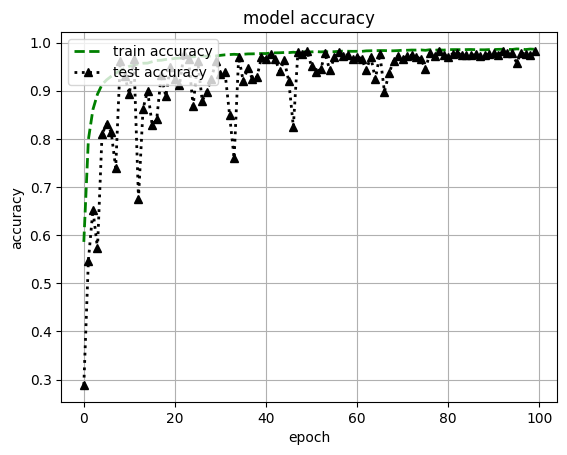

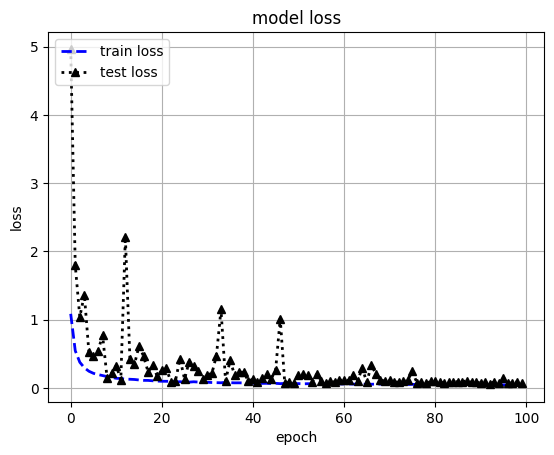

Test loss: 0.029675142839550972
Test accuracy: 0.9928624629974365


In [ ]:
print(confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1)))
print(classification_report(y3,pred))
plt.plot(history.history['accuracy'],'g--', linewidth=2, markersize=6)
plt.plot(history.history['val_accuracy'],'^k:', linewidth=2, markersize=6)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],'b--', linewidth=2, markersize=6)
plt.plot(history.history['val_loss'],'^k:', linewidth=2, markersize=6)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper left')
plt.grid()
plt.show()

score = model.evaluate(X3, y3,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

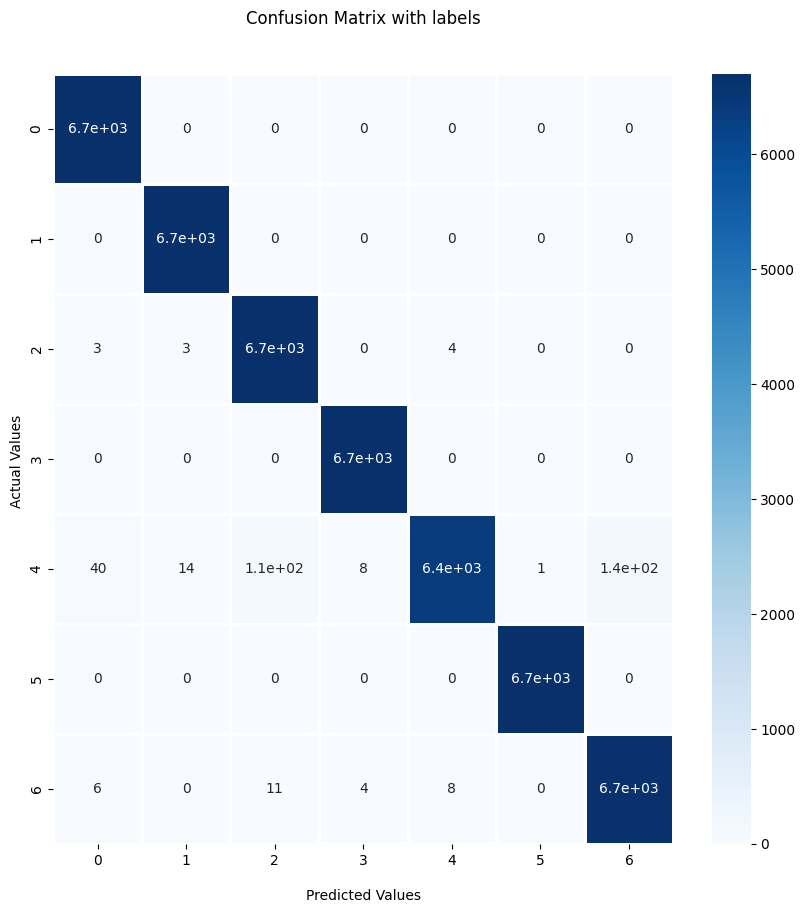

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))


ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

In [ ]:
!pip install scipy
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
from scipy.interpolate import interp1d


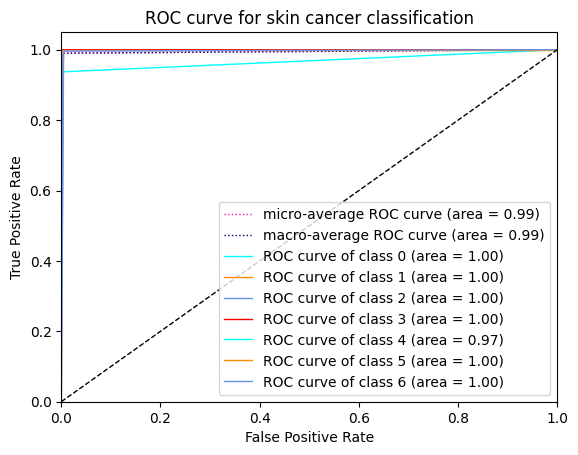

In [ ]:
x_test = X3
n_classes=7
lw=1
y_score =pred

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y3[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y3.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
  mean_tpr += interp1d(fpr[i], tpr[i])(all_fpr)

# ... (rest of the code)

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=1)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=1)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for skin cancer classification')
plt.legend(loc="lower right")
plt.show()

In [ ]:
########################3 ADAGRAD OPTIMIZER #############################3

In [ ]:
from keras.optimizers import Adagrad
from keras.callbacks import ReduceLROnPlateau

# Change optimizer to Adagrad
optimizer = Adagrad(learning_rate=0.00125, epsilon=1e-8)

# Compile the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_acc',
    patience=2,
    verbose=1,
    factor=0.5,
    min_lr=0.0001
)

### Just for sanity check
trainX1 = np.concatenate((trainX, trainX, trainX), axis=0)
ftrainX1 = np.concatenate((ftrainX, ftrainX, ftrainX), axis=0)
trainY1 = np.concatenate((trainY, trainY, trainY), axis=0)
X1 = [trainX1, ftrainX1]
y1 = trainY1
X2 = [validX, fvalidX]
y2 = validY
testX = np.concatenate((trainX, validX, testX), axis=0)
ftestX = np.concatenate((ftrainX, fvalidX, ftestX), axis=0)
testY = np.concatenate((trainY, validY, testY), axis=0)
X3 = [testX, ftestX]
y3 = testY

history = model.fit(X1, y1, batch_size=128, epochs=100, verbose=1, validation_data=(X2, y2), callbacks=[learning_rate_reduction])
pred = np.round(model.predict(X3), 0)


Epoch 1/100
705/705 [==============================] - 313s 387ms/step - loss: 2.0660 - accuracy: 0.2370 - val_loss: 2.2858 - val_accuracy: 0.1786 - lr: 0.0012
Epoch 2/100
705/705 [==============================] - 285s 405ms/step - loss: 1.6781 - accuracy: 0.3583 - val_loss: 2.0958 - val_accuracy: 0.3237 - lr: 0.0012
Epoch 3/100
705/705 [==============================] - 284s 402ms/step - loss: 1.4507 - accuracy: 0.4438 - val_loss: 1.3752 - val_accuracy: 0.4807 - lr: 0.0012
Epoch 4/100
705/705 [==============================] - 284s 403ms/step - loss: 1.3072 - accuracy: 0.4985 - val_loss: 1.2132 - val_accuracy: 0.5497 - lr: 0.0012
Epoch 5/100
705/705 [==============================] - 283s 402ms/step - loss: 1.2121 - accuracy: 0.5359 - val_loss: 1.1230 - val_accuracy: 0.5698 - lr: 0.0012
Epoch 6/100
705/705 [==============================] - 267s 378ms/step - loss: 1.1372 - accuracy: 0.5669 - val_loss: 1.0323 - val_accuracy: 0.6099 - lr: 0.0012
Epoch 7/100
705/705 [===================

In [ ]:
import pandas as pd

# Assuming 'history' contains the training history
# history = model.fit(...)

# Create a DataFrame from the training history
history_df = pd.DataFrame(history.history)

# Display the DataFrame
print(history_df)

# Extract validation accuracy, validation loss, and loss from the DataFrame
validation_accuracy = history_df['val_accuracy'].max()
validation_loss = history_df['val_loss'].min()
final_loss = history_df['loss'].iloc[-1]

# Display the results
print(f"\nValidation Accuracy: {validation_accuracy:.4f}")
print(f"Validation Loss: {validation_loss:.4f}")
print(f"Final Loss: {final_loss:.4f}")


        loss  accuracy  val_loss  val_accuracy       lr
0   2.066023  0.237022  2.285756      0.178562  0.00125
1   1.678079  0.358335  2.095781      0.323702  0.00125
2   1.450689  0.443805  1.375164      0.480692  0.00125
3   1.307218  0.498546  1.213191      0.549667  0.00125
4   1.212117  0.535921  1.123043      0.569774  0.00125
..       ...       ...       ...           ...      ...
95  0.262142  0.906252  0.212749      0.922503  0.00125
96  0.261527  0.907184  0.192680      0.931292  0.00125
97  0.257549  0.908305  0.186011      0.935286  0.00125
98  0.258557  0.907972  0.193267      0.934221  0.00125
99  0.257836  0.907539  0.191082      0.934088  0.00125

[100 rows x 5 columns]

Validation Accuracy: 0.9353
Validation Loss: 0.1860
Final Loss: 0.2578


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming `model` is already defined and trained using the provided code

# Assuming X3 and y3 are your test set
# X3 = [testX, ftestX]
# y3 = testY

# Predict on the test set
pred = np.round(model.predict(X3), 0)

# Get the confusion matrix
conf_mat = confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1))

print("Confusion Matrix:")
print(conf_mat)


1467/1467 [==============================] - 14s 9ms/step
Confusion Matrix:
[[6705    0    0    0    0    0    0]
 [  44 6649    7    5    0    0    0]
 [ 229   27 6373    2    9    3   62]
 [   0    0    0 6705    0    0    0]
 [ 723   53  836   23 4333    4  733]
 [   0    0    0    0    0 6705    0]
 [ 253    0  196    6   68    0 6182]]


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming `model` is already defined and trained using the provided code

# Assuming X3 and y3 are your test set
# X3 = [testX, ftestX]
# y3 = testY

# Predict on the test set
pred = np.round(model.predict(X3), 0)

# Get the confusion matrix
conf_mat = confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1))

# Extract TP, TN, FP, FN
TP = conf_mat[1, 1]  # True Positive
TN = conf_mat[0, 0]  # True Negative
FP = conf_mat[0, 1]  # False Positive
FN = conf_mat[1, 0]  # False Negative

# Display the results
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)


1467/1467 [==============================] - 25s 9ms/step
True Positive (TP): 6649
True Negative (TN): 6705
False Positive (FP): 0
False Negative (FN): 44


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

[[6705    0    0    0    0    0    0]
 [  44 6649    7    5    0    0    0]
 [ 229   27 6373    2    9    3   62]
 [   0    0    0 6705    0    0    0]
 [ 723   53  836   23 4333    4  733]
 [   0    0    0    0    0 6705    0]
 [ 253    0  196    6   68    0 6182]]


c:\Users\beeram yogesh kumar\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6705
           1       0.99      0.99      0.99      6705
           2       0.86      0.95      0.90      6705
           3       0.99      1.00      1.00      6705
           4       0.98      0.65      0.78      6705
           5       1.00      1.00      1.00      6705
           6       0.89      0.92      0.90      6705

   micro avg       0.95      0.93      0.94     46935
   macro avg       0.96      0.93      0.94     46935
weighted avg       0.96      0.93      0.94     46935
 samples avg       0.93      0.93      0.93     46935



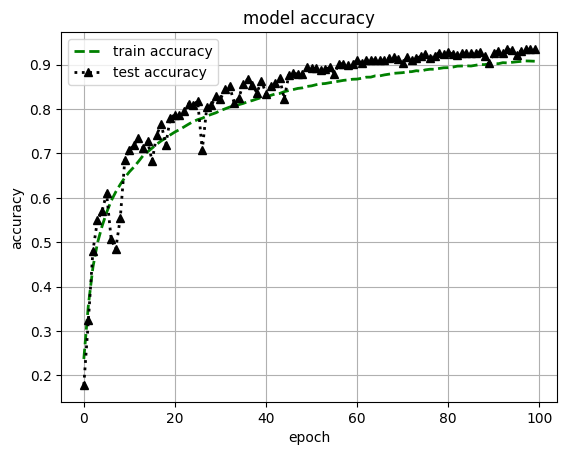

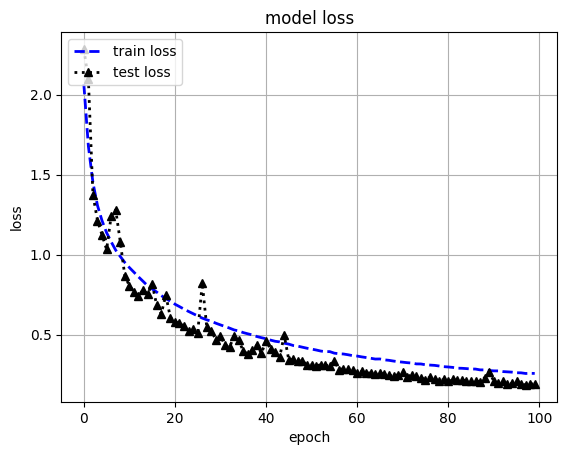

Test loss: 0.16902172565460205
Test accuracy: 0.9405561089515686


In [ ]:
print(confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1)))
print(classification_report(y3,pred))
plt.plot(history.history['accuracy'],'g--', linewidth=2, markersize=6)
plt.plot(history.history['val_accuracy'],'^k:', linewidth=2, markersize=6)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],'b--', linewidth=2, markersize=6)
plt.plot(history.history['val_loss'],'^k:', linewidth=2, markersize=6)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper left')
plt.grid()
plt.show()

score = model.evaluate(X3, y3,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
!pip install scipy
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
from scipy.interpolate import interp1d


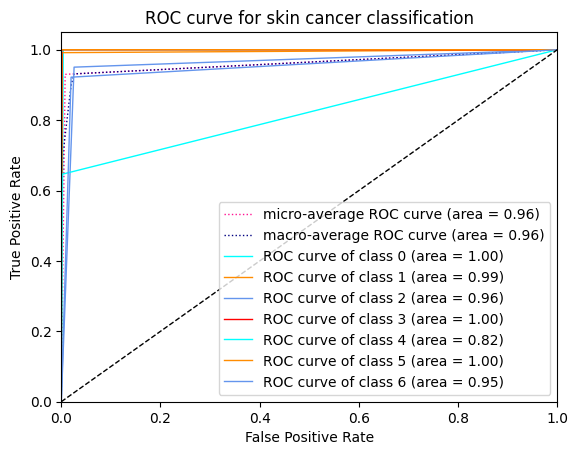

In [ ]:
x_test = X3
n_classes=7
lw=1
y_score =pred

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y3[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y3.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
  mean_tpr += interp1d(fpr[i], tpr[i])(all_fpr)

# ... (rest of the code)

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=1)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=1)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for skin cancer classification')
plt.legend(loc="lower right")
plt.show()

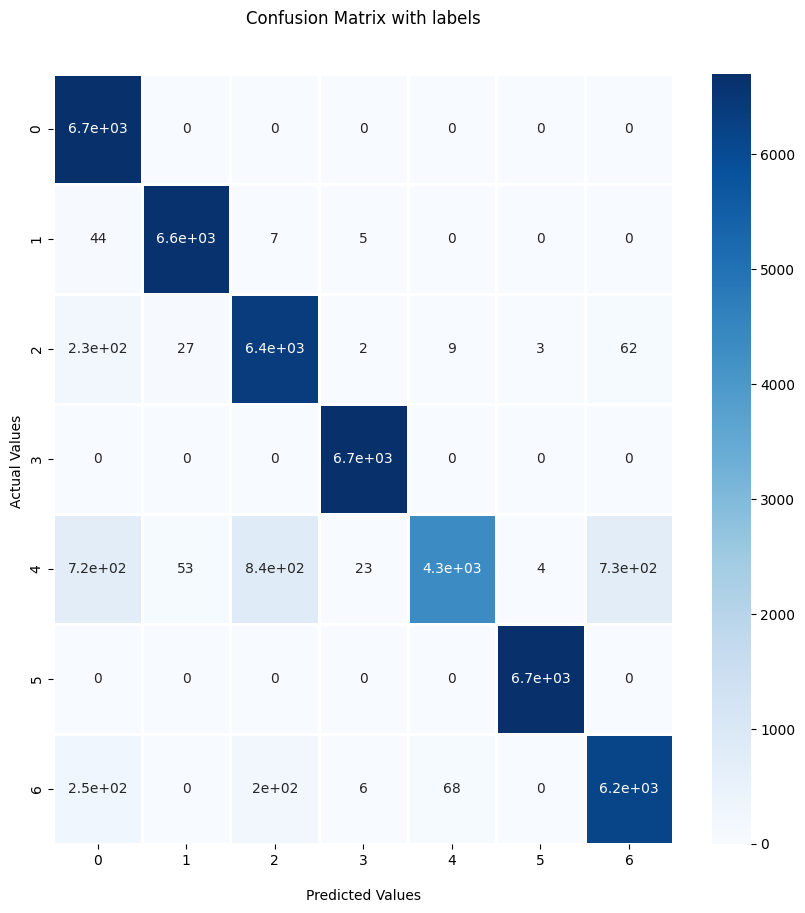

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))


ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

In [ ]:
import numpy as np

def calculate_metrics(conf_matrix):
    metrics = []

    for i in range(conf_matrix.shape[0]):
        true_positive = conf_matrix[i, i]
        false_positive = np.sum(conf_matrix[:, i]) - true_positive
        false_negative = np.sum(conf_matrix[i, :]) - true_positive
        true_negative = np.sum(conf_matrix) - true_positive - false_positive - false_negative

        metrics.append({
            'class': i,
            'true_positive': true_positive,
            'true_negative': true_negative,
            'false_positive': false_positive,
            'false_negative': false_negative
        })

    return metrics

# Example usage:
# Replace `your_conf_matrix` with your actual confusion matrix of size 7x7
your_conf_matrix = confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1))

metrics = calculate_metrics(your_conf_matrix)

# Print the metrics for each class
for metric in metrics:
    print(f"Class {metric['class']}:")
    print(f"True Positive: {metric['true_positive']}")
    print(f"True Negative: {metric['true_negative']}")
    print(f"False Positive: {metric['false_positive']}")
    print(f"False Negative: {metric['false_negative']}\n")


Class 0:
True Positive: 6705
True Negative: 38981
False Positive: 1249
False Negative: 0

Class 1:
True Positive: 6649
True Negative: 40150
False Positive: 80
False Negative: 56

Class 2:
True Positive: 6373
True Negative: 39191
False Positive: 1039
False Negative: 332

Class 3:
True Positive: 6705
True Negative: 40194
False Positive: 36
False Negative: 0

Class 4:
True Positive: 4333
True Negative: 40153
False Positive: 77
False Negative: 2372

Class 5:
True Positive: 6705
True Negative: 40223
False Positive: 7
False Negative: 0

Class 6:
True Positive: 6182
True Negative: 39435
False Positive: 795
False Negative: 523



In [ ]:
##########################   ADAMAX optimizer     ###########################

In [ ]:
from keras.optimizers import Adamax
from keras.callbacks import ReduceLROnPlateau

# Change optimizer to Adamax
optimizer = Adamax(lr=0.00125, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

# Compile the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_acc',
    patience=2,
    verbose=1,
    factor=0.5,
    min_lr=0.0001
)

### Just for sanity check
trainX1 = np.concatenate((trainX, trainX, trainX), axis=0)
ftrainX1 = np.concatenate((ftrainX, ftrainX, ftrainX), axis=0)
trainY1 = np.concatenate((trainY, trainY, trainY), axis=0)
X1 = [trainX1, ftrainX1]
y1 = trainY1
X2 = [validX, fvalidX]
y2 = validY
testX = np.concatenate((trainX, validX, testX), axis=0)
ftestX = np.concatenate((ftrainX, fvalidX, ftestX), axis=0)
testY = np.concatenate((trainY, validY, testY), axis=0)
X3 = [testX, ftestX]
y3 = testY

history = model.fit(X1, y1, batch_size=128, epochs=100, verbose=1, validation_data=(X2, y2), callbacks=[learning_rate_reduction])
pred = np.round(model.predict(X3), 0)


Epoch 1/100
704/705 [============================>.] - ETA: 0s - loss: 1.2827 - accuracy: 0.5080

705/705 [==============================] - 202s 284ms/step - loss: 1.2827 - accuracy: 0.5080 - val_loss: 0.8716 - val_accuracy: 0.6905 - lr: 0.0010
Epoch 2/100
704/705 [============================>.] - ETA: 0s - loss: 0.6991 - accuracy: 0.7386

705/705 [==============================] - 198s 281ms/step - loss: 0.6991 - accuracy: 0.7386 - val_loss: 0.5214 - val_accuracy: 0.8051 - lr: 0.0010
Epoch 3/100
704/705 [============================>.] - ETA: 0s - loss: 0.4873 - accuracy: 0.8187

705/705 [==============================] - 195s 277ms/step - loss: 0.4874 - accuracy: 0.8187 - val_loss: 0.3176 - val_accuracy: 0.8883 - lr: 0.0010
Epoch 4/100
704/705 [============================>.] - ETA: 0s - loss: 0.3654 - accuracy: 0.8647

705/705 [==============================] - 196s 279ms/step - loss: 0.3654 - accuracy: 0.8647 - val_loss: 0.2277 - val_accuracy: 0.9149 - lr: 0.0010
Epoch 5/100
704/705 [============================>.] - ETA: 0s - loss: 0.2815 - accuracy: 0.8977

705/705 [==============================] - 196s 278ms/step - loss: 0.2816 - accuracy: 0.8977 - val_loss: 0.1872 - val_accuracy: 0.9289 - lr: 0.0010
Epoch 6/100
704/705 [============================>.] - ETA: 0s - loss: 0.2363 - accuracy: 0.9125

705/705 [==============================] - 196s 278ms/step - loss: 0.2363 - accuracy: 0.9125 - val_loss: 0.1563 - val_accuracy: 0.9455 - lr: 0.0010
Epoch 7/100
704/705 [============================>.] - ETA: 0s - loss: 0.2024 - accuracy: 0.9266

705/705 [==============================] - 194s 276ms/step - loss: 0.2024 - accuracy: 0.9266 - val_loss: 0.1342 - val_accuracy: 0.9527 - lr: 0.0010
Epoch 8/100
704/705 [============================>.] - ETA: 0s - loss: 0.1815 - accuracy: 0.9338

705/705 [==============================] - 196s 278ms/step - loss: 0.1815 - accuracy: 0.9338 - val_loss: 0.1256 - val_accuracy: 0.9563 - lr: 0.0010
Epoch 9/100
704/705 [============================>.] - ETA: 0s - loss: 0.1582 - accuracy: 0.9427

705/705 [==============================] - 196s 278ms/step - loss: 0.1583 - accuracy: 0.9427 - val_loss: 0.1100 - val_accuracy: 0.9630 - lr: 0.0010
Epoch 10/100
704/705 [============================>.] - ETA: 0s - loss: 0.1418 - accuracy: 0.9493

705/705 [==============================] - 196s 277ms/step - loss: 0.1418 - accuracy: 0.9493 - val_loss: 0.1119 - val_accuracy: 0.9615 - lr: 0.0010
Epoch 11/100
704/705 [============================>.] - ETA: 0s - loss: 0.1279 - accuracy: 0.9540

705/705 [==============================] - 199s 282ms/step - loss: 0.1279 - accuracy: 0.9540 - val_loss: 0.1078 - val_accuracy: 0.9643 - lr: 0.0010
Epoch 12/100
704/705 [============================>.] - ETA: 0s - loss: 0.1159 - accuracy: 0.9582

705/705 [==============================] - 198s 280ms/step - loss: 0.1159 - accuracy: 0.9582 - val_loss: 0.0954 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 13/100
704/705 [============================>.] - ETA: 0s - loss: 0.1091 - accuracy: 0.9605

705/705 [==============================] - 198s 281ms/step - loss: 0.1091 - accuracy: 0.9605 - val_loss: 0.1076 - val_accuracy: 0.9656 - lr: 0.0010
Epoch 14/100
704/705 [============================>.] - ETA: 0s - loss: 0.1060 - accuracy: 0.9619

705/705 [==============================] - 192s 273ms/step - loss: 0.1060 - accuracy: 0.9619 - val_loss: 0.1052 - val_accuracy: 0.9668 - lr: 0.0010
Epoch 15/100
704/705 [============================>.] - ETA: 0s - loss: 0.1039 - accuracy: 0.9630

705/705 [==============================] - 197s 280ms/step - loss: 0.1039 - accuracy: 0.9630 - val_loss: 0.0889 - val_accuracy: 0.9715 - lr: 0.0010
Epoch 16/100
704/705 [============================>.] - ETA: 0s - loss: 0.0964 - accuracy: 0.9648

705/705 [==============================] - 204s 290ms/step - loss: 0.0964 - accuracy: 0.9648 - val_loss: 0.0915 - val_accuracy: 0.9710 - lr: 0.0010
Epoch 17/100
704/705 [============================>.] - ETA: 0s - loss: 0.0942 - accuracy: 0.9666

705/705 [==============================] - 203s 288ms/step - loss: 0.0942 - accuracy: 0.9666 - val_loss: 0.0932 - val_accuracy: 0.9703 - lr: 0.0010
Epoch 18/100
704/705 [============================>.] - ETA: 0s - loss: 0.0862 - accuracy: 0.9696

705/705 [==============================] - 200s 283ms/step - loss: 0.0862 - accuracy: 0.9696 - val_loss: 0.0876 - val_accuracy: 0.9708 - lr: 0.0010
Epoch 19/100
704/705 [============================>.] - ETA: 0s - loss: 0.0832 - accuracy: 0.9709

705/705 [==============================] - 198s 281ms/step - loss: 0.0832 - accuracy: 0.9709 - val_loss: 0.0782 - val_accuracy: 0.9735 - lr: 0.0010
Epoch 20/100
704/705 [============================>.] - ETA: 0s - loss: 0.0753 - accuracy: 0.9729

705/705 [==============================] - 197s 280ms/step - loss: 0.0753 - accuracy: 0.9729 - val_loss: 0.0948 - val_accuracy: 0.9716 - lr: 0.0010
Epoch 21/100
704/705 [============================>.] - ETA: 0s - loss: 0.0644 - accuracy: 0.9771

705/705 [==============================] - 200s 284ms/step - loss: 0.0644 - accuracy: 0.9771 - val_loss: 0.0861 - val_accuracy: 0.9722 - lr: 0.0010
Epoch 22/100
704/705 [============================>.] - ETA: 0s - loss: 0.0589 - accuracy: 0.9796

705/705 [==============================] - 200s 284ms/step - loss: 0.0589 - accuracy: 0.9796 - val_loss: 0.0922 - val_accuracy: 0.9754 - lr: 0.0010
Epoch 23/100
704/705 [============================>.] - ETA: 0s - loss: 0.0558 - accuracy: 0.9803

705/705 [==============================] - 199s 282ms/step - loss: 0.0558 - accuracy: 0.9803 - val_loss: 0.0987 - val_accuracy: 0.9704 - lr: 0.0010
Epoch 24/100
704/705 [============================>.] - ETA: 0s - loss: 0.0594 - accuracy: 0.9790

705/705 [==============================] - 198s 281ms/step - loss: 0.0594 - accuracy: 0.9790 - val_loss: 0.0836 - val_accuracy: 0.9752 - lr: 0.0010
Epoch 25/100
704/705 [============================>.] - ETA: 0s - loss: 0.0551 - accuracy: 0.9803

705/705 [==============================] - 198s 281ms/step - loss: 0.0551 - accuracy: 0.9803 - val_loss: 0.0981 - val_accuracy: 0.9715 - lr: 0.0010
Epoch 26/100
704/705 [============================>.] - ETA: 0s - loss: 0.0607 - accuracy: 0.9787

705/705 [==============================] - 197s 280ms/step - loss: 0.0608 - accuracy: 0.9786 - val_loss: 0.0909 - val_accuracy: 0.9728 - lr: 0.0010
Epoch 27/100
704/705 [============================>.] - ETA: 0s - loss: 0.0497 - accuracy: 0.9826

705/705 [==============================] - 198s 281ms/step - loss: 0.0497 - accuracy: 0.9826 - val_loss: 0.0926 - val_accuracy: 0.9735 - lr: 0.0010
Epoch 28/100
704/705 [============================>.] - ETA: 0s - loss: 0.0458 - accuracy: 0.9841

705/705 [==============================] - 200s 284ms/step - loss: 0.0458 - accuracy: 0.9841 - val_loss: 0.0741 - val_accuracy: 0.9768 - lr: 0.0010
Epoch 29/100
704/705 [============================>.] - ETA: 0s - loss: 0.0438 - accuracy: 0.9846

705/705 [==============================] - 198s 281ms/step - loss: 0.0438 - accuracy: 0.9846 - val_loss: 0.1113 - val_accuracy: 0.9711 - lr: 0.0010
Epoch 30/100
704/705 [============================>.] - ETA: 0s - loss: 0.0482 - accuracy: 0.9833

705/705 [==============================] - 198s 281ms/step - loss: 0.0482 - accuracy: 0.9833 - val_loss: 0.0875 - val_accuracy: 0.9758 - lr: 0.0010
Epoch 31/100
704/705 [============================>.] - ETA: 0s - loss: 0.0505 - accuracy: 0.9822

705/705 [==============================] - 199s 282ms/step - loss: 0.0505 - accuracy: 0.9822 - val_loss: 0.0882 - val_accuracy: 0.9752 - lr: 0.0010
Epoch 32/100
704/705 [============================>.] - ETA: 0s - loss: 0.0521 - accuracy: 0.9818

705/705 [==============================] - 201s 286ms/step - loss: 0.0521 - accuracy: 0.9818 - val_loss: 0.0787 - val_accuracy: 0.9788 - lr: 0.0010
Epoch 33/100
704/705 [============================>.] - ETA: 0s - loss: 0.0464 - accuracy: 0.9840

705/705 [==============================] - 202s 287ms/step - loss: 0.0464 - accuracy: 0.9840 - val_loss: 0.0737 - val_accuracy: 0.9795 - lr: 0.0010
Epoch 34/100
704/705 [============================>.] - ETA: 0s - loss: 0.0390 - accuracy: 0.9867

705/705 [==============================] - 203s 288ms/step - loss: 0.0390 - accuracy: 0.9867 - val_loss: 0.0671 - val_accuracy: 0.9807 - lr: 0.0010
Epoch 35/100
704/705 [============================>.] - ETA: 0s - loss: 0.0386 - accuracy: 0.9866

705/705 [==============================] - 198s 281ms/step - loss: 0.0388 - accuracy: 0.9866 - val_loss: 0.0904 - val_accuracy: 0.9748 - lr: 0.0010
Epoch 36/100
704/705 [============================>.] - ETA: 0s - loss: 0.0344 - accuracy: 0.9884

705/705 [==============================] - 195s 276ms/step - loss: 0.0344 - accuracy: 0.9884 - val_loss: 0.0900 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 37/100
704/705 [============================>.] - ETA: 0s - loss: 0.0365 - accuracy: 0.9873

705/705 [==============================] - 198s 281ms/step - loss: 0.0365 - accuracy: 0.9873 - val_loss: 0.0848 - val_accuracy: 0.9787 - lr: 0.0010
Epoch 38/100
704/705 [============================>.] - ETA: 0s - loss: 0.0385 - accuracy: 0.9863

705/705 [==============================] - 199s 282ms/step - loss: 0.0385 - accuracy: 0.9863 - val_loss: 0.0918 - val_accuracy: 0.9768 - lr: 0.0010
Epoch 39/100
704/705 [============================>.] - ETA: 0s - loss: 0.0316 - accuracy: 0.9892

705/705 [==============================] - 197s 279ms/step - loss: 0.0316 - accuracy: 0.9892 - val_loss: 0.0840 - val_accuracy: 0.9774 - lr: 0.0010
Epoch 40/100
704/705 [============================>.] - ETA: 0s - loss: 0.0320 - accuracy: 0.9891

705/705 [==============================] - 202s 286ms/step - loss: 0.0321 - accuracy: 0.9891 - val_loss: 0.0777 - val_accuracy: 0.9786 - lr: 0.0010
Epoch 41/100
704/705 [============================>.] - ETA: 0s - loss: 0.0306 - accuracy: 0.9899

705/705 [==============================] - 205s 291ms/step - loss: 0.0307 - accuracy: 0.9899 - val_loss: 0.0590 - val_accuracy: 0.9824 - lr: 0.0010
Epoch 42/100
704/705 [============================>.] - ETA: 0s - loss: 0.0299 - accuracy: 0.9896

705/705 [==============================] - 198s 281ms/step - loss: 0.0299 - accuracy: 0.9896 - val_loss: 0.0863 - val_accuracy: 0.9774 - lr: 0.0010
Epoch 43/100
704/705 [============================>.] - ETA: 0s - loss: 0.0268 - accuracy: 0.9908

705/705 [==============================] - 201s 285ms/step - loss: 0.0270 - accuracy: 0.9908 - val_loss: 0.0702 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 44/100
704/705 [============================>.] - ETA: 0s - loss: 0.0266 - accuracy: 0.9908

705/705 [==============================] - 197s 279ms/step - loss: 0.0266 - accuracy: 0.9908 - val_loss: 0.0716 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 45/100
704/705 [============================>.] - ETA: 0s - loss: 0.0272 - accuracy: 0.9907

705/705 [==============================] - 199s 282ms/step - loss: 0.0274 - accuracy: 0.9907 - val_loss: 0.0820 - val_accuracy: 0.9786 - lr: 0.0010
Epoch 46/100
704/705 [============================>.] - ETA: 0s - loss: 0.0285 - accuracy: 0.9902

705/705 [==============================] - 196s 279ms/step - loss: 0.0285 - accuracy: 0.9902 - val_loss: 0.0705 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 47/100
704/705 [============================>.] - ETA: 0s - loss: 0.0288 - accuracy: 0.9900

705/705 [==============================] - 200s 283ms/step - loss: 0.0288 - accuracy: 0.9899 - val_loss: 0.0923 - val_accuracy: 0.9782 - lr: 0.0010
Epoch 48/100
704/705 [============================>.] - ETA: 0s - loss: 0.0266 - accuracy: 0.9911

705/705 [==============================] - 201s 285ms/step - loss: 0.0266 - accuracy: 0.9911 - val_loss: 0.0945 - val_accuracy: 0.9775 - lr: 0.0010
Epoch 49/100
704/705 [============================>.] - ETA: 0s - loss: 0.0263 - accuracy: 0.9913

705/705 [==============================] - 199s 283ms/step - loss: 0.0263 - accuracy: 0.9913 - val_loss: 0.0717 - val_accuracy: 0.9802 - lr: 0.0010
Epoch 50/100
704/705 [============================>.] - ETA: 0s - loss: 0.0218 - accuracy: 0.9926

705/705 [==============================] - 198s 281ms/step - loss: 0.0219 - accuracy: 0.9926 - val_loss: 0.0707 - val_accuracy: 0.9808 - lr: 0.0010
Epoch 51/100
704/705 [============================>.] - ETA: 0s - loss: 0.0231 - accuracy: 0.9922

705/705 [==============================] - 200s 284ms/step - loss: 0.0231 - accuracy: 0.9922 - val_loss: 0.0781 - val_accuracy: 0.9798 - lr: 0.0010
Epoch 52/100
704/705 [============================>.] - ETA: 0s - loss: 0.0230 - accuracy: 0.9923

705/705 [==============================] - 200s 283ms/step - loss: 0.0230 - accuracy: 0.9923 - val_loss: 0.0879 - val_accuracy: 0.9783 - lr: 0.0010
Epoch 53/100
704/705 [============================>.] - ETA: 0s - loss: 0.0244 - accuracy: 0.9922

705/705 [==============================] - 198s 280ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.0888 - val_accuracy: 0.9788 - lr: 0.0010
Epoch 54/100
704/705 [============================>.] - ETA: 0s - loss: 0.0219 - accuracy: 0.9926

705/705 [==============================] - 199s 282ms/step - loss: 0.0219 - accuracy: 0.9926 - val_loss: 0.0717 - val_accuracy: 0.9824 - lr: 0.0010
Epoch 55/100
704/705 [============================>.] - ETA: 0s - loss: 0.0225 - accuracy: 0.9925

705/705 [==============================] - 204s 289ms/step - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.0765 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 56/100
704/705 [============================>.] - ETA: 0s - loss: 0.0224 - accuracy: 0.9923

705/705 [==============================] - 198s 280ms/step - loss: 0.0224 - accuracy: 0.9923 - val_loss: 0.0809 - val_accuracy: 0.9798 - lr: 0.0010
Epoch 57/100
704/705 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9912

705/705 [==============================] - 199s 282ms/step - loss: 0.0259 - accuracy: 0.9912 - val_loss: 0.0795 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 58/100
704/705 [============================>.] - ETA: 0s - loss: 0.0286 - accuracy: 0.9906

705/705 [==============================] - 199s 282ms/step - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0749 - val_accuracy: 0.9799 - lr: 0.0010
Epoch 59/100
704/705 [============================>.] - ETA: 0s - loss: 0.0304 - accuracy: 0.9901

705/705 [==============================] - 198s 281ms/step - loss: 0.0304 - accuracy: 0.9901 - val_loss: 0.0783 - val_accuracy: 0.9804 - lr: 0.0010
Epoch 60/100
704/705 [============================>.] - ETA: 0s - loss: 0.0301 - accuracy: 0.9901

705/705 [==============================] - 198s 280ms/step - loss: 0.0301 - accuracy: 0.9901 - val_loss: 0.0828 - val_accuracy: 0.9787 - lr: 0.0010
Epoch 61/100
704/705 [============================>.] - ETA: 0s - loss: 0.0295 - accuracy: 0.9897

705/705 [==============================] - 195s 276ms/step - loss: 0.0295 - accuracy: 0.9897 - val_loss: 0.0897 - val_accuracy: 0.9772 - lr: 0.0010
Epoch 62/100
704/705 [============================>.] - ETA: 0s - loss: 0.0298 - accuracy: 0.9900

705/705 [==============================] - 198s 280ms/step - loss: 0.0299 - accuracy: 0.9900 - val_loss: 0.0596 - val_accuracy: 0.9839 - lr: 0.0010
Epoch 63/100
704/705 [============================>.] - ETA: 0s - loss: 0.0239 - accuracy: 0.9921

705/705 [==============================] - 200s 284ms/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.0802 - val_accuracy: 0.9808 - lr: 0.0010
Epoch 64/100
704/705 [============================>.] - ETA: 0s - loss: 0.0210 - accuracy: 0.9931

705/705 [==============================] - 202s 287ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0835 - val_accuracy: 0.9799 - lr: 0.0010
Epoch 65/100
704/705 [============================>.] - ETA: 0s - loss: 0.0214 - accuracy: 0.9928

705/705 [==============================] - 200s 284ms/step - loss: 0.0216 - accuracy: 0.9928 - val_loss: 0.0675 - val_accuracy: 0.9830 - lr: 0.0010
Epoch 66/100
704/705 [============================>.] - ETA: 0s - loss: 0.0218 - accuracy: 0.9928

705/705 [==============================] - 197s 280ms/step - loss: 0.0218 - accuracy: 0.9928 - val_loss: 0.0732 - val_accuracy: 0.9830 - lr: 0.0010
Epoch 67/100
704/705 [============================>.] - ETA: 0s - loss: 0.0191 - accuracy: 0.9935

705/705 [==============================] - 202s 286ms/step - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.0795 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 68/100
704/705 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9942

705/705 [==============================] - 200s 284ms/step - loss: 0.0184 - accuracy: 0.9942 - val_loss: 0.0777 - val_accuracy: 0.9824 - lr: 0.0010
Epoch 69/100
704/705 [============================>.] - ETA: 0s - loss: 0.0183 - accuracy: 0.9937

705/705 [==============================] - 200s 284ms/step - loss: 0.0183 - accuracy: 0.9937 - val_loss: 0.0790 - val_accuracy: 0.9796 - lr: 0.0010
Epoch 70/100
704/705 [============================>.] - ETA: 0s - loss: 0.0190 - accuracy: 0.9935

705/705 [==============================] - 199s 283ms/step - loss: 0.0191 - accuracy: 0.9935 - val_loss: 0.0765 - val_accuracy: 0.9822 - lr: 0.0010
Epoch 71/100
704/705 [============================>.] - ETA: 0s - loss: 0.0181 - accuracy: 0.9939

705/705 [==============================] - 199s 282ms/step - loss: 0.0181 - accuracy: 0.9939 - val_loss: 0.0722 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 72/100
704/705 [============================>.] - ETA: 0s - loss: 0.0219 - accuracy: 0.9927

705/705 [==============================] - 199s 283ms/step - loss: 0.0219 - accuracy: 0.9927 - val_loss: 0.0731 - val_accuracy: 0.9824 - lr: 0.0010
Epoch 73/100
704/705 [============================>.] - ETA: 0s - loss: 0.0218 - accuracy: 0.9926

705/705 [==============================] - 197s 280ms/step - loss: 0.0220 - accuracy: 0.9926 - val_loss: 0.0750 - val_accuracy: 0.9826 - lr: 0.0010
Epoch 74/100
704/705 [============================>.] - ETA: 0s - loss: 0.0172 - accuracy: 0.9945

705/705 [==============================] - 197s 279ms/step - loss: 0.0174 - accuracy: 0.9945 - val_loss: 0.0810 - val_accuracy: 0.9798 - lr: 0.0010
Epoch 75/100
704/705 [============================>.] - ETA: 0s - loss: 0.0175 - accuracy: 0.9941

705/705 [==============================] - 200s 283ms/step - loss: 0.0176 - accuracy: 0.9941 - val_loss: 0.0806 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 76/100
704/705 [============================>.] - ETA: 0s - loss: 0.0147 - accuracy: 0.9952

705/705 [==============================] - 198s 280ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0648 - val_accuracy: 0.9830 - lr: 0.0010
Epoch 77/100
704/705 [============================>.] - ETA: 0s - loss: 0.0142 - accuracy: 0.9952

705/705 [==============================] - 201s 285ms/step - loss: 0.0142 - accuracy: 0.9952 - val_loss: 0.0769 - val_accuracy: 0.9810 - lr: 0.0010
Epoch 78/100
704/705 [============================>.] - ETA: 0s - loss: 0.0162 - accuracy: 0.9946

705/705 [==============================] - 198s 281ms/step - loss: 0.0162 - accuracy: 0.9946 - val_loss: 0.0677 - val_accuracy: 0.9830 - lr: 0.0010
Epoch 79/100
704/705 [============================>.] - ETA: 0s - loss: 0.0162 - accuracy: 0.9947

705/705 [==============================] - 200s 283ms/step - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0680 - val_accuracy: 0.9819 - lr: 0.0010
Epoch 80/100
704/705 [============================>.] - ETA: 0s - loss: 0.0167 - accuracy: 0.9945

705/705 [==============================] - 196s 278ms/step - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0786 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 81/100
704/705 [============================>.] - ETA: 0s - loss: 0.0185 - accuracy: 0.9936

705/705 [==============================] - 200s 284ms/step - loss: 0.0185 - accuracy: 0.9936 - val_loss: 0.0872 - val_accuracy: 0.9780 - lr: 0.0010
Epoch 82/100
704/705 [============================>.] - ETA: 0s - loss: 0.0171 - accuracy: 0.9947

705/705 [==============================] - 200s 284ms/step - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.0761 - val_accuracy: 0.9814 - lr: 0.0010
Epoch 83/100
704/705 [============================>.] - ETA: 0s - loss: 0.0172 - accuracy: 0.9944

705/705 [==============================] - 200s 283ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0803 - val_accuracy: 0.9812 - lr: 0.0010
Epoch 84/100
704/705 [============================>.] - ETA: 0s - loss: 0.0201 - accuracy: 0.9931

705/705 [==============================] - 196s 279ms/step - loss: 0.0201 - accuracy: 0.9931 - val_loss: 0.0588 - val_accuracy: 0.9842 - lr: 0.0010
Epoch 85/100
704/705 [============================>.] - ETA: 0s - loss: 0.0171 - accuracy: 0.9945

705/705 [==============================] - 199s 282ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0792 - val_accuracy: 0.9798 - lr: 0.0010
Epoch 86/100
704/705 [============================>.] - ETA: 0s - loss: 0.0152 - accuracy: 0.9949

705/705 [==============================] - 198s 281ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0700 - val_accuracy: 0.9814 - lr: 0.0010
Epoch 87/100
704/705 [============================>.] - ETA: 0s - loss: 0.0137 - accuracy: 0.9954

705/705 [==============================] - 197s 279ms/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0840 - val_accuracy: 0.9803 - lr: 0.0010
Epoch 88/100
704/705 [============================>.] - ETA: 0s - loss: 0.0151 - accuracy: 0.9950

705/705 [==============================] - 198s 281ms/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.0777 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 89/100
704/705 [============================>.] - ETA: 0s - loss: 0.0158 - accuracy: 0.9949

705/705 [==============================] - 200s 284ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.0811 - val_accuracy: 0.9822 - lr: 0.0010
Epoch 90/100
704/705 [============================>.] - ETA: 0s - loss: 0.0146 - accuracy: 0.9951

705/705 [==============================] - 199s 282ms/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.0759 - val_accuracy: 0.9814 - lr: 0.0010
Epoch 91/100
704/705 [============================>.] - ETA: 0s - loss: 0.0154 - accuracy: 0.9950

705/705 [==============================] - 201s 284ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0713 - val_accuracy: 0.9819 - lr: 0.0010
Epoch 92/100
704/705 [============================>.] - ETA: 0s - loss: 0.0143 - accuracy: 0.9952

705/705 [==============================] - 204s 289ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.0880 - val_accuracy: 0.9787 - lr: 0.0010
Epoch 93/100
704/705 [============================>.] - ETA: 0s - loss: 0.0170 - accuracy: 0.9946

705/705 [==============================] - 200s 283ms/step - loss: 0.0171 - accuracy: 0.9946 - val_loss: 0.0802 - val_accuracy: 0.9808 - lr: 0.0010
Epoch 94/100
704/705 [============================>.] - ETA: 0s - loss: 0.0144 - accuracy: 0.9952

705/705 [==============================] - 198s 281ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.0690 - val_accuracy: 0.9823 - lr: 0.0010
Epoch 95/100
704/705 [============================>.] - ETA: 0s - loss: 0.0127 - accuracy: 0.9958

705/705 [==============================] - 206s 292ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.0555 - val_accuracy: 0.9842 - lr: 0.0010
Epoch 96/100
704/705 [============================>.] - ETA: 0s - loss: 0.0161 - accuracy: 0.9947

705/705 [==============================] - 198s 281ms/step - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0889 - val_accuracy: 0.9803 - lr: 0.0010
Epoch 97/100
704/705 [============================>.] - ETA: 0s - loss: 0.0151 - accuracy: 0.9952

705/705 [==============================] - 200s 284ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.0846 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 98/100
704/705 [============================>.] - ETA: 0s - loss: 0.0138 - accuracy: 0.9956

705/705 [==============================] - 201s 285ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.0672 - val_accuracy: 0.9840 - lr: 0.0010
Epoch 99/100
704/705 [============================>.] - ETA: 0s - loss: 0.0154 - accuracy: 0.9951

705/705 [==============================] - 201s 286ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0906 - val_accuracy: 0.9771 - lr: 0.0010
Epoch 100/100
704/705 [============================>.] - ETA: 0s - loss: 0.0153 - accuracy: 0.9951

1467/1467 [==============================] - 25s 17ms/step


In [ ]:
import pandas as pd

# Assuming 'history' contains the training history
# history = model.fit(...)

# Create a DataFrame from the training history
history_df = pd.DataFrame(history.history)

# Display the DataFrame
print(history_df)

# Extract validation accuracy, validation loss, and loss from the DataFrame
validation_accuracy = history_df['val_accuracy'].max()
validation_loss = history_df['val_loss'].min()
final_loss = history_df['loss'].iloc[-1]

# Display the results
print(f"\nValidation Accuracy: {validation_accuracy:.4f}")
print(f"Validation Loss: {validation_loss:.4f}")
print(f"Final Loss: {final_loss:.4f}")


        loss  accuracy  val_loss  val_accuracy     lr
0   1.282705  0.508023  0.871562      0.690546  0.001
1   0.699057  0.738642  0.521386      0.805060  0.001
2   0.487371  0.818718  0.317621      0.888282  0.001
3   0.365396  0.864738  0.227740      0.914913  0.001
4   0.281553  0.897663  0.187176      0.928895  0.001
..       ...       ...       ...           ...    ...
95  0.016239  0.994718  0.088930      0.980293  0.001
96  0.015092  0.995162  0.084647      0.980027  0.001
97  0.013915  0.995583  0.067170      0.984021  0.001
98  0.015377  0.995128  0.090578      0.977097  0.001
99  0.015369  0.995117  0.070301      0.984288  0.001

[100 rows x 5 columns]

Validation Accuracy: 0.9843
Validation Loss: 0.0555
Final Loss: 0.0154


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming `model` is already defined and trained using the provided code

# Assuming X3 and y3 are your test set
# X3 = [testX, ftestX]
# y3 = testY

# Predict on the test set
pred = np.round(model.predict(X3), 0)

# Get the confusion matrix
conf_mat = confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1))

print("Confusion Matrix:")
print(conf_mat)


1467/1467 [==============================] - 22s 15ms/step
Confusion Matrix:
[[6705    0    0    0    0    0    0]
 [   0 6705    0    0    0    0    0]
 [   0    4 6682    2   15    0    2]
 [   0    0    0 6705    0    0    0]
 [  21   22   79    3 6469    3  108]
 [   0    0    0    0    0 6705    0]
 [   0    0   12    4   14    0 6675]]


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming `model` is already defined and trained using the provided code

# Assuming X3 and y3 are your test set
# X3 = [testX, ftestX]
# y3 = testY

# Predict on the test set
pred = np.round(model.predict(X3), 0)

# Get the confusion matrix
conf_mat = confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1))

# Extract TP, TN, FP, FN
TP = conf_mat[1, 1]  # True Positive
TN = conf_mat[0, 0]  # True Negative
FP = conf_mat[0, 1]  # False Positive
FN = conf_mat[1, 0]  # False Negative

# Display the results
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)


1467/1467 [==============================] - 22s 15ms/step
True Positive (TP): 6705
True Negative (TN): 6705
False Positive (FP): 0
False Negative (FN): 0


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

[[6705    0    0    0    0    0    0]
 [   0 6705    0    0    0    0    0]
 [   0    4 6682    2   15    0    2]
 [   0    0    0 6705    0    0    0]
 [  21   22   79    3 6469    3  108]
 [   0    0    0    0    0 6705    0]
 [   0    0   12    4   14    0 6675]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6705
           1       1.00      1.00      1.00      6705
           2       0.99      1.00      0.99      6705
           3       1.00      1.00      1.00      6705
           4       1.00      0.96      0.98      6705
           5       1.00      1.00      1.00      6705
           6       0.98      1.00      0.99      6705

   micro avg       0.99      0.99      0.99     46935
   macro avg       0.99      0.99      0.99     46935
weighted avg       0.99      0.99      0.99     46935
 samples avg       0.99      0.99      0.99     46935



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


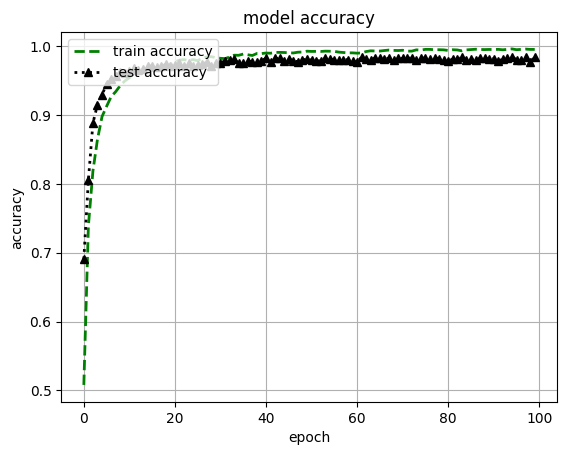

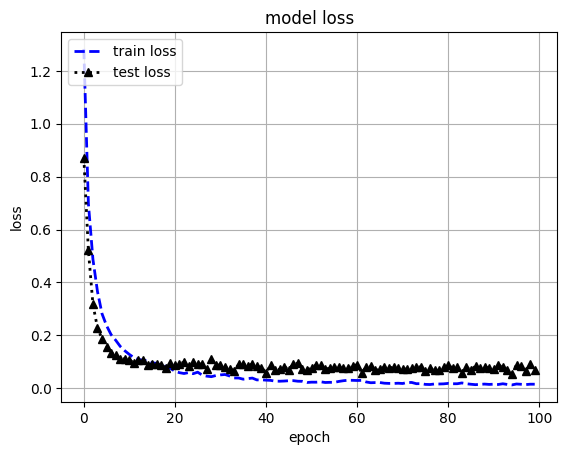

Test loss: 0.02575940079987049
Test accuracy: 0.9939277768135071


In [ ]:
print(confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1)))
print(classification_report(y3,pred))
plt.plot(history.history['accuracy'],'g--', linewidth=2, markersize=6)
plt.plot(history.history['val_accuracy'],'^k:', linewidth=2, markersize=6)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],'b--', linewidth=2, markersize=6)
plt.plot(history.history['val_loss'],'^k:', linewidth=2, markersize=6)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper left')
plt.grid()
plt.show()

score = model.evaluate(X3, y3,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
!pip install scipy
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
from scipy.interpolate import interp1d


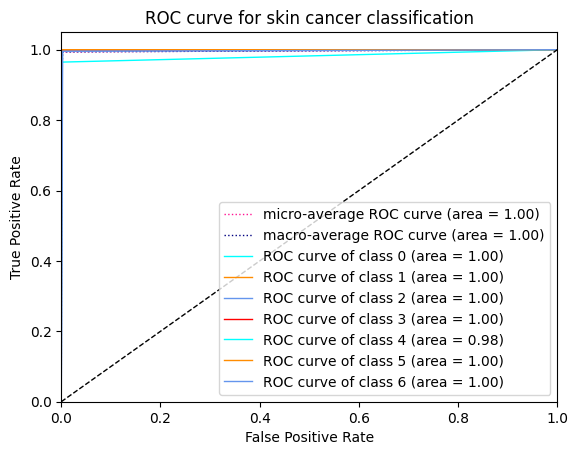

In [ ]:
x_test = X3
n_classes=7
lw=1
y_score =pred

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y3[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y3.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
  mean_tpr += interp1d(fpr[i], tpr[i])(all_fpr)

# ... (rest of the code)

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=1)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=1)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for skin cancer classification')
plt.legend(loc="lower right")
plt.show()

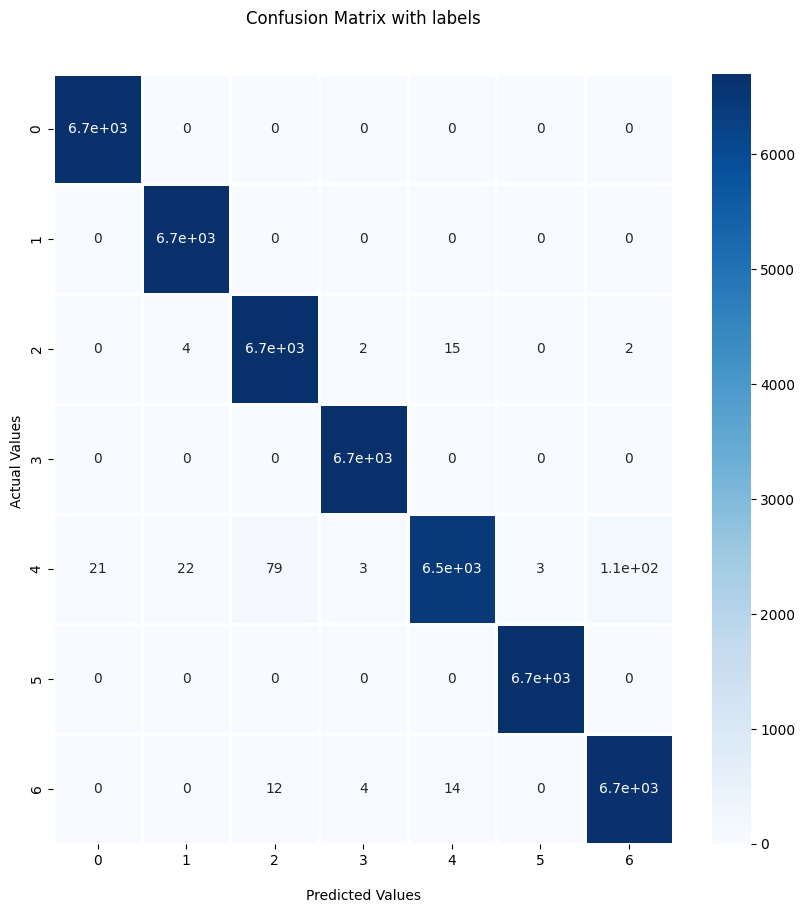

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))


ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

In [ ]:
import numpy as np

def calculate_metrics(conf_matrix):
    metrics = []

    for i in range(conf_matrix.shape[0]):
        true_positive = conf_matrix[i, i]
        false_positive = np.sum(conf_matrix[:, i]) - true_positive
        false_negative = np.sum(conf_matrix[i, :]) - true_positive
        true_negative = np.sum(conf_matrix) - true_positive - false_positive - false_negative

        metrics.append({
            'class': i,
            'true_positive': true_positive,
            'true_negative': true_negative,
            'false_positive': false_positive,
            'false_negative': false_negative
        })

    return metrics

# Example usage:
# Replace `your_conf_matrix` with your actual confusion matrix of size 7x7
your_conf_matrix = confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1))

metrics = calculate_metrics(your_conf_matrix)

# Print the metrics for each class
for metric in metrics:
    print(f"Class {metric['class']}:")
    print(f"True Positive: {metric['true_positive']}")
    print(f"True Negative: {metric['true_negative']}")
    print(f"False Positive: {metric['false_positive']}")
    print(f"False Negative: {metric['false_negative']}\n")


Class 0:
True Positive: 6705
True Negative: 40209
False Positive: 21
False Negative: 0

Class 1:
True Positive: 6705
True Negative: 40204
False Positive: 26
False Negative: 0

Class 2:
True Positive: 6682
True Negative: 40139
False Positive: 91
False Negative: 23

Class 3:
True Positive: 6705
True Negative: 40221
False Positive: 9
False Negative: 0

Class 4:
True Positive: 6469
True Negative: 40201
False Positive: 29
False Negative: 236

Class 5:
True Positive: 6705
True Negative: 40227
False Positive: 3
False Negative: 0

Class 6:
True Positive: 6675
True Negative: 40120
False Positive: 110
False Negative: 30



In [ ]:
########################3333   AMSGrad otimizer   ##################3

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# Change optimizer to Adam with AMSGrad
optimizer = Adam(lr=0.00125, epsilon=1e-8, beta_1=0.9, beta_2=0.999, amsgrad=True)

# Compile the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_acc',
    patience=2,
    verbose=1,
    factor=0.5,
    min_lr=0.0001
)

### Just for sanity check
trainX1 = np.concatenate((trainX, trainX, trainX), axis=0)
ftrainX1 = np.concatenate((ftrainX, ftrainX, ftrainX), axis=0)
trainY1 = np.concatenate((trainY, trainY, trainY), axis=0)
X1 = [trainX1, ftrainX1]
y1 = trainY1
X2 = [validX, fvalidX]
y2 = validY
testX = np.concatenate((trainX, validX, testX), axis=0)
ftestX = np.concatenate((ftrainX, fvalidX, ftestX), axis=0)
testY = np.concatenate((trainY, validY, testY), axis=0)
X3 = [testX, ftestX]
y3 = testY

history = model.fit(X1, y1, batch_size=128, epochs=100, verbose=1, validation_data=(X2, y2), callbacks=[learning_rate_reduction])
pred = np.round(model.predict(X3), 0)


Epoch 1/100
704/705 [============================>.] - ETA: 0s - loss: 1.1271 - accuracy: 0.5652

705/705 [==============================] - 285s 399ms/step - loss: 1.1271 - accuracy: 0.5652 - val_loss: 1.2039 - val_accuracy: 0.5887 - lr: 0.0010
Epoch 2/100
704/705 [============================>.] - ETA: 0s - loss: 0.6543 - accuracy: 0.7538

705/705 [==============================] - 270s 383ms/step - loss: 0.6543 - accuracy: 0.7538 - val_loss: 0.4393 - val_accuracy: 0.8288 - lr: 0.0010
Epoch 3/100
704/705 [============================>.] - ETA: 0s - loss: 0.4401 - accuracy: 0.8368

705/705 [==============================] - 273s 387ms/step - loss: 0.4401 - accuracy: 0.8368 - val_loss: 0.3246 - val_accuracy: 0.8816 - lr: 0.0010
Epoch 4/100
704/705 [============================>.] - ETA: 0s - loss: 0.3386 - accuracy: 0.8733

705/705 [==============================] - 270s 383ms/step - loss: 0.3387 - accuracy: 0.8733 - val_loss: 0.2108 - val_accuracy: 0.9240 - lr: 0.0010
Epoch 5/100
704/705 [============================>.] - ETA: 0s - loss: 0.2772 - accuracy: 0.8963

705/705 [==============================] - 269s 382ms/step - loss: 0.2772 - accuracy: 0.8963 - val_loss: 0.8782 - val_accuracy: 0.7298 - lr: 0.0010
Epoch 6/100
704/705 [============================>.] - ETA: 0s - loss: 0.4537 - accuracy: 0.8362

705/705 [==============================] - 271s 384ms/step - loss: 0.4537 - accuracy: 0.8362 - val_loss: 0.3605 - val_accuracy: 0.8706 - lr: 0.0010
Epoch 7/100
704/705 [============================>.] - ETA: 0s - loss: 0.2635 - accuracy: 0.9030

705/705 [==============================] - 271s 384ms/step - loss: 0.2636 - accuracy: 0.9029 - val_loss: 0.1556 - val_accuracy: 0.9451 - lr: 0.0010
Epoch 8/100
704/705 [============================>.] - ETA: 0s - loss: 0.2143 - accuracy: 0.9213

705/705 [==============================] - 268s 380ms/step - loss: 0.2143 - accuracy: 0.9213 - val_loss: 0.1672 - val_accuracy: 0.9381 - lr: 0.0010
Epoch 9/100
704/705 [============================>.] - ETA: 0s - loss: 0.2388 - accuracy: 0.9141

705/705 [==============================] - 271s 384ms/step - loss: 0.2389 - accuracy: 0.9141 - val_loss: 0.2929 - val_accuracy: 0.8985 - lr: 0.0010
Epoch 10/100
704/705 [============================>.] - ETA: 0s - loss: 0.2889 - accuracy: 0.8960

705/705 [==============================] - 272s 387ms/step - loss: 0.2889 - accuracy: 0.8960 - val_loss: 0.1782 - val_accuracy: 0.9340 - lr: 0.0010
Epoch 11/100
704/705 [============================>.] - ETA: 0s - loss: 0.1937 - accuracy: 0.9300

705/705 [==============================] - 267s 379ms/step - loss: 0.1938 - accuracy: 0.9300 - val_loss: 0.9562 - val_accuracy: 0.7304 - lr: 0.0010
Epoch 12/100
704/705 [============================>.] - ETA: 0s - loss: 0.8402 - accuracy: 0.6867

705/705 [==============================] - 268s 381ms/step - loss: 0.8403 - accuracy: 0.6867 - val_loss: 0.3036 - val_accuracy: 0.8987 - lr: 0.0010
Epoch 13/100
704/705 [============================>.] - ETA: 0s - loss: 0.2909 - accuracy: 0.8933

705/705 [==============================] - 267s 379ms/step - loss: 0.2910 - accuracy: 0.8933 - val_loss: 0.1530 - val_accuracy: 0.9494 - lr: 0.0010
Epoch 14/100
704/705 [============================>.] - ETA: 0s - loss: 0.2244 - accuracy: 0.9179

705/705 [==============================] - 268s 380ms/step - loss: 0.2245 - accuracy: 0.9179 - val_loss: 0.1318 - val_accuracy: 0.9555 - lr: 0.0010
Epoch 15/100
704/705 [============================>.] - ETA: 0s - loss: 0.1879 - accuracy: 0.9307

705/705 [==============================] - 265s 376ms/step - loss: 0.1879 - accuracy: 0.9307 - val_loss: 0.1246 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 16/100
704/705 [============================>.] - ETA: 0s - loss: 0.1746 - accuracy: 0.9358

705/705 [==============================] - 266s 377ms/step - loss: 0.1746 - accuracy: 0.9358 - val_loss: 0.1271 - val_accuracy: 0.9607 - lr: 0.0010
Epoch 17/100
704/705 [============================>.] - ETA: 0s - loss: 0.1585 - accuracy: 0.9424

705/705 [==============================] - 268s 381ms/step - loss: 0.1585 - accuracy: 0.9424 - val_loss: 0.1332 - val_accuracy: 0.9527 - lr: 0.0010
Epoch 18/100
704/705 [============================>.] - ETA: 0s - loss: 0.2065 - accuracy: 0.9259

705/705 [==============================] - 264s 375ms/step - loss: 0.2066 - accuracy: 0.9258 - val_loss: 0.3720 - val_accuracy: 0.8783 - lr: 0.0010
Epoch 19/100
704/705 [============================>.] - ETA: 0s - loss: 0.2521 - accuracy: 0.9130

705/705 [==============================] - 264s 375ms/step - loss: 0.2521 - accuracy: 0.9130 - val_loss: 0.4071 - val_accuracy: 0.8643 - lr: 0.0010
Epoch 20/100
704/705 [============================>.] - ETA: 0s - loss: 0.3946 - accuracy: 0.8617

705/705 [==============================] - 263s 373ms/step - loss: 0.3946 - accuracy: 0.8617 - val_loss: 0.1233 - val_accuracy: 0.9571 - lr: 0.0010
Epoch 21/100
704/705 [============================>.] - ETA: 0s - loss: 0.1535 - accuracy: 0.9446

705/705 [==============================] - 264s 374ms/step - loss: 0.1535 - accuracy: 0.9446 - val_loss: 0.1150 - val_accuracy: 0.9610 - lr: 0.0010
Epoch 22/100
704/705 [============================>.] - ETA: 0s - loss: 0.1324 - accuracy: 0.9515

705/705 [==============================] - 270s 384ms/step - loss: 0.1324 - accuracy: 0.9515 - val_loss: 0.8549 - val_accuracy: 0.7731 - lr: 0.0010
Epoch 23/100
704/705 [============================>.] - ETA: 0s - loss: 0.4870 - accuracy: 0.8334

705/705 [==============================] - 269s 381ms/step - loss: 0.4870 - accuracy: 0.8334 - val_loss: 0.1871 - val_accuracy: 0.9379 - lr: 0.0010
Epoch 24/100
704/705 [============================>.] - ETA: 0s - loss: 0.1680 - accuracy: 0.9396

705/705 [==============================] - 264s 375ms/step - loss: 0.1681 - accuracy: 0.9396 - val_loss: 0.1338 - val_accuracy: 0.9550 - lr: 0.0010
Epoch 25/100
704/705 [============================>.] - ETA: 0s - loss: 0.1347 - accuracy: 0.9509

705/705 [==============================] - 265s 376ms/step - loss: 0.1347 - accuracy: 0.9509 - val_loss: 0.1692 - val_accuracy: 0.9466 - lr: 0.0010
Epoch 26/100
704/705 [============================>.] - ETA: 0s - loss: 0.3017 - accuracy: 0.8967

705/705 [==============================] - 265s 376ms/step - loss: 0.3017 - accuracy: 0.8967 - val_loss: 0.1165 - val_accuracy: 0.9618 - lr: 0.0010
Epoch 27/100
704/705 [============================>.] - ETA: 0s - loss: 0.1564 - accuracy: 0.9433

705/705 [==============================] - 267s 378ms/step - loss: 0.1565 - accuracy: 0.9433 - val_loss: 2.2151 - val_accuracy: 0.5995 - lr: 0.0010
Epoch 28/100
704/705 [============================>.] - ETA: 0s - loss: 0.5641 - accuracy: 0.7985

705/705 [==============================] - 265s 376ms/step - loss: 0.5641 - accuracy: 0.7985 - val_loss: 0.1396 - val_accuracy: 0.9561 - lr: 0.0010
Epoch 29/100
704/705 [============================>.] - ETA: 0s - loss: 0.2264 - accuracy: 0.9190

705/705 [==============================] - 263s 374ms/step - loss: 0.2264 - accuracy: 0.9190 - val_loss: 0.1198 - val_accuracy: 0.9610 - lr: 0.0010
Epoch 30/100
704/705 [============================>.] - ETA: 0s - loss: 0.1815 - accuracy: 0.9344

705/705 [==============================] - 268s 380ms/step - loss: 0.1816 - accuracy: 0.9343 - val_loss: 0.1563 - val_accuracy: 0.9537 - lr: 0.0010
Epoch 31/100
704/705 [============================>.] - ETA: 0s - loss: 0.1729 - accuracy: 0.9374

705/705 [==============================] - 264s 374ms/step - loss: 0.1729 - accuracy: 0.9374 - val_loss: 1.3376 - val_accuracy: 0.6945 - lr: 0.0010
Epoch 32/100
704/705 [============================>.] - ETA: 0s - loss: 0.2805 - accuracy: 0.9018

705/705 [==============================] - 265s 375ms/step - loss: 0.2805 - accuracy: 0.9018 - val_loss: 0.1193 - val_accuracy: 0.9589 - lr: 0.0010
Epoch 33/100
704/705 [============================>.] - ETA: 0s - loss: 0.1551 - accuracy: 0.9437

705/705 [==============================] - 268s 381ms/step - loss: 0.1551 - accuracy: 0.9437 - val_loss: 0.2310 - val_accuracy: 0.9266 - lr: 0.0010
Epoch 34/100
704/705 [============================>.] - ETA: 0s - loss: 0.5193 - accuracy: 0.8148

705/705 [==============================] - 268s 380ms/step - loss: 0.5193 - accuracy: 0.8148 - val_loss: 0.1766 - val_accuracy: 0.9379 - lr: 0.0010
Epoch 35/100
704/705 [============================>.] - ETA: 0s - loss: 0.1851 - accuracy: 0.9350

705/705 [==============================] - 267s 379ms/step - loss: 0.1851 - accuracy: 0.9350 - val_loss: 0.1030 - val_accuracy: 0.9668 - lr: 0.0010
Epoch 36/100
704/705 [============================>.] - ETA: 0s - loss: 0.1583 - accuracy: 0.9437

705/705 [==============================] - 271s 384ms/step - loss: 0.1583 - accuracy: 0.9437 - val_loss: 0.2519 - val_accuracy: 0.9209 - lr: 0.0010
Epoch 37/100
704/705 [============================>.] - ETA: 0s - loss: 0.2316 - accuracy: 0.9190

705/705 [==============================] - 270s 383ms/step - loss: 0.2316 - accuracy: 0.9190 - val_loss: 0.1064 - val_accuracy: 0.9631 - lr: 0.0010
Epoch 38/100
704/705 [============================>.] - ETA: 0s - loss: 0.1279 - accuracy: 0.9536

705/705 [==============================] - 269s 381ms/step - loss: 0.1279 - accuracy: 0.9536 - val_loss: 0.0970 - val_accuracy: 0.9680 - lr: 0.0010
Epoch 39/100
704/705 [============================>.] - ETA: 0s - loss: 0.1151 - accuracy: 0.9589

705/705 [==============================] - 273s 387ms/step - loss: 0.1151 - accuracy: 0.9589 - val_loss: 0.1005 - val_accuracy: 0.9691 - lr: 0.0010
Epoch 40/100
704/705 [============================>.] - ETA: 0s - loss: 0.1044 - accuracy: 0.9622

705/705 [==============================] - 273s 387ms/step - loss: 0.1044 - accuracy: 0.9621 - val_loss: 0.3218 - val_accuracy: 0.9023 - lr: 0.0010
Epoch 41/100
704/705 [============================>.] - ETA: 0s - loss: 0.3101 - accuracy: 0.8926

705/705 [==============================] - 269s 381ms/step - loss: 0.3101 - accuracy: 0.8926 - val_loss: 0.1005 - val_accuracy: 0.9674 - lr: 0.0010
Epoch 42/100
704/705 [============================>.] - ETA: 0s - loss: 0.1177 - accuracy: 0.9579

705/705 [==============================] - 266s 378ms/step - loss: 0.1177 - accuracy: 0.9579 - val_loss: 0.0955 - val_accuracy: 0.9696 - lr: 0.0010
Epoch 43/100
704/705 [============================>.] - ETA: 0s - loss: 0.1061 - accuracy: 0.9613

705/705 [==============================] - 269s 382ms/step - loss: 0.1061 - accuracy: 0.9613 - val_loss: 0.0996 - val_accuracy: 0.9695 - lr: 0.0010
Epoch 44/100
704/705 [============================>.] - ETA: 0s - loss: 0.1670 - accuracy: 0.9410

705/705 [==============================] - 268s 379ms/step - loss: 0.1670 - accuracy: 0.9410 - val_loss: 0.1038 - val_accuracy: 0.9670 - lr: 0.0010
Epoch 45/100
704/705 [============================>.] - ETA: 0s - loss: 0.1152 - accuracy: 0.9580

705/705 [==============================] - 266s 377ms/step - loss: 0.1152 - accuracy: 0.9580 - val_loss: 0.1035 - val_accuracy: 0.9678 - lr: 0.0010
Epoch 46/100
704/705 [============================>.] - ETA: 0s - loss: 0.1192 - accuracy: 0.9571

705/705 [==============================] - 270s 383ms/step - loss: 0.1192 - accuracy: 0.9571 - val_loss: 0.1147 - val_accuracy: 0.9642 - lr: 0.0010
Epoch 47/100
704/705 [============================>.] - ETA: 0s - loss: 0.1188 - accuracy: 0.9586

705/705 [==============================] - 270s 383ms/step - loss: 0.1188 - accuracy: 0.9586 - val_loss: 0.0907 - val_accuracy: 0.9718 - lr: 0.0010
Epoch 48/100
704/705 [============================>.] - ETA: 0s - loss: 0.0956 - accuracy: 0.9649

705/705 [==============================] - 271s 385ms/step - loss: 0.0957 - accuracy: 0.9649 - val_loss: 0.0972 - val_accuracy: 0.9715 - lr: 0.0010
Epoch 49/100
704/705 [============================>.] - ETA: 0s - loss: 0.0895 - accuracy: 0.9675

705/705 [==============================] - 266s 377ms/step - loss: 0.0895 - accuracy: 0.9675 - val_loss: 0.1009 - val_accuracy: 0.9707 - lr: 0.0010
Epoch 50/100
704/705 [============================>.] - ETA: 0s - loss: 0.0863 - accuracy: 0.9683

705/705 [==============================] - 270s 383ms/step - loss: 0.0863 - accuracy: 0.9683 - val_loss: 0.0943 - val_accuracy: 0.9715 - lr: 0.0010
Epoch 51/100
704/705 [============================>.] - ETA: 0s - loss: 0.0799 - accuracy: 0.9712

705/705 [==============================] - 269s 382ms/step - loss: 0.0799 - accuracy: 0.9712 - val_loss: 0.0966 - val_accuracy: 0.9722 - lr: 0.0010
Epoch 52/100
704/705 [============================>.] - ETA: 0s - loss: 0.0786 - accuracy: 0.9716

705/705 [==============================] - 269s 381ms/step - loss: 0.0786 - accuracy: 0.9715 - val_loss: 0.0938 - val_accuracy: 0.9716 - lr: 0.0010
Epoch 53/100
704/705 [============================>.] - ETA: 0s - loss: 0.0752 - accuracy: 0.9736

705/705 [==============================] - 271s 384ms/step - loss: 0.0752 - accuracy: 0.9736 - val_loss: 0.0992 - val_accuracy: 0.9723 - lr: 0.0010
Epoch 54/100
704/705 [============================>.] - ETA: 0s - loss: 0.0734 - accuracy: 0.9732

705/705 [==============================] - 277s 393ms/step - loss: 0.0734 - accuracy: 0.9732 - val_loss: 0.1790 - val_accuracy: 0.9435 - lr: 0.0010
Epoch 55/100
704/705 [============================>.] - ETA: 0s - loss: 0.2656 - accuracy: 0.9116

705/705 [==============================] - 272s 385ms/step - loss: 0.2657 - accuracy: 0.9116 - val_loss: 0.1351 - val_accuracy: 0.9603 - lr: 0.0010
Epoch 56/100
704/705 [============================>.] - ETA: 0s - loss: 0.1688 - accuracy: 0.9418

705/705 [==============================] - 269s 381ms/step - loss: 0.1688 - accuracy: 0.9418 - val_loss: 0.0976 - val_accuracy: 0.9710 - lr: 0.0010
Epoch 57/100
704/705 [============================>.] - ETA: 0s - loss: 0.0989 - accuracy: 0.9647

705/705 [==============================] - 268s 380ms/step - loss: 0.0990 - accuracy: 0.9647 - val_loss: 0.1016 - val_accuracy: 0.9707 - lr: 0.0010
Epoch 58/100
704/705 [============================>.] - ETA: 0s - loss: 0.0917 - accuracy: 0.9669

705/705 [==============================] - 268s 380ms/step - loss: 0.0917 - accuracy: 0.9669 - val_loss: 0.0937 - val_accuracy: 0.9728 - lr: 0.0010
Epoch 59/100
704/705 [============================>.] - ETA: 0s - loss: 0.0832 - accuracy: 0.9698

705/705 [==============================] - 268s 380ms/step - loss: 0.0834 - accuracy: 0.9697 - val_loss: 0.3341 - val_accuracy: 0.8952 - lr: 0.0010
Epoch 60/100
704/705 [============================>.] - ETA: 0s - loss: 0.9662 - accuracy: 0.6680

705/705 [==============================] - 265s 376ms/step - loss: 0.9662 - accuracy: 0.6680 - val_loss: 0.1724 - val_accuracy: 0.9494 - lr: 0.0010
Epoch 61/100
704/705 [============================>.] - ETA: 0s - loss: 0.2164 - accuracy: 0.9254

705/705 [==============================] - 266s 378ms/step - loss: 0.2165 - accuracy: 0.9254 - val_loss: 0.1093 - val_accuracy: 0.9638 - lr: 0.0010
Epoch 62/100
704/705 [============================>.] - ETA: 0s - loss: 0.1265 - accuracy: 0.9560

705/705 [==============================] - 266s 378ms/step - loss: 0.1266 - accuracy: 0.9560 - val_loss: 0.1029 - val_accuracy: 0.9652 - lr: 0.0010
Epoch 63/100
704/705 [============================>.] - ETA: 0s - loss: 0.1024 - accuracy: 0.9637

705/705 [==============================] - 268s 380ms/step - loss: 0.1024 - accuracy: 0.9637 - val_loss: 0.0982 - val_accuracy: 0.9675 - lr: 0.0010
Epoch 64/100
704/705 [============================>.] - ETA: 0s - loss: 0.0933 - accuracy: 0.9668

705/705 [==============================] - 270s 383ms/step - loss: 0.0933 - accuracy: 0.9668 - val_loss: 0.0934 - val_accuracy: 0.9704 - lr: 0.0010
Epoch 65/100
704/705 [============================>.] - ETA: 0s - loss: 0.0875 - accuracy: 0.9692

705/705 [==============================] - 269s 382ms/step - loss: 0.0875 - accuracy: 0.9692 - val_loss: 0.0895 - val_accuracy: 0.9707 - lr: 0.0010
Epoch 66/100
704/705 [============================>.] - ETA: 0s - loss: 0.0807 - accuracy: 0.9712

705/705 [==============================] - 269s 381ms/step - loss: 0.0807 - accuracy: 0.9712 - val_loss: 0.0934 - val_accuracy: 0.9720 - lr: 0.0010
Epoch 67/100
704/705 [============================>.] - ETA: 0s - loss: 0.0773 - accuracy: 0.9727

705/705 [==============================] - 270s 383ms/step - loss: 0.0773 - accuracy: 0.9727 - val_loss: 0.0958 - val_accuracy: 0.9711 - lr: 0.0010
Epoch 68/100
704/705 [============================>.] - ETA: 0s - loss: 0.0746 - accuracy: 0.9734

705/705 [==============================] - 269s 382ms/step - loss: 0.0747 - accuracy: 0.9734 - val_loss: 0.0954 - val_accuracy: 0.9719 - lr: 0.0010
Epoch 69/100
704/705 [============================>.] - ETA: 0s - loss: 0.0784 - accuracy: 0.9726

705/705 [==============================] - 269s 382ms/step - loss: 0.0785 - accuracy: 0.9726 - val_loss: 0.1841 - val_accuracy: 0.9475 - lr: 0.0010
Epoch 70/100
704/705 [============================>.] - ETA: 0s - loss: 0.1225 - accuracy: 0.9599

705/705 [==============================] - 267s 378ms/step - loss: 0.1226 - accuracy: 0.9599 - val_loss: 0.0894 - val_accuracy: 0.9744 - lr: 0.0010
Epoch 71/100
704/705 [============================>.] - ETA: 0s - loss: 0.0718 - accuracy: 0.9745

705/705 [==============================] - 266s 377ms/step - loss: 0.0719 - accuracy: 0.9745 - val_loss: 0.0941 - val_accuracy: 0.9735 - lr: 0.0010
Epoch 72/100
704/705 [============================>.] - ETA: 0s - loss: 0.0681 - accuracy: 0.9759

705/705 [==============================] - 266s 377ms/step - loss: 0.0681 - accuracy: 0.9759 - val_loss: 0.0946 - val_accuracy: 0.9739 - lr: 0.0010
Epoch 73/100
704/705 [============================>.] - ETA: 0s - loss: 0.0665 - accuracy: 0.9767

705/705 [==============================] - 267s 379ms/step - loss: 0.0665 - accuracy: 0.9767 - val_loss: 0.0941 - val_accuracy: 0.9742 - lr: 0.0010
Epoch 74/100
704/705 [============================>.] - ETA: 0s - loss: 0.0627 - accuracy: 0.9774

705/705 [==============================] - 266s 377ms/step - loss: 0.0628 - accuracy: 0.9774 - val_loss: 0.1859 - val_accuracy: 0.9459 - lr: 0.0010
Epoch 75/100
704/705 [============================>.] - ETA: 0s - loss: 0.2208 - accuracy: 0.9319

705/705 [==============================] - 265s 376ms/step - loss: 0.2209 - accuracy: 0.9319 - val_loss: 0.1049 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 76/100
704/705 [============================>.] - ETA: 0s - loss: 0.0754 - accuracy: 0.9731

705/705 [==============================] - 268s 380ms/step - loss: 0.0754 - accuracy: 0.9731 - val_loss: 0.0982 - val_accuracy: 0.9728 - lr: 0.0010
Epoch 77/100
704/705 [============================>.] - ETA: 0s - loss: 0.0648 - accuracy: 0.9774

705/705 [==============================] - 265s 375ms/step - loss: 0.0648 - accuracy: 0.9774 - val_loss: 0.0946 - val_accuracy: 0.9731 - lr: 0.0010
Epoch 78/100
704/705 [============================>.] - ETA: 0s - loss: 0.0626 - accuracy: 0.9779

705/705 [==============================] - 264s 375ms/step - loss: 0.0626 - accuracy: 0.9779 - val_loss: 0.0891 - val_accuracy: 0.9754 - lr: 0.0010
Epoch 79/100
704/705 [============================>.] - ETA: 0s - loss: 0.0590 - accuracy: 0.9791

705/705 [==============================] - 268s 381ms/step - loss: 0.0590 - accuracy: 0.9791 - val_loss: 0.0893 - val_accuracy: 0.9755 - lr: 0.0010
Epoch 80/100
704/705 [============================>.] - ETA: 0s - loss: 0.0578 - accuracy: 0.9792

705/705 [==============================] - 277s 393ms/step - loss: 0.0578 - accuracy: 0.9792 - val_loss: 0.0915 - val_accuracy: 0.9748 - lr: 0.0010
Epoch 81/100
704/705 [============================>.] - ETA: 0s - loss: 0.0575 - accuracy: 0.9798

705/705 [==============================] - 274s 389ms/step - loss: 0.0575 - accuracy: 0.9798 - val_loss: 0.1341 - val_accuracy: 0.9642 - lr: 0.0010
Epoch 82/100
704/705 [============================>.] - ETA: 0s - loss: 0.0996 - accuracy: 0.9674

705/705 [==============================] - 270s 383ms/step - loss: 0.0997 - accuracy: 0.9673 - val_loss: 1.0440 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 83/100
704/705 [============================>.] - ETA: 0s - loss: 0.9023 - accuracy: 0.6758

705/705 [==============================] - 272s 386ms/step - loss: 0.9024 - accuracy: 0.6758 - val_loss: 0.1078 - val_accuracy: 0.9663 - lr: 0.0010
Epoch 84/100
704/705 [============================>.] - ETA: 0s - loss: 0.1114 - accuracy: 0.9624

705/705 [==============================] - 266s 377ms/step - loss: 0.1115 - accuracy: 0.9624 - val_loss: 0.1202 - val_accuracy: 0.9646 - lr: 0.0010
Epoch 85/100
704/705 [============================>.] - ETA: 0s - loss: 0.1873 - accuracy: 0.9365

705/705 [==============================] - 266s 377ms/step - loss: 0.1873 - accuracy: 0.9365 - val_loss: 0.0950 - val_accuracy: 0.9719 - lr: 0.0010
Epoch 86/100
704/705 [============================>.] - ETA: 0s - loss: 0.0868 - accuracy: 0.9696

705/705 [==============================] - 271s 384ms/step - loss: 0.0869 - accuracy: 0.9696 - val_loss: 0.0938 - val_accuracy: 0.9735 - lr: 0.0010
Epoch 87/100
704/705 [============================>.] - ETA: 0s - loss: 0.0752 - accuracy: 0.9734

705/705 [==============================] - 274s 389ms/step - loss: 0.0753 - accuracy: 0.9734 - val_loss: 0.0949 - val_accuracy: 0.9728 - lr: 0.0010
Epoch 88/100
704/705 [============================>.] - ETA: 0s - loss: 0.0665 - accuracy: 0.9766

705/705 [==============================] - 272s 385ms/step - loss: 0.0666 - accuracy: 0.9766 - val_loss: 0.1015 - val_accuracy: 0.9731 - lr: 0.0010
Epoch 89/100
704/705 [============================>.] - ETA: 0s - loss: 0.0713 - accuracy: 0.9749

705/705 [==============================] - 268s 380ms/step - loss: 0.0714 - accuracy: 0.9749 - val_loss: 0.0898 - val_accuracy: 0.9747 - lr: 0.0010
Epoch 90/100
704/705 [============================>.] - ETA: 0s - loss: 0.0959 - accuracy: 0.9675

705/705 [==============================] - 266s 378ms/step - loss: 0.0959 - accuracy: 0.9675 - val_loss: 0.0880 - val_accuracy: 0.9764 - lr: 0.0010
Epoch 91/100
704/705 [============================>.] - ETA: 0s - loss: 0.0671 - accuracy: 0.9770

705/705 [==============================] - 267s 379ms/step - loss: 0.0671 - accuracy: 0.9770 - val_loss: 0.0933 - val_accuracy: 0.9742 - lr: 0.0010
Epoch 92/100
704/705 [============================>.] - ETA: 0s - loss: 0.0745 - accuracy: 0.9741

705/705 [==============================] - 269s 382ms/step - loss: 0.0746 - accuracy: 0.9741 - val_loss: 0.1018 - val_accuracy: 0.9716 - lr: 0.0010
Epoch 93/100
704/705 [============================>.] - ETA: 0s - loss: 0.1153 - accuracy: 0.9596

705/705 [==============================] - 267s 379ms/step - loss: 0.1153 - accuracy: 0.9596 - val_loss: 0.1012 - val_accuracy: 0.9683 - lr: 0.0010
Epoch 94/100
704/705 [============================>.] - ETA: 0s - loss: 0.0830 - accuracy: 0.9714

705/705 [==============================] - 268s 380ms/step - loss: 0.0830 - accuracy: 0.9714 - val_loss: 0.1001 - val_accuracy: 0.9714 - lr: 0.0010
Epoch 95/100
704/705 [============================>.] - ETA: 0s - loss: 0.1333 - accuracy: 0.9546

705/705 [==============================] - 267s 378ms/step - loss: 0.1333 - accuracy: 0.9546 - val_loss: 0.0904 - val_accuracy: 0.9751 - lr: 0.0010
Epoch 96/100
704/705 [============================>.] - ETA: 0s - loss: 0.0723 - accuracy: 0.9742

705/705 [==============================] - 277s 393ms/step - loss: 0.0724 - accuracy: 0.9742 - val_loss: 0.1021 - val_accuracy: 0.9684 - lr: 0.0010
Epoch 97/100
704/705 [============================>.] - ETA: 0s - loss: 0.0647 - accuracy: 0.9770

705/705 [==============================] - 282s 400ms/step - loss: 0.0647 - accuracy: 0.9770 - val_loss: 0.0994 - val_accuracy: 0.9714 - lr: 0.0010
Epoch 98/100
704/705 [============================>.] - ETA: 0s - loss: 0.0620 - accuracy: 0.9777

705/705 [==============================] - 272s 385ms/step - loss: 0.0620 - accuracy: 0.9777 - val_loss: 0.0912 - val_accuracy: 0.9746 - lr: 0.0010
Epoch 99/100
704/705 [============================>.] - ETA: 0s - loss: 0.0578 - accuracy: 0.9797

705/705 [==============================] - 268s 380ms/step - loss: 0.0578 - accuracy: 0.9797 - val_loss: 0.0919 - val_accuracy: 0.9747 - lr: 0.0010
Epoch 100/100
704/705 [============================>.] - ETA: 0s - loss: 0.0560 - accuracy: 0.9803

1467/1467 [==============================] - 34s 23ms/step


In [ ]:
import pandas as pd

# Assuming 'history' contains the training history
# history = model.fit(...)

# Create a DataFrame from the training history
history_df = pd.DataFrame(history.history)

# Display the DataFrame
print(history_df)

# Extract validation accuracy, validation loss, and loss from the DataFrame
validation_accuracy = history_df['val_accuracy'].max()
validation_loss = history_df['val_loss'].min()
final_loss = history_df['loss'].iloc[-1]

# Display the results
print(f"\nValidation Accuracy: {validation_accuracy:.4f}")
print(f"Validation Loss: {validation_loss:.4f}")
print(f"Final Loss: {final_loss:.4f}")


        loss  accuracy  val_loss  val_accuracy     lr
0   1.127087  0.565151  1.203883      0.588682  0.001
1   0.654283  0.753845  0.439256      0.828762  0.001
2   0.440105  0.836773  0.324630      0.881625  0.001
3   0.338701  0.873272  0.210789      0.923968  0.001
4   0.277206  0.896320  0.878173      0.729827  0.001
..       ...       ...       ...           ...    ...
95  0.072415  0.974155  0.102126      0.968442  0.001
96  0.064733  0.976974  0.099427      0.971372  0.001
97  0.061963  0.977684  0.091161      0.974567  0.001
98  0.057758  0.979681  0.091943      0.974700  0.001
99  0.055968  0.980336  0.091222      0.974567  0.001

[100 rows x 5 columns]

Validation Accuracy: 0.9764
Validation Loss: 0.0880
Final Loss: 0.0560


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming `model` is already defined and trained using the provided code

# Assuming X3 and y3 are your test set
# X3 = [testX, ftestX]
# y3 = testY

# Predict on the test set
pred = np.round(model.predict(X3), 0)

# Get the confusion matrix
conf_mat = confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1))

print("Confusion Matrix:")
print(conf_mat)


1467/1467 [==============================] - 34s 23ms/step
Confusion Matrix:
[[6705    0    0    0    0    0    0]
 [   0 6705    0    0    0    0    0]
 [   3    0 6684    0   10    0    8]
 [   0    0    0 6705    0    0    0]
 [  38   35  153    5 6281    4  189]
 [   0    0    0    0    0 6705    0]
 [   1    0    9    4   16    0 6675]]


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming `model` is already defined and trained using the provided code

# Assuming X3 and y3 are your test set
# X3 = [testX, ftestX]
# y3 = testY

# Predict on the test set
pred = np.round(model.predict(X3), 0)

# Get the confusion matrix
conf_mat = confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1))

# Extract TP, TN, FP, FN
TP = conf_mat[1, 1]  # True Positive
TN = conf_mat[0, 0]  # True Negative
FP = conf_mat[0, 1]  # False Positive
FN = conf_mat[1, 0]  # False Negative

# Display the results
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)


1467/1467 [==============================] - 36s 25ms/step
True Positive (TP): 6705
True Negative (TN): 6705
False Positive (FP): 0
False Negative (FN): 0


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

[[6705    0    0    0    0    0    0]
 [   0 6705    0    0    0    0    0]
 [   3    0 6684    0   10    0    8]
 [   0    0    0 6705    0    0    0]
 [  38   35  153    5 6281    4  189]
 [   0    0    0    0    0 6705    0]
 [   1    0    9    4   16    0 6675]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6705
           1       0.99      1.00      1.00      6705
           2       0.98      1.00      0.99      6705
           3       1.00      1.00      1.00      6705
           4       1.00      0.94      0.97      6705
           5       1.00      1.00      1.00      6705
           6       0.97      1.00      0.98      6705

   micro avg       0.99      0.99      0.99     46935
   macro avg       0.99      0.99      0.99     46935
weighted avg       0.99      0.99      0.99     46935
 samples avg       0.99      0.99      0.99     46935



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


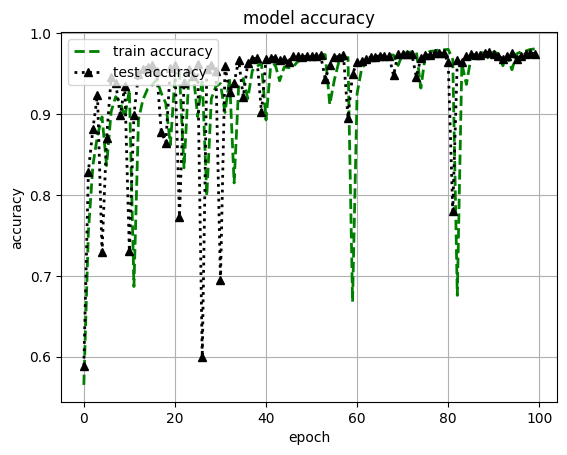

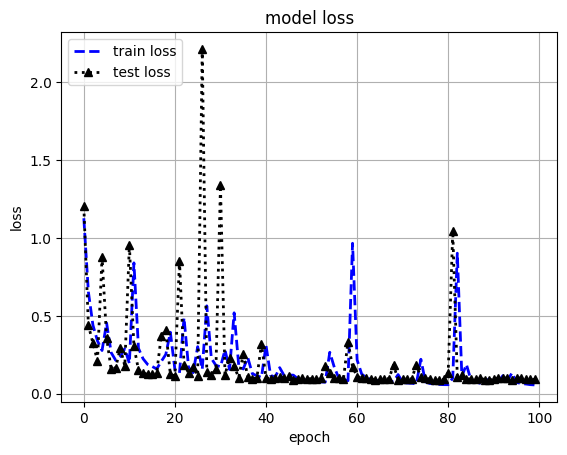

Test loss: 0.035904545336961746
Test accuracy: 0.9900500774383545


In [ ]:
print(confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1)))
print(classification_report(y3,pred))
plt.plot(history.history['accuracy'],'g--', linewidth=2, markersize=6)
plt.plot(history.history['val_accuracy'],'^k:', linewidth=2, markersize=6)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],'b--', linewidth=2, markersize=6)
plt.plot(history.history['val_loss'],'^k:', linewidth=2, markersize=6)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper left')
plt.grid()
plt.show()

score = model.evaluate(X3, y3,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
!pip install scipy
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
from scipy.interpolate import interp1d


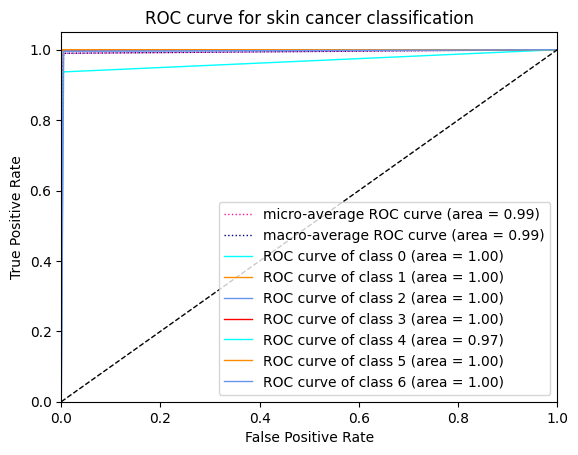

In [ ]:
x_test = X3
n_classes=7
lw=1
y_score =pred

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y3[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y3.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
  mean_tpr += interp1d(fpr[i], tpr[i])(all_fpr)

# ... (rest of the code)

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=1)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=1)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for skin cancer classification')
plt.legend(loc="lower right")
plt.show()

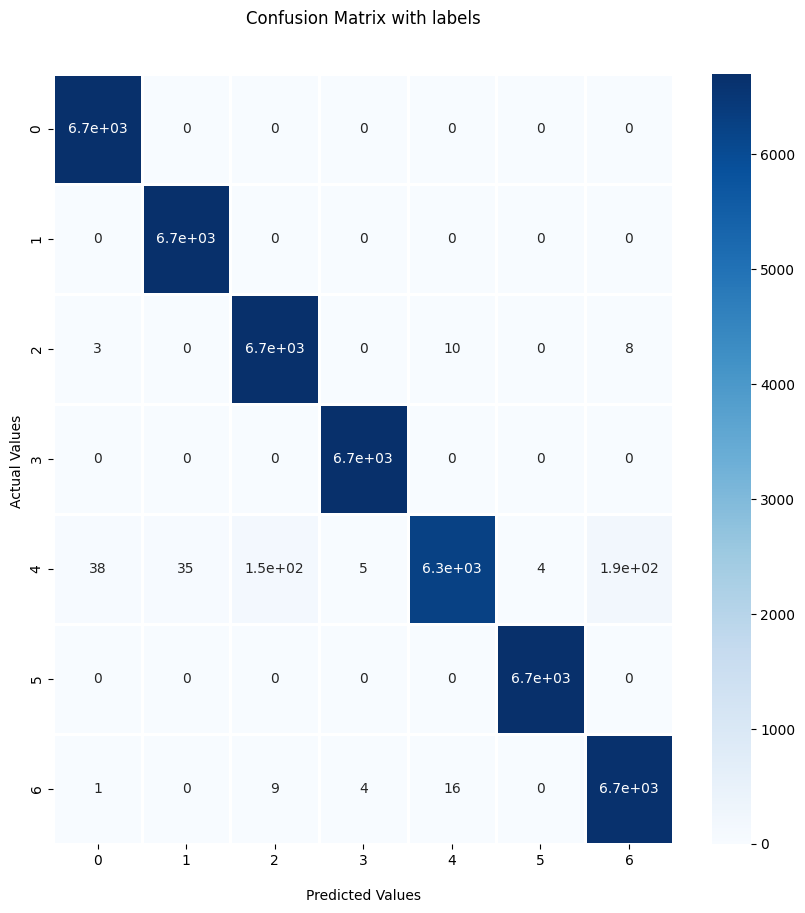

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))


ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

In [ ]:
#######################  ADAdelta optimizer  #########################3

In [ ]:
from keras.optimizers import Adadelta

# Change optimizer to Adadelta
optimizer = Adadelta(learning_rate=1.0, rho=0.95, epsilon=1e-08)

# Compile the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_acc',
    patience=2,
    verbose=1,
    factor=0.5,
    min_lr=0.0001
)

# Rest of the code remains the same for training
### Just for sanity check
trainX1 = np.concatenate((trainX, trainX, trainX), axis=0)
ftrainX1 = np.concatenate((ftrainX, ftrainX, ftrainX), axis=0)
trainY1 = np.concatenate((trainY, trainY, trainY), axis=0)
X1 = [trainX1, ftrainX1]
y1 = trainY1
X2 = [validX, fvalidX]
y2 = validY
testX = np.concatenate((trainX, validX, testX), axis=0)
ftestX = np.concatenate((ftrainX, fvalidX, ftestX), axis=0)
testY = np.concatenate((trainY, validY, testY), axis=0)
X3 = [testX, ftestX]
y3 = testY
history = model.fit(X1, y1, batch_size=128, epochs=100, verbose=1, validation_data=(X2, y2), callbacks=[learning_rate_reduction])
pred = np.round(model.predict(X3), 0)


Epoch 1/100
705/705 [==============================] - 126s 158ms/step - loss: 1.3199 - accuracy: 0.4996 - val_loss: 2.0343 - val_accuracy: 0.4055 - lr: 1.0000
Epoch 2/100
705/705 [==============================] - 109s 155ms/step - loss: 0.6672 - accuracy: 0.7513 - val_loss: 0.5206 - val_accuracy: 0.8011 - lr: 1.0000
Epoch 3/100
705/705 [==============================] - 109s 154ms/step - loss: 0.4324 - accuracy: 0.8409 - val_loss: 1.5666 - val_accuracy: 0.5222 - lr: 1.0000
Epoch 4/100
705/705 [==============================] - 108s 153ms/step - loss: 0.3185 - accuracy: 0.8830 - val_loss: 0.5829 - val_accuracy: 0.8087 - lr: 1.0000
Epoch 5/100
705/705 [==============================] - 109s 155ms/step - loss: 0.2587 - accuracy: 0.9054 - val_loss: 1.2655 - val_accuracy: 0.6373 - lr: 1.0000
Epoch 6/100
705/705 [==============================] - 109s 155ms/step - loss: 0.2171 - accuracy: 0.9210 - val_loss: 0.9098 - val_accuracy: 0.7321 - lr: 1.0000
Epoch 7/100
705/705 [===================

In [ ]:
import pandas as pd

# Assuming 'history' contains the training history
# history = model.fit(...)

# Create a DataFrame from the training history
history_df = pd.DataFrame(history.history)

# Display the DataFrame
print(history_df)

# Extract validation accuracy, validation loss, and loss from the DataFrame
validation_accuracy = history_df['val_accuracy'].max()
validation_loss = history_df['val_loss'].min()
final_loss = history_df['loss'].iloc[-1]

# Display the results
print(f"\nValidation Accuracy: {validation_accuracy:.4f}")
print(f"Validation Loss: {validation_loss:.4f}")
print(f"Final Loss: {final_loss:.4f}")


        loss  accuracy  val_loss  val_accuracy   lr
0   1.319904  0.499556  2.034306      0.405459  1.0
1   0.667242  0.751260  0.520620      0.801065  1.0
2   0.432415  0.840857  1.566629      0.522237  1.0
3   0.318512  0.882993  0.582912      0.808655  1.0
4   0.258669  0.905409  1.265543      0.637284  1.0
..       ...       ...       ...           ...  ...
95  0.025560  0.992399  0.084880      0.974035  1.0
96  0.025799  0.992188  0.126945      0.972703  1.0
97  0.025817  0.992177  0.168600      0.951531  1.0
98  0.026249  0.991788  0.133593      0.959920  1.0
99  0.024670  0.992632  0.080948      0.978029  1.0

[100 rows x 5 columns]

Validation Accuracy: 0.9834
Validation Loss: 0.0625
Final Loss: 0.0247


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming `model` is already defined and trained using the provided code

# Assuming X3 and y3 are your test set
# X3 = [testX, ftestX]
# y3 = testY

# Predict on the test set
pred = np.round(model.predict(X3), 0)

# Get the confusion matrix
conf_mat = confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1))

print("Confusion Matrix:")
print(conf_mat)


1467/1467 [==============================] - 42s 28ms/step
Confusion Matrix:
[[6705    0    0    0    0    0    0]
 [   0 6705    0    0    0    0    0]
 [   0    4 6687    0   12    0    2]
 [   0    0    0 6705    0    0    0]
 [  42   22  164    2 6318    1  156]
 [   0    0    0    0    0 6705    0]
 [   4    0    7    4    6    0 6684]]


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming `model` is already defined and trained using the provided code

# Assuming X3 and y3 are your test set
# X3 = [testX, ftestX]
# y3 = testY

# Predict on the test set
pred = np.round(model.predict(X3), 0)

# Get the confusion matrix
conf_mat = confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1))

# Extract TP, TN, FP, FN
TP = conf_mat[1, 1]  # True Positive
TN = conf_mat[0, 0]  # True Negative
FP = conf_mat[0, 1]  # False Positive
FN = conf_mat[1, 0]  # False Negative

# Display the results
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)


1467/1467 [==============================] - 43s 29ms/step
True Positive (TP): 6705
True Negative (TN): 6705
False Positive (FP): 0
False Negative (FN): 0


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

[[6705    0    0    0    0    0    0]
 [   0 6705    0    0    0    0    0]
 [   0    4 6687    0   12    0    2]
 [   0    0    0 6705    0    0    0]
 [  42   22  164    2 6318    1  156]
 [   0    0    0    0    0 6705    0]
 [   4    0    7    4    6    0 6684]]


c:\Users\beeram yogesh kumar\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6705
           1       1.00      1.00      1.00      6705
           2       0.98      1.00      0.99      6705
           3       1.00      1.00      1.00      6705
           4       1.00      0.94      0.97      6705
           5       1.00      1.00      1.00      6705
           6       0.98      1.00      0.99      6705

   micro avg       0.99      0.99      0.99     46935
   macro avg       0.99      0.99      0.99     46935
weighted avg       0.99      0.99      0.99     46935
 samples avg       0.99      0.99      0.99     46935



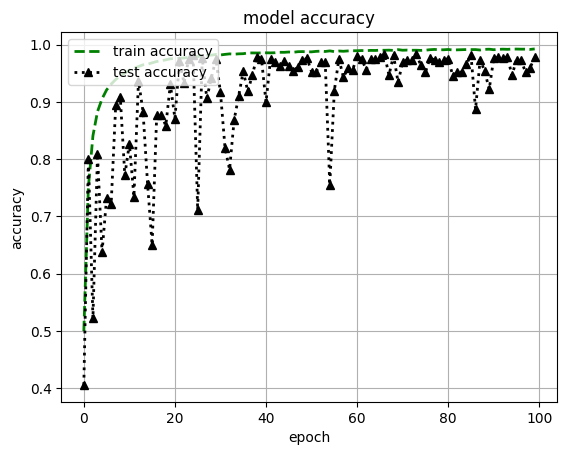

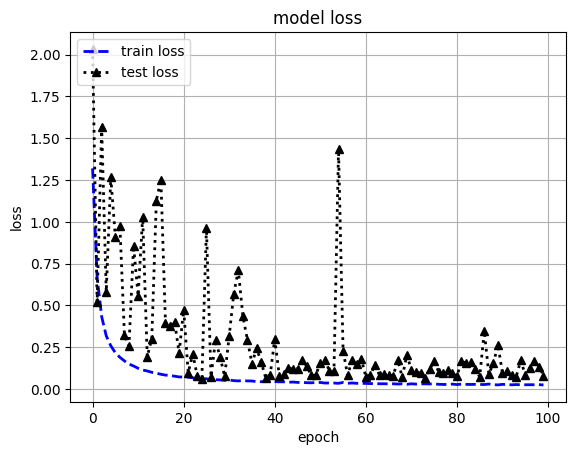

Test loss: 0.033470552414655685
Test accuracy: 0.9911580085754395


In [ ]:
print(confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1)))
print(classification_report(y3,pred))
plt.plot(history.history['accuracy'],'g--', linewidth=2, markersize=6)
plt.plot(history.history['val_accuracy'],'^k:', linewidth=2, markersize=6)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],'b--', linewidth=2, markersize=6)
plt.plot(history.history['val_loss'],'^k:', linewidth=2, markersize=6)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper left')
plt.grid()
plt.show()

score = model.evaluate(X3, y3,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
!pip install scipy
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
from scipy.interpolate import interp1d


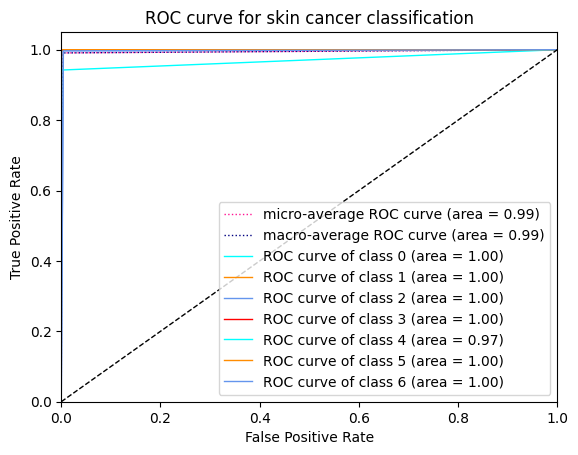

In [ ]:
x_test = X3
n_classes=7
lw=1
y_score =pred

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y3[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y3.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
  mean_tpr += interp1d(fpr[i], tpr[i])(all_fpr)

# ... (rest of the code)

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=1)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=1)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for skin cancer classification')
plt.legend(loc="lower right")
plt.show()

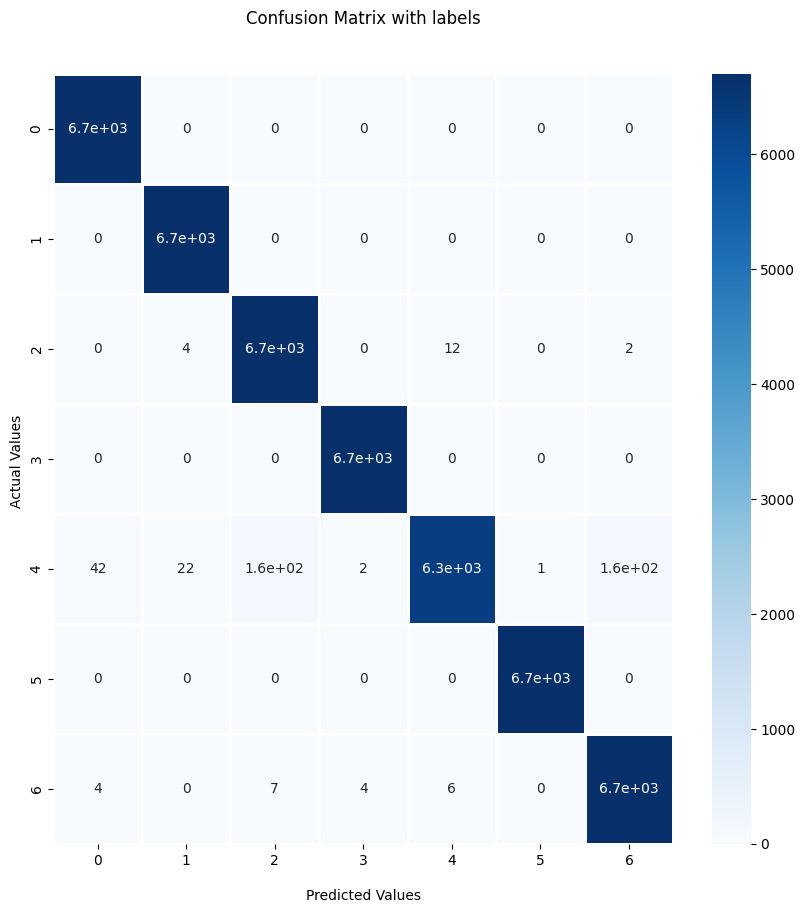

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))


ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

In [ ]:
import numpy as np

def calculate_metrics(conf_matrix):
    metrics = []

    for i in range(conf_matrix.shape[0]):
        true_positive = conf_matrix[i, i]
        false_positive = np.sum(conf_matrix[:, i]) - true_positive
        false_negative = np.sum(conf_matrix[i, :]) - true_positive
        true_negative = np.sum(conf_matrix) - true_positive - false_positive - false_negative

        metrics.append({
            'class': i,
            'true_positive': true_positive,
            'true_negative': true_negative,
            'false_positive': false_positive,
            'false_negative': false_negative
        })

    return metrics

# Example usage:
# Replace `your_conf_matrix` with your actual confusion matrix of size 7x7
your_conf_matrix = confusion_matrix(y3.argmax(axis=1), pred.argmax(axis=1))

metrics = calculate_metrics(your_conf_matrix)

# Print the metrics for each class
for metric in metrics:
    print(f"Class {metric['class']}:")
    print(f"True Positive: {metric['true_positive']}")
    print(f"True Negative: {metric['true_negative']}")
    print(f"False Positive: {metric['false_positive']}")
    print(f"False Negative: {metric['false_negative']}\n")


Class 0:
True Positive: 6705
True Negative: 40184
False Positive: 46
False Negative: 0

Class 1:
True Positive: 6705
True Negative: 40204
False Positive: 26
False Negative: 0

Class 2:
True Positive: 6687
True Negative: 40059
False Positive: 171
False Negative: 18

Class 3:
True Positive: 6705
True Negative: 40224
False Positive: 6
False Negative: 0

Class 4:
True Positive: 6318
True Negative: 40212
False Positive: 18
False Negative: 387

Class 5:
True Positive: 6705
True Negative: 40229
False Positive: 1
False Negative: 0

Class 6:
True Positive: 6684
True Negative: 40072
False Positive: 158
False Negative: 21

